# Seyed Mohammad Amin Atyabi - 830402014 - HW 4

In [8]:
def evaluate_expression(formula, value):
    expression = formula
    for v in value.axes[-1].values:
        expression = expression.replace(f'_{str(v)}_', str(value[v]))
    return eval(expression)


def train_model(data, epsilon):
    P = data.loc[data['y'] == True]
    h = 'False'
    np = len(P) * epsilon
    nn = (len(data) - len(P)) * epsilon
    while len(P) > np:
        r = 'True'
        r_features = set()
        N = data.loc[data['y'] == False]
        while len(N) > nn:
            if set(data.axes[-1].values).issubset(r_features):
                break
            vj = {}
            for f in data.axes[-1].values:
                if f == 'y':
                    continue
                if f not in r_features:
                    n_plus = 0
                    for i, p in P.iterrows():
                        if p['y'] == evaluate_expression(r + f' and _{f}_', p):
                            n_plus += 1
                    n_minus = 0
                    for i, n in N.iterrows():
                        if n['y'] == evaluate_expression(r + f' and _{f}_', n):
                            n_minus += 1
                    heuristic = n_plus / max(float(n_minus), 0.0001)
                    vj[f] = heuristic
            fj = sorted(vj.items(), key=lambda item: item[1])[-1][0]
            r_features.add(fj)
            n_drop = []
            for i, n in N.iterrows():
                if not n[fj]:
                    n_drop.append(i)
            if len(n_drop) > 0:
                r = r + f' and _{fj}_'
                N = N.drop(index=n_drop, inplace=False)
        h = h + f' or ({r})'
        covered = []
        for i, p in P.iterrows():
            if p['y'] == evaluate_expression(r, p):
                covered.append(i)
        if len(covered) == 0:
            break
        P = P.drop(index=covered, inplace=False)
    return h


def evaluate_model(data, model):
    count = 0
    for _, d in data.iterrows():
        res = (evaluate_expression(model, d) == d['y'])
        if not res:
            count += 1
    return count


def latex_expression(model):
    return model.replace('False or ', '').replace('True and ', '') \
        .replace('_f', 'f_{').replace('_ ', '} ').replace('_)', '})') \
        .replace('and', r'\wedge').replace('or', r'\vee')

In [2]:
import pandas
from scipy import io as sio
from sklearn.model_selection import train_test_split

data = pandas.DataFrame(sio.loadmat('Data/DNFData.mat').get('Data'))

columns = []
for i in range(len(data.iloc[-1]) - 1):
    columns.append(f'f{i + 1}')
columns.append('y')

data = data.astype(bool)
data = pandas.DataFrame(data.values, columns=columns)

train, test = train_test_split(data, test_size=0.5)

In [3]:
from IPython.display import display, Markdown

samples = list(range(20, 1001, 20))
errors = []

for s in samples:
    model = train_model(train.sample(s), 0)
    error = evaluate_model(train, model)
    errors.append(error)
    display(Markdown(f"""
    Number of Samples = {s}
    Error = {error}
    $$ {latex_expression(model)} $$
    """))
    if error == 0:
        display(Markdown(f"""
        **Best model**
        {model}
        """))


    Number of Samples = 20
    Error = 46
    $$ (f_{58} \wedge f_{30} \wedge f_{29} \wedge f_{19} \wedge f_{21} \wedge f_{42} \wedge f_{6} \wedge f_{92} \wedge f_{94} \wedge f_{99} \wedge f_{100}) $$
    


    Number of Samples = 40
    Error = 46
    $$ (f_{94} \wedge f_{84} \wedge f_{59} \wedge f_{99} \wedge f_{71} \wedge f_{74} \wedge f_{96} \wedge f_{97} \wedge f_{87} \wedge f_{95} \wedge f_{100}) $$
    


    Number of Samples = 60
    Error = 44
    $$ (f_{71} \wedge f_{4} \wedge f_{59} \wedge f_{66} \wedge f_{94} \wedge f_{51} \wedge f_{96} \wedge f_{97} \wedge f_{90} \wedge f_{84} \wedge f_{98}) \vee (f_{76} \wedge f_{71} \wedge f_{70} \wedge f_{63} \wedge f_{97} \wedge f_{66} \wedge f_{53} \wedge f_{75} \wedge f_{95} \wedge f_{100} \wedge f_{91} \wedge f_{99}) \vee (f_{76} \wedge f_{71} \wedge f_{70} \wedge f_{63} \wedge f_{23} \wedge f_{97} \wedge f_{66} \wedge f_{96} \wedge f_{89} \wedge f_{88} \wedge f_{99} \wedge f_{98}) $$
    


    Number of Samples = 80
    Error = 42
    $$ (f_{20} \wedge f_{16} \wedge f_{39} \wedge f_{62} \wedge f_{96} \wedge f_{95} \wedge f_{83} \wedge f_{70} \wedge f_{67} \wedge f_{69} \wedge f_{93} \wedge f_{91} \wedge f_{90}) \vee (f_{20} \wedge f_{16} \wedge f_{39} \wedge f_{11} \wedge f_{62} \wedge f_{100} \wedge f_{96} \wedge f_{71} \wedge f_{28} \wedge f_{95} \wedge f_{98} \wedge f_{90} \wedge f_{99}) \vee (f_{20} \wedge f_{16} \wedge f_{41} \wedge f_{37} \wedge f_{77} \wedge f_{83} \wedge f_{79} \wedge f_{92} \wedge f_{99} \wedge f_{86} \wedge f_{97} \wedge f_{94}) \vee (f_{30} \wedge f_{63} \wedge f_{14} \wedge f_{19} \wedge f_{64} \wedge f_{51} \wedge f_{47} \wedge f_{6} \wedge f_{91} \wedge f_{92} \wedge f_{98} \wedge f_{93} \wedge f_{82}) $$
    


    Number of Samples = 100
    Error = 43
    $$ (f_{77} \wedge f_{1} \wedge f_{68} \wedge f_{93} \wedge f_{76} \wedge f_{87} \wedge f_{16} \wedge f_{89} \wedge f_{55} \wedge f_{94} \wedge f_{40} \wedge f_{70} \wedge f_{99} \wedge f_{85}) \vee (f_{20} \wedge f_{14} \wedge f_{39} \wedge f_{64} \wedge f_{65} \wedge f_{68} \wedge f_{43} \wedge f_{91} \wedge f_{94} \wedge f_{98} \wedge f_{97} \wedge f_{100}) \vee (f_{87} \wedge f_{76} \wedge f_{53} \wedge f_{63} \wedge f_{93} \wedge f_{77} \wedge f_{71} \wedge f_{1} \wedge f_{31} \wedge f_{27} \wedge f_{96} \wedge f_{74} \wedge f_{86} \wedge f_{80}) $$
    


    Number of Samples = 120
    Error = 43
    $$ (f_{96} \wedge f_{97} \wedge f_{90} \wedge f_{12} \wedge f_{70} \wedge f_{41} \wedge f_{2} \wedge f_{34} \wedge f_{30} \wedge f_{52} \wedge f_{28} \wedge f_{93} \wedge f_{94} \wedge f_{88} \wedge f_{98}) \vee (f_{96} \wedge f_{99} \wedge f_{80} \wedge f_{72} \wedge f_{60} \wedge f_{58} \wedge f_{71} \wedge f_{98} \wedge f_{81} \wedge f_{95} \wedge f_{86} \wedge f_{89} \wedge f_{97} \wedge f_{100}) \vee (f_{44} \wedge f_{47} \wedge f_{59} \wedge f_{97} \wedge f_{80} \wedge f_{2} \wedge f_{84} \wedge f_{71} \wedge f_{63} \wedge f_{100} \wedge f_{96} \wedge f_{79} \wedge f_{99} \wedge f_{98}) \vee (f_{38} \wedge f_{44} \wedge f_{72} \wedge f_{14} \wedge f_{41} \wedge f_{55} \wedge f_{96} \wedge f_{90} \wedge f_{64} \wedge f_{77} \wedge f_{97} \wedge f_{89} \wedge f_{69} \wedge f_{99}) $$
    


    Number of Samples = 140
    Error = 43
    $$ (f_{48} \wedge f_{20} \wedge f_{74} \wedge f_{99} \wedge f_{89} \wedge f_{97} \wedge f_{86} \wedge f_{12} \wedge f_{96} \wedge f_{71} \wedge f_{98} \wedge f_{95} \wedge f_{100}) \vee (f_{92} \wedge f_{58} \wedge f_{21} \wedge f_{93} \wedge f_{33} \wedge f_{39} \wedge f_{37} \wedge f_{3} \wedge f_{56} \wedge f_{36} \wedge f_{76} \wedge f_{84} \wedge f_{80} \wedge f_{100} \wedge f_{94}) \vee (f_{92} \wedge f_{58} \wedge f_{21} \wedge f_{93} \wedge f_{6} \wedge f_{44} \wedge f_{100} \wedge f_{75} \wedge f_{57} \wedge f_{34} \wedge f_{88} \wedge f_{87} \wedge f_{84} \wedge f_{99} \wedge f_{97}) $$
    


    Number of Samples = 160
    Error = 42
    $$ (f_{99} \wedge f_{12} \wedge f_{30} \wedge f_{100} \wedge f_{1} \wedge f_{19} \wedge f_{89} \wedge f_{54} \wedge f_{53} \wedge f_{43} \wedge f_{71} \wedge f_{98}) \vee (f_{99} \wedge f_{48} \wedge f_{89} \wedge f_{77} \wedge f_{42} \wedge f_{98} \wedge f_{20} \wedge f_{61} \wedge f_{31} \wedge f_{79} \wedge f_{59} \wedge f_{97}) \vee (f_{68} \wedge f_{12} \wedge f_{99} \wedge f_{93} \wedge f_{46} \wedge f_{94} \wedge f_{55} \wedge f_{100} \wedge f_{72} \wedge f_{89} \wedge f_{98} \wedge f_{97}) \vee (f_{44} \wedge f_{87} \wedge f_{68} \wedge f_{5} \wedge f_{48} \wedge f_{85} \wedge f_{69} \wedge f_{63} \wedge f_{56} \wedge f_{39} \wedge f_{34} \wedge f_{95} \wedge f_{99} \wedge f_{96} \wedge f_{93}) $$
    


    Number of Samples = 180
    Error = 41
    $$ (f_{50} \wedge f_{4} \wedge f_{64} \wedge f_{73} \wedge f_{71} \wedge f_{27} \wedge f_{23} \wedge f_{52} \wedge f_{100} \wedge f_{75} \wedge f_{92} \wedge f_{95}) \vee (f_{20} \wedge f_{96} \wedge f_{79} \wedge f_{29} \wedge f_{97} \wedge f_{70} \wedge f_{48} \wedge f_{66} \wedge f_{59} \wedge f_{55} \wedge f_{88} \wedge f_{99} \wedge f_{98}) \vee (f_{20} \wedge f_{96} \wedge f_{78} \wedge f_{49} \wedge f_{4} \wedge f_{63} \wedge f_{35} \wedge f_{25} \wedge f_{83} \wedge f_{84} \wedge f_{100} \wedge f_{98} \wedge f_{97} \wedge f_{95}) \vee (f_{38} \wedge f_{89} \wedge f_{16} \wedge f_{94} \wedge f_{96} \wedge f_{20} \wedge f_{73} \wedge f_{46} \wedge f_{100} \wedge f_{93} \wedge f_{97} \wedge f_{98} \wedge f_{99}) $$
    


    Number of Samples = 200
    Error = 39
    $$ (f_{5} \wedge f_{76} \wedge f_{1} \wedge f_{84} \wedge f_{6} \wedge f_{97} \wedge f_{78} \wedge f_{89} \wedge f_{4} \wedge f_{79} \wedge f_{59} \wedge f_{91}) \vee (f_{4} \wedge f_{63} \wedge f_{22} \wedge f_{87} \wedge f_{55} \wedge f_{9} \wedge f_{16} \wedge f_{93} \wedge f_{92} \wedge f_{80} \wedge f_{71} \wedge f_{88} \wedge f_{96} \wedge f_{99} \wedge f_{95}) \vee (f_{4} \wedge f_{63} \wedge f_{45} \wedge f_{27} \wedge f_{47} \wedge f_{41} \wedge f_{56} \wedge f_{92} \wedge f_{59} \wedge f_{10} \wedge f_{91} \wedge f_{97} \wedge f_{89} \wedge f_{98} \wedge f_{90}) \vee (f_{20} \wedge f_{42} \wedge f_{76} \wedge f_{48} \wedge f_{18} \wedge f_{77} \wedge f_{27} \wedge f_{87} \wedge f_{95} \wedge f_{90} \wedge f_{64} \wedge f_{78} \wedge f_{97} \wedge f_{89}) \vee (f_{20} \wedge f_{92} \wedge f_{73} \wedge f_{61} \wedge f_{22} \wedge f_{96} \wedge f_{90} \wedge f_{93} \wedge f_{87} \wedge f_{86} \wedge f_{79} \wedge f_{85} \wedge f_{84} \wedge f_{82}) \vee (f_{6} \wedge f_{92} \wedge f_{81} \wedge f_{72} \wedge f_{62} \wedge f_{88} \wedge f_{100} \wedge f_{43} \wedge f_{90} \wedge f_{50} \wedge f_{60} \wedge f_{98} \wedge f_{86} \wedge f_{99} \wedge f_{97}) \vee (f_{76} \wedge f_{92} \wedge f_{84} \wedge f_{33} \wedge f_{2} \wedge f_{50} \wedge f_{49} \wedge f_{51} \wedge f_{9} \wedge f_{93} \wedge f_{73} \wedge f_{87} \wedge f_{97} \wedge f_{95}) $$
    


    Number of Samples = 220
    Error = 39
    $$ (f_{95} \wedge f_{4} \wedge f_{35} \wedge f_{100} \wedge f_{92} \wedge f_{47} \wedge f_{79} \wedge f_{63} \wedge f_{61} \wedge f_{19} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{98}) \vee (f_{95} \wedge f_{11} \wedge f_{4} \wedge f_{30} \wedge f_{84} \wedge f_{75} \wedge f_{39} \wedge f_{92} \wedge f_{93} \wedge f_{73} \wedge f_{91} \wedge f_{81} \wedge f_{80}) \vee (f_{29} \wedge f_{56} \wedge f_{27} \wedge f_{71} \wedge f_{100} \wedge f_{16} \wedge f_{13} \wedge f_{94} \wedge f_{35} \wedge f_{30} \wedge f_{99} \wedge f_{97} \wedge f_{96} \wedge f_{88} \wedge f_{98} \wedge f_{95}) \vee (f_{29} \wedge f_{56} \wedge f_{27} \wedge f_{71} \wedge f_{63} \wedge f_{100} \wedge f_{2} \wedge f_{16} \wedge f_{54} \wedge f_{13} \wedge f_{97} \wedge f_{98} \wedge f_{66} \wedge f_{99} \wedge f_{95}) \vee (f_{29} \wedge f_{56} \wedge f_{71} \wedge f_{27} \wedge f_{58} \wedge f_{92} \wedge f_{91} \wedge f_{55} \wedge f_{79} \wedge f_{52} \wedge f_{80} \wedge f_{95} \wedge f_{94} \wedge f_{98}) \vee (f_{100} \wedge f_{71} \wedge f_{56} \wedge f_{28} \wedge f_{11} \wedge f_{40} \wedge f_{90} \wedge f_{81} \wedge f_{88} \wedge f_{99} \wedge f_{61} \wedge f_{98} \wedge f_{95} \wedge f_{97}) $$
    


    Number of Samples = 240
    Error = 34
    $$ (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{48} \wedge f_{52} \wedge f_{85} \wedge f_{61} \wedge f_{54} \wedge f_{86} \wedge f_{93} \wedge f_{63} \wedge f_{43} \wedge f_{84} \wedge f_{30}) \vee (f_{4} \wedge f_{97} \wedge f_{39} \wedge f_{16} \wedge f_{5} \wedge f_{80} \wedge f_{26} \wedge f_{78} \wedge f_{14} \wedge f_{65} \wedge f_{91} \wedge f_{50} \wedge f_{88} \wedge f_{100} \wedge f_{99} \wedge f_{94} \wedge f_{93}) \vee (f_{4} \wedge f_{97} \wedge f_{46} \wedge f_{56} \wedge f_{91} \wedge f_{75} \wedge f_{33} \wedge f_{86} \wedge f_{65} \wedge f_{64} \wedge f_{99} \wedge f_{90} \wedge f_{74} \wedge f_{98} \wedge f_{100} \wedge f_{96}) \vee (f_{4} \wedge f_{97} \wedge f_{46} \wedge f_{55} \wedge f_{64} \wedge f_{27} \wedge f_{91} \wedge f_{28} \wedge f_{95} \wedge f_{22} \wedge f_{85} \wedge f_{89} \wedge f_{98}) \vee (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{86} \wedge f_{65} \wedge f_{43} \wedge f_{68} \wedge f_{52} \wedge f_{87} \wedge f_{74} \wedge f_{39} \wedge f_{63} \wedge f_{93} \wedge f_{79} \wedge f_{96}) \vee (f_{4} \wedge f_{97} \wedge f_{16} \wedge f_{39} \wedge f_{5} \wedge f_{21} \wedge f_{87} \wedge f_{65} \wedge f_{6} \wedge f_{94} \wedge f_{76} \wedge f_{86} \wedge f_{99} \wedge f_{85} \wedge f_{93}) \vee (f_{4} \wedge f_{90} \wedge f_{5} \wedge f_{13} \wedge f_{48} \wedge f_{41} \wedge f_{53} \wedge f_{91} \wedge f_{71} \wedge f_{73} \wedge f_{45} \wedge f_{95} \wedge f_{85} \wedge f_{92}) \vee (f_{97} \wedge f_{96} \wedge f_{94} \wedge f_{4} \wedge f_{90} \wedge f_{16} \wedge f_{80} \wedge f_{86} \wedge f_{84} \wedge f_{98} \wedge f_{74} \wedge f_{77} \wedge f_{83} \wedge f_{93}) \vee (f_{68} \wedge f_{36} \wedge f_{16} \wedge f_{78} \wedge f_{96} \wedge f_{22} \wedge f_{54} \wedge f_{32} \wedge f_{25} \wedge f_{85} \wedge f_{79} \wedge f_{100} \wedge f_{99} \wedge f_{98}) \vee (f_{86} \wedge f_{68} \wedge f_{11} \wedge f_{90} \wedge f_{69} \wedge f_{35} \wedge f_{4} \wedge f_{93} \wedge f_{33} \wedge f_{97} \wedge f_{78} \wedge f_{61} \wedge f_{99} \wedge f_{96}) $$
    


    Number of Samples = 260
    Error = 31
    $$ (f_{16} \wedge f_{95} \wedge f_{97} \wedge f_{98} \wedge f_{6} \wedge f_{8} \wedge f_{68} \wedge f_{78} \wedge f_{52} \wedge f_{81} \wedge f_{67} \wedge f_{48} \wedge f_{87} \wedge f_{100} \wedge f_{96}) \vee (f_{5} \wedge f_{4} \wedge f_{84} \wedge f_{35} \wedge f_{90} \wedge f_{33} \wedge f_{59} \wedge f_{22} \wedge f_{14} \wedge f_{67} \wedge f_{95} \wedge f_{48} \wedge f_{68} \wedge f_{86}) \vee (f_{16} \wedge f_{95} \wedge f_{34} \wedge f_{90} \wedge f_{97} \wedge f_{43} \wedge f_{48} \wedge f_{45} \wedge f_{99} \wedge f_{96} \wedge f_{55} \wedge f_{40} \wedge f_{98} \wedge f_{84} \wedge f_{100}) \vee (f_{16} \wedge f_{93} \wedge f_{5} \wedge f_{77} \wedge f_{69} \wedge f_{15} \wedge f_{78} \wedge f_{20} \wedge f_{88} \wedge f_{87} \wedge f_{91} \wedge f_{60} \wedge f_{95} \wedge f_{89}) \vee (f_{16} \wedge f_{93} \wedge f_{100} \wedge f_{73} \wedge f_{99} \wedge f_{88} \wedge f_{96} \wedge f_{79} \wedge f_{97} \wedge f_{66} \wedge f_{46} \wedge f_{50} \wedge f_{72} \wedge f_{98}) \vee (f_{65} \wedge f_{34} \wedge f_{99} \wedge f_{100} \wedge f_{29} \wedge f_{57} \wedge f_{98} \wedge f_{82} \wedge f_{4} \wedge f_{13} \wedge f_{33} \wedge f_{58} \wedge f_{94} \wedge f_{93}) \vee (f_{27} \wedge f_{43} \wedge f_{22} \wedge f_{56} \wedge f_{51} \wedge f_{16} \wedge f_{61} \wedge f_{2} \wedge f_{63} \wedge f_{54} \wedge f_{99} \wedge f_{97} \wedge f_{95} \wedge f_{80} \wedge f_{100}) \vee (f_{93} \wedge f_{20} \wedge f_{39} \wedge f_{4} \wedge f_{14} \wedge f_{49} \wedge f_{62} \wedge f_{80} \wedge f_{5} \wedge f_{68} \wedge f_{77} \wedge f_{86}) $$
    


    Number of Samples = 280
    Error = 33
    $$ (f_{4} \wedge f_{41} \wedge f_{94} \wedge f_{13} \wedge f_{12} \wedge f_{71} \wedge f_{63} \wedge f_{69} \wedge f_{90} \wedge f_{92} \wedge f_{98} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{96}) \vee (f_{4} \wedge f_{41} \wedge f_{94} \wedge f_{13} \wedge f_{84} \wedge f_{71} \wedge f_{80} \wedge f_{10} \wedge f_{93} \wedge f_{34} \wedge f_{65} \wedge f_{98} \wedge f_{73}) \vee (f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{52} \wedge f_{29} \wedge f_{17} \wedge f_{2} \wedge f_{24} \wedge f_{90} \wedge f_{86} \wedge f_{31} \wedge f_{76} \wedge f_{98} \wedge f_{96} \wedge f_{95}) \vee (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{25} \wedge f_{64} \wedge f_{98} \wedge f_{49} \wedge f_{71} \wedge f_{22} \wedge f_{94} \wedge f_{65} \wedge f_{91} \wedge f_{81} \wedge f_{86}) \vee (f_{54} \wedge f_{4} \wedge f_{99} \wedge f_{46} \wedge f_{85} \wedge f_{97} \wedge f_{92} \wedge f_{93} \wedge f_{68} \wedge f_{57} \wedge f_{87} \wedge f_{86} \wedge f_{94} \wedge f_{89}) \vee (f_{12} \wedge f_{96} \wedge f_{30} \wedge f_{45} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{4} \wedge f_{95} \wedge f_{89} \wedge f_{85} \wedge f_{98}) \vee (f_{2} \wedge f_{96} \wedge f_{12} \wedge f_{52} \wedge f_{41} \wedge f_{97} \wedge f_{34} \wedge f_{62} \wedge f_{90} \wedge f_{38} \wedge f_{48} \wedge f_{64} \wedge f_{91} \wedge f_{98} \wedge f_{99} \wedge f_{100}) \vee (f_{2} \wedge f_{13} \wedge f_{57} \wedge f_{54} \wedge f_{12} \wedge f_{49} \wedge f_{93} \wedge f_{47} \wedge f_{55} \wedge f_{90} \wedge f_{87} \wedge f_{92} \wedge f_{84} \wedge f_{85} \wedge f_{96}) \vee (f_{34} \wedge f_{94} \wedge f_{32} \wedge f_{99} \wedge f_{35} \wedge f_{97} \wedge f_{58} \wedge f_{11} \wedge f_{96} \wedge f_{84} \wedge f_{80} \wedge f_{59} \wedge f_{100} \wedge f_{98}) $$
    


    Number of Samples = 300
    Error = 36
    $$ (f_{28} \wedge f_{4} \wedge f_{52} \wedge f_{91} \wedge f_{64} \wedge f_{25} \wedge f_{39} \wedge f_{96} \wedge f_{2} \wedge f_{72} \wedge f_{10} \wedge f_{97} \wedge f_{65} \wedge f_{81} \wedge f_{90} \wedge f_{89}) \vee (f_{48} \wedge f_{5} \wedge f_{52} \wedge f_{4} \wedge f_{2} \wedge f_{94} \wedge f_{86} \wedge f_{85} \wedge f_{44} \wedge f_{57} \wedge f_{72} \wedge f_{93} \wedge f_{66} \wedge f_{98}) \vee (f_{95} \wedge f_{73} \wedge f_{84} \wedge f_{16} \wedge f_{98} \wedge f_{88} \wedge f_{100} \wedge f_{15} \wedge f_{72} \wedge f_{45} \wedge f_{93} \wedge f_{55} \wedge f_{99} \wedge f_{97} \wedge f_{96}) \vee (f_{95} \wedge f_{68} \wedge f_{17} \wedge f_{11} \wedge f_{2} \wedge f_{21} \wedge f_{91} \wedge f_{84} \wedge f_{70} \wedge f_{82} \wedge f_{100} \wedge f_{78} \wedge f_{48}) \vee (f_{95} \wedge f_{98} \wedge f_{1} \wedge f_{8} \wedge f_{17} \wedge f_{68} \wedge f_{84} \wedge f_{20} \wedge f_{100} \wedge f_{77} \wedge f_{74} \wedge f_{48} \wedge f_{99} \wedge f_{97} \wedge f_{96}) \vee (f_{27} \wedge f_{56} \wedge f_{91} \wedge f_{7} \wedge f_{95} \wedge f_{67} \wedge f_{73} \wedge f_{78} \wedge f_{100} \wedge f_{57} \wedge f_{75} \wedge f_{98} \wedge f_{89} \wedge f_{99} \wedge f_{96}) \vee (f_{27} \wedge f_{63} \wedge f_{94} \wedge f_{29} \wedge f_{7} \wedge f_{91} \wedge f_{47} \wedge f_{79} \wedge f_{92} \wedge f_{73} \wedge f_{54} \wedge f_{67} \wedge f_{97} \wedge f_{89} \wedge f_{98}) $$
    


    Number of Samples = 320
    Error = 35
    $$ (f_{4} \wedge f_{41} \wedge f_{1} \wedge f_{89} \wedge f_{16} \wedge f_{87} \wedge f_{77} \wedge f_{13} \wedge f_{55} \wedge f_{56} \wedge f_{63} \wedge f_{92} \wedge f_{76} \wedge f_{93} \wedge f_{66} \wedge f_{96} \wedge f_{99} \wedge f_{95}) \vee (f_{4} \wedge f_{41} \wedge f_{97} \wedge f_{91} \wedge f_{43} \wedge f_{39} \wedge f_{47} \wedge f_{64} \wedge f_{72} \wedge f_{13} \wedge f_{9} \wedge f_{96} \wedge f_{90} \wedge f_{99} \wedge f_{80} \wedge f_{89}) \vee (f_{4} \wedge f_{41} \wedge f_{97} \wedge f_{91} \wedge f_{85} \wedge f_{56} \wedge f_{99} \wedge f_{38} \wedge f_{66} \wedge f_{48} \wedge f_{16} \wedge f_{88} \wedge f_{100} \wedge f_{90} \wedge f_{95}) \vee (f_{4} \wedge f_{41} \wedge f_{97} \wedge f_{91} \wedge f_{89} \wedge f_{69} \wedge f_{38} \wedge f_{15} \wedge f_{87} \wedge f_{49} \wedge f_{28} \wedge f_{26} \wedge f_{90} \wedge f_{78} \wedge f_{93} \wedge f_{95}) \vee (f_{4} \wedge f_{41} \wedge f_{39} \wedge f_{1} \wedge f_{25} \wedge f_{56} \wedge f_{66} \wedge f_{53} \wedge f_{86} \wedge f_{96} \wedge f_{71} \wedge f_{98} \wedge f_{97}) \vee (f_{60} \wedge f_{99} \wedge f_{31} \wedge f_{1} \wedge f_{65} \wedge f_{5} \wedge f_{4} \wedge f_{44} \wedge f_{74} \wedge f_{48} \wedge f_{8} \wedge f_{91} \wedge f_{100} \wedge f_{97} \wedge f_{86}) \vee (f_{92} \wedge f_{41} \wedge f_{65} \wedge f_{3} \wedge f_{69} \wedge f_{49} \wedge f_{9} \wedge f_{71} \wedge f_{97} \wedge f_{96} \wedge f_{100} \wedge f_{98} \wedge f_{95} \wedge f_{99}) \vee (f_{92} \wedge f_{41} \wedge f_{76} \wedge f_{3} \wedge f_{61} \wedge f_{18} \wedge f_{77} \wedge f_{16} \wedge f_{58} \wedge f_{83} \wedge f_{60} \wedge f_{89} \wedge f_{99} \wedge f_{97} \wedge f_{94}) \vee (f_{92} \wedge f_{41} \wedge f_{76} \wedge f_{3} \wedge f_{61} \wedge f_{18} \wedge f_{77} \wedge f_{67} \wedge f_{99} \wedge f_{53} \wedge f_{100} \wedge f_{90} \wedge f_{88} \wedge f_{69}) $$
    


    Number of Samples = 340
    Error = 28
    $$ (f_{96} \wedge f_{16} \wedge f_{68} \wedge f_{50} \wedge f_{13} \wedge f_{20} \wedge f_{97} \wedge f_{55} \wedge f_{95} \wedge f_{57} \wedge f_{85} \wedge f_{100} \wedge f_{98}) \vee (f_{2} \wedge f_{17} \wedge f_{5} \wedge f_{73} \wedge f_{69} \wedge f_{21} \wedge f_{39} \wedge f_{64} \wedge f_{70} \wedge f_{55} \wedge f_{84} \wedge f_{91} \wedge f_{93} \wedge f_{66}) \vee (f_{2} \wedge f_{80} \wedge f_{17} \wedge f_{77} \wedge f_{72} \wedge f_{25} \wedge f_{30} \wedge f_{64} \wedge f_{41} \wedge f_{28} \wedge f_{65} \wedge f_{90} \wedge f_{89} \wedge f_{97}) \vee (f_{2} \wedge f_{80} \wedge f_{63} \wedge f_{34} \wedge f_{68} \wedge f_{71} \wedge f_{46} \wedge f_{19} \wedge f_{95} \wedge f_{79} \wedge f_{83} \wedge f_{92} \wedge f_{84} \wedge f_{98} \wedge f_{94}) \vee (f_{69} \wedge f_{16} \wedge f_{63} \wedge f_{96} \wedge f_{1} \wedge f_{85} \wedge f_{55} \wedge f_{62} \wedge f_{37} \wedge f_{26} \wedge f_{71} \wedge f_{95} \wedge f_{76} \wedge f_{99} \wedge f_{87} \wedge f_{94}) \vee (f_{2} \wedge f_{69} \wedge f_{97} \wedge f_{50} \wedge f_{80} \wedge f_{73} \wedge f_{72} \wedge f_{48} \wedge f_{47} \wedge f_{87} \wedge f_{85} \wedge f_{49} \wedge f_{92} \wedge f_{91} \wedge f_{93} \wedge f_{95}) \vee (f_{63} \wedge f_{69} \wedge f_{90} \wedge f_{96} \wedge f_{97} \wedge f_{100} \wedge f_{85} \wedge f_{65} \wedge f_{68} \wedge f_{91} \wedge f_{59} \wedge f_{56} \wedge f_{84} \wedge f_{99}) \vee (f_{63} \wedge f_{23} \wedge f_{36} \wedge f_{16} \wedge f_{96} \wedge f_{27} \wedge f_{15} \wedge f_{80} \wedge f_{86} \wedge f_{99} \wedge f_{69} \wedge f_{79} \wedge f_{97}) \vee (f_{63} \wedge f_{1} \wedge f_{43} \wedge f_{22} \wedge f_{49} \wedge f_{23} \wedge f_{53} \wedge f_{80} \wedge f_{4} \wedge f_{92} \wedge f_{29} \wedge f_{100} \wedge f_{99} \wedge f_{90} \wedge f_{74}) \vee (f_{96} \wedge f_{20} \wedge f_{93} \wedge f_{78} \wedge f_{23} \wedge f_{17} \wedge f_{90} \wedge f_{16} \wedge f_{9} \wedge f_{92} \wedge f_{69} \wedge f_{87} \wedge f_{85} \wedge f_{73} \wedge f_{84}) \vee (f_{72} \wedge f_{77} \wedge f_{20} \wedge f_{93} \wedge f_{7} \wedge f_{68} \wedge f_{52} \wedge f_{96} \wedge f_{78} \wedge f_{74} \wedge f_{23} \wedge f_{36} \wedge f_{39} \wedge f_{71} \wedge f_{87} \wedge f_{86}) $$
    


    Number of Samples = 360
    Error = 37
    $$ (f_{97} \wedge f_{20} \wedge f_{16} \wedge f_{21} \wedge f_{39} \wedge f_{64} \wedge f_{11} \wedge f_{58} \wedge f_{61} \wedge f_{92} \wedge f_{10} \wedge f_{25} \wedge f_{86} \wedge f_{99} \wedge f_{75}) \vee (f_{1} \wedge f_{2} \wedge f_{4} \wedge f_{14} \wedge f_{12} \wedge f_{88} \wedge f_{89} \wedge f_{83} \wedge f_{90} \wedge f_{18} \wedge f_{92} \wedge f_{71} \wedge f_{98} \wedge f_{82} \wedge f_{97} \wedge f_{91}) \vee (f_{1} \wedge f_{2} \wedge f_{4} \wedge f_{30} \wedge f_{88} \wedge f_{51} \wedge f_{12} \wedge f_{73} \wedge f_{31} \wedge f_{99} \wedge f_{100} \wedge f_{84} \wedge f_{80} \wedge f_{97}) \vee (f_{20} \wedge f_{38} \wedge f_{2} \wedge f_{77} \wedge f_{89} \wedge f_{79} \wedge f_{22} \wedge f_{88} \wedge f_{76} \wedge f_{97} \wedge f_{72} \wedge f_{54} \wedge f_{82} \wedge f_{57} \wedge f_{42} \wedge f_{78}) \vee (f_{90} \wedge f_{21} \wedge f_{20} \wedge f_{96} \wedge f_{39} \wedge f_{93} \wedge f_{35} \wedge f_{57} \wedge f_{84} \wedge f_{94} \wedge f_{56} \wedge f_{59} \wedge f_{97} \wedge f_{81} \wedge f_{98}) \vee (f_{90} \wedge f_{21} \wedge f_{20} \wedge f_{12} \wedge f_{16} \wedge f_{44} \wedge f_{56} \wedge f_{91} \wedge f_{78} \wedge f_{69} \wedge f_{1} \wedge f_{68} \wedge f_{64} \wedge f_{96} \wedge f_{95}) $$
    


    Number of Samples = 380
    Error = 30
    $$ (f_{3} \wedge f_{2} \wedge f_{93} \wedge f_{14} \wedge f_{69} \wedge f_{15} \wedge f_{12} \wedge f_{91} \wedge f_{57} \wedge f_{88} \wedge f_{84} \wedge f_{72} \wedge f_{60} \wedge f_{90} \wedge f_{89} \wedge f_{95}) \vee (f_{3} \wedge f_{2} \wedge f_{93} \wedge f_{62} \wedge f_{65} \wedge f_{80} \wedge f_{43} \wedge f_{41} \wedge f_{100} \wedge f_{73} \wedge f_{9} \wedge f_{83} \wedge f_{94} \wedge f_{87} \wedge f_{99}) \vee (f_{3} \wedge f_{2} \wedge f_{14} \wedge f_{20} \wedge f_{93} \wedge f_{39} \wedge f_{69} \wedge f_{57} \wedge f_{88} \wedge f_{84} \wedge f_{81} \wedge f_{99} \wedge f_{86} \wedge f_{79} \wedge f_{100}) \vee (f_{3} \wedge f_{2} \wedge f_{14} \wedge f_{20} \wedge f_{55} \wedge f_{56} \wedge f_{77} \wedge f_{95} \wedge f_{84} \wedge f_{83} \wedge f_{59} \wedge f_{90} \wedge f_{86} \wedge f_{97} \wedge f_{78}) \vee (f_{3} \wedge f_{2} \wedge f_{25} \wedge f_{93} \wedge f_{64} \wedge f_{29} \wedge f_{82} \wedge f_{26} \wedge f_{69} \wedge f_{46} \wedge f_{84} \wedge f_{96} \wedge f_{98} \wedge f_{91} \wedge f_{100}) \vee (f_{3} \wedge f_{14} \wedge f_{41} \wedge f_{70} \wedge f_{20} \wedge f_{97} \wedge f_{24} \wedge f_{18} \wedge f_{93} \wedge f_{94} \wedge f_{11} \wedge f_{39} \wedge f_{65} \wedge f_{77} \wedge f_{69} \wedge f_{86}) \vee (f_{3} \wedge f_{2} \wedge f_{52} \wedge f_{51} \wedge f_{28} \wedge f_{69} \wedge f_{66} \wedge f_{5} \wedge f_{14} \wedge f_{39} \wedge f_{72} \wedge f_{64} \wedge f_{82} \wedge f_{93} \wedge f_{56} \wedge f_{92} \wedge f_{98}) \vee (f_{76} \wedge f_{56} \wedge f_{13} \wedge f_{61} \wedge f_{17} \wedge f_{41} \wedge f_{45} \wedge f_{11} \wedge f_{42} \wedge f_{3} \wedge f_{92} \wedge f_{95} \wedge f_{91} \wedge f_{97} \wedge f_{90}) \vee (f_{96} \wedge f_{63} \wedge f_{71} \wedge f_{43} \wedge f_{97} \wedge f_{90} \wedge f_{29} \wedge f_{61} \wedge f_{56} \wedge f_{99} \wedge f_{98} \wedge f_{100} \wedge f_{95}) \vee (f_{14} \wedge f_{20} \wedge f_{96} \wedge f_{3} \wedge f_{41} \wedge f_{13} \wedge f_{92} \wedge f_{82} \wedge f_{81} \wedge f_{69} \wedge f_{86} \wedge f_{99} \wedge f_{98} \wedge f_{100}) \vee (f_{72} \wedge f_{14} \wedge f_{20} \wedge f_{96} \wedge f_{5} \wedge f_{52} \wedge f_{17} \wedge f_{93} \wedge f_{31} \wedge f_{68} \wedge f_{80} \wedge f_{78} \wedge f_{79} \wedge f_{87} \wedge f_{86}) \vee (f_{72} \wedge f_{15} \wedge f_{99} \wedge f_{86} \wedge f_{38} \wedge f_{66} \wedge f_{78} \wedge f_{76} \wedge f_{77} \wedge f_{62} \wedge f_{63} \wedge f_{98} \wedge f_{96} \wedge f_{97} \wedge f_{89}) $$
    


    Number of Samples = 400
    Error = 28
    $$ (f_{5} \wedge f_{2} \wedge f_{39} \wedge f_{11} \wedge f_{21} \wedge f_{82} \wedge f_{73} \wedge f_{17} \wedge f_{95} \wedge f_{46} \wedge f_{100} \wedge f_{93} \wedge f_{78} \wedge f_{91}) \vee (f_{5} \wedge f_{1} \wedge f_{39} \wedge f_{60} \wedge f_{3} \wedge f_{53} \wedge f_{70} \wedge f_{61} \wedge f_{45} \wedge f_{48} \wedge f_{33} \wedge f_{22} \wedge f_{100} \wedge f_{99} \wedge f_{88}) \vee (f_{97} \wedge f_{20} \wedge f_{11} \wedge f_{5} \wedge f_{79} \wedge f_{73} \wedge f_{8} \wedge f_{49} \wedge f_{44} \wedge f_{90} \wedge f_{98} \wedge f_{91} \wedge f_{95} \wedge f_{99} \wedge f_{96} \wedge f_{100}) \vee (f_{97} \wedge f_{20} \wedge f_{11} \wedge f_{5} \wedge f_{79} \wedge f_{73} \wedge f_{39} \wedge f_{93} \wedge f_{68} \wedge f_{61} \wedge f_{50} \wedge f_{86} \wedge f_{99} \wedge f_{69}) \vee (f_{25} \wedge f_{100} \wedge f_{16} \wedge f_{97} \wedge f_{86} \wedge f_{99} \wedge f_{15} \wedge f_{96} \wedge f_{94} \wedge f_{77} \wedge f_{68} \wedge f_{88} \wedge f_{98}) \vee (f_{5} \wedge f_{1} \wedge f_{41} \wedge f_{71} \wedge f_{37} \wedge f_{89} \wedge f_{8} \wedge f_{82} \wedge f_{63} \wedge f_{79} \wedge f_{96} \wedge f_{98} \wedge f_{76} \wedge f_{77} \wedge f_{97} \wedge f_{99} \wedge f_{92}) \vee (f_{65} \wedge f_{100} \wedge f_{43} \wedge f_{41} \wedge f_{4} \wedge f_{39} \wedge f_{3} \wedge f_{53} \wedge f_{78} \wedge f_{89} \wedge f_{73} \wedge f_{98} \wedge f_{94} \wedge f_{93} \wedge f_{99}) \vee (f_{25} \wedge f_{100} \wedge f_{16} \wedge f_{22} \wedge f_{71} \wedge f_{67} \wedge f_{97} \wedge f_{96} \wedge f_{91} \wedge f_{78} \wedge f_{99} \wedge f_{79} \wedge f_{86} \wedge f_{89}) \vee (f_{25} \wedge f_{69} \wedge f_{11} \wedge f_{16} \wedge f_{22} \wedge f_{61} \wedge f_{43} \wedge f_{96} \wedge f_{63} \wedge f_{73} \wedge f_{81} \wedge f_{100} \wedge f_{95} \wedge f_{99}) \vee (f_{2} \wedge f_{26} \wedge f_{65} \wedge f_{77} \wedge f_{56} \wedge f_{70} \wedge f_{11} \wedge f_{82} \wedge f_{67} \wedge f_{88} \wedge f_{76} \wedge f_{99} \wedge f_{100} \wedge f_{92} \wedge f_{90}) \vee (f_{97} \wedge f_{2} \wedge f_{47} \wedge f_{20} \wedge f_{77} \wedge f_{56} \wedge f_{90} \wedge f_{55} \wedge f_{86} \wedge f_{67} \wedge f_{35} \wedge f_{65} \wedge f_{95} \wedge f_{89} \wedge f_{87} \wedge f_{84}) \vee (f_{25} \wedge f_{69} \wedge f_{80} \wedge f_{3} \wedge f_{100} \wedge f_{16} \wedge f_{47} \wedge f_{70} \wedge f_{64} \wedge f_{62} \wedge f_{45} \wedge f_{4} \wedge f_{93} \wedge f_{94} \wedge f_{97} \wedge f_{98}) \vee (f_{76} \wedge f_{60} \wedge f_{95} \wedge f_{80} \wedge f_{25} \wedge f_{97} \wedge f_{8} \wedge f_{93} \wedge f_{30} \wedge f_{38} \wedge f_{87} \wedge f_{84} \wedge f_{92} \wedge f_{91}) \vee (f_{53} \wedge f_{28} \wedge f_{27} \wedge f_{3} \wedge f_{76} \wedge f_{34} \wedge f_{65} \wedge f_{43} \wedge f_{52} \wedge f_{25} \wedge f_{51} \wedge f_{99} \wedge f_{80} \wedge f_{79} \wedge f_{100} \wedge f_{98}) $$
    


    Number of Samples = 420
    Error = 29
    $$ (f_{84} \wedge f_{5} \wedge f_{1} \wedge f_{11} \wedge f_{71} \wedge f_{95} \wedge f_{75} \wedge f_{17} \wedge f_{92} \wedge f_{52} \wedge f_{73} \wedge f_{46} \wedge f_{91} \wedge f_{48}) \vee (f_{4} \wedge f_{20} \wedge f_{67} \wedge f_{60} \wedge f_{30} \wedge f_{25} \wedge f_{72} \wedge f_{62} \wedge f_{59} \wedge f_{51} \wedge f_{11} \wedge f_{97} \wedge f_{95} \wedge f_{85} \wedge f_{93} \wedge f_{92}) \vee (f_{45} \wedge f_{5} \wedge f_{48} \wedge f_{53} \wedge f_{61} \wedge f_{13} \wedge f_{86} \wedge f_{41} \wedge f_{11} \wedge f_{94} \wedge f_{98} \wedge f_{91} \wedge f_{93} \wedge f_{85} \wedge f_{84}) \vee (f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{12} \wedge f_{67} \wedge f_{64} \wedge f_{52} \wedge f_{93} \wedge f_{72} \wedge f_{55} \wedge f_{96} \wedge f_{81} \wedge f_{98} \wedge f_{95}) \vee (f_{5} \wedge f_{45} \wedge f_{97} \wedge f_{84} \wedge f_{100} \wedge f_{11} \wedge f_{95} \wedge f_{99} \wedge f_{13} \wedge f_{77} \wedge f_{92} \wedge f_{98} \wedge f_{87} \wedge f_{96}) \vee (f_{5} \wedge f_{4} \wedge f_{64} \wedge f_{95} \wedge f_{34} \wedge f_{83} \wedge f_{90} \wedge f_{29} \wedge f_{99} \wedge f_{100} \wedge f_{84} \wedge f_{97} \wedge f_{98} \wedge f_{96}) \vee (f_{67} \wedge f_{31} \wedge f_{17} \wedge f_{5} \wedge f_{4} \wedge f_{71} \wedge f_{60} \wedge f_{85} \wedge f_{100} \wedge f_{7} \wedge f_{99} \wedge f_{72} \wedge f_{97} \wedge f_{92} \wedge f_{98} \wedge f_{96}) \vee (f_{84} \wedge f_{1} \wedge f_{35} \wedge f_{4} \wedge f_{27} \wedge f_{3} \wedge f_{69} \wedge f_{73} \wedge f_{25} \wedge f_{89} \wedge f_{87} \wedge f_{78} \wedge f_{83} \wedge f_{96} \wedge f_{93} \wedge f_{95}) \vee (f_{45} \wedge f_{27} \wedge f_{63} \wedge f_{4} \wedge f_{68} \wedge f_{67} \wedge f_{82} \wedge f_{94} \wedge f_{52} \wedge f_{97} \wedge f_{71} \wedge f_{100} \wedge f_{99} \wedge f_{96}) \vee (f_{56} \wedge f_{28} \wedge f_{53} \wedge f_{63} \wedge f_{45} \wedge f_{26} \wedge f_{90} \wedge f_{97} \wedge f_{55} \wedge f_{47} \wedge f_{84} \wedge f_{48} \wedge f_{89} \wedge f_{87} \wedge f_{86} \wedge f_{95}) $$
    


    Number of Samples = 440
    Error = 30
    $$ (f_{4} \wedge f_{1} \wedge f_{22} \wedge f_{91} \wedge f_{11} \wedge f_{71} \wedge f_{47} \wedge f_{56} \wedge f_{41} \wedge f_{54} \wedge f_{92} \wedge f_{94} \wedge f_{89} \wedge f_{98} \wedge f_{97} \wedge f_{95}) \vee (f_{13} \wedge f_{94} \wedge f_{98} \wedge f_{48} \wedge f_{85} \wedge f_{57} \wedge f_{90} \wedge f_{19} \wedge f_{20} \wedge f_{95} \wedge f_{32} \wedge f_{84} \wedge f_{93} \wedge f_{86}) \vee (f_{100} \wedge f_{99} \wedge f_{50} \wedge f_{97} \wedge f_{79} \wedge f_{89} \wedge f_{57} \wedge f_{68} \wedge f_{59} \wedge f_{67} \wedge f_{93} \wedge f_{66} \wedge f_{95} \wedge f_{85} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{100} \wedge f_{47} \wedge f_{91} \wedge f_{44} \wedge f_{71} \wedge f_{48} \wedge f_{90} \wedge f_{31} \wedge f_{79} \wedge f_{69} \wedge f_{99} \wedge f_{97} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{58} \wedge f_{52} \wedge f_{7} \wedge f_{94} \wedge f_{18} \wedge f_{41} \wedge f_{75} \wedge f_{96} \wedge f_{33} \wedge f_{29} \wedge f_{98} \wedge f_{97}) \vee (f_{100} \wedge f_{50} \wedge f_{99} \wedge f_{86} \wedge f_{97} \wedge f_{92} \wedge f_{98} \wedge f_{37} \wedge f_{39} \wedge f_{78} \wedge f_{32} \wedge f_{79} \wedge f_{88} \wedge f_{90} \wedge f_{96}) \vee (f_{16} \wedge f_{10} \wedge f_{95} \wedge f_{28} \wedge f_{98} \wedge f_{8} \wedge f_{71} \wedge f_{17} \wedge f_{99} \wedge f_{65} \wedge f_{61} \wedge f_{43} \wedge f_{69} \wedge f_{86} \wedge f_{100} \wedge f_{97}) \vee (f_{77} \wedge f_{4} \wedge f_{94} \wedge f_{41} \wedge f_{62} \wedge f_{28} \wedge f_{21} \wedge f_{63} \wedge f_{39} \wedge f_{92} \wedge f_{96} \wedge f_{93} \wedge f_{95} \wedge f_{89} \wedge f_{85} \wedge f_{99}) \vee (f_{100} \wedge f_{77} \wedge f_{16} \wedge f_{94} \wedge f_{55} \wedge f_{20} \wedge f_{10} \wedge f_{39} \wedge f_{97} \wedge f_{89} \wedge f_{57} \wedge f_{87} \wedge f_{96} \wedge f_{85} \wedge f_{99}) \vee (f_{2} \wedge f_{70} \wedge f_{41} \wedge f_{82} \wedge f_{77} \wedge f_{29} \wedge f_{43} \wedge f_{50} \wedge f_{88} \wedge f_{67} \wedge f_{3} \wedge f_{23} \wedge f_{100} \wedge f_{99} \wedge f_{92}) \vee (f_{86} \wedge f_{24} \wedge f_{70} \wedge f_{98} \wedge f_{77} \wedge f_{94} \wedge f_{44} \wedge f_{93} \wedge f_{65} \wedge f_{62} \wedge f_{82} \wedge f_{100} \wedge f_{91}) $$
    


    Number of Samples = 460
    Error = 23
    $$ (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{78} \wedge f_{48} \wedge f_{97} \wedge f_{63} \wedge f_{90} \wedge f_{71} \wedge f_{91} \wedge f_{41} \wedge f_{39} \wedge f_{65} \wedge f_{85} \wedge f_{89}) \vee (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{78} \wedge f_{48} \wedge f_{97} \wedge f_{90} \wedge f_{30} \wedge f_{7} \wedge f_{22} \wedge f_{94} \wedge f_{79} \wedge f_{93} \wedge f_{98} \wedge f_{96}) \vee (f_{4} \wedge f_{20} \wedge f_{95} \wedge f_{84} \wedge f_{3} \wedge f_{68} \wedge f_{53} \wedge f_{65} \wedge f_{57} \wedge f_{71} \wedge f_{30} \wedge f_{19} \wedge f_{67} \wedge f_{50} \wedge f_{91} \wedge f_{93}) \vee (f_{4} \wedge f_{25} \wedge f_{11} \wedge f_{94} \wedge f_{81} \wedge f_{39} \wedge f_{28} \wedge f_{92} \wedge f_{52} \wedge f_{15} \wedge f_{50} \wedge f_{46} \wedge f_{76} \wedge f_{73} \wedge f_{91} \wedge f_{95}) \vee (f_{97} \wedge f_{20} \wedge f_{4} \wedge f_{26} \wedge f_{14} \wedge f_{2} \wedge f_{77} \wedge f_{57} \wedge f_{55} \wedge f_{42} \wedge f_{76} \wedge f_{86} \wedge f_{89} \wedge f_{78}) \vee (f_{100} \wedge f_{99} \wedge f_{12} \wedge f_{4} \wedge f_{21} \wedge f_{50} \wedge f_{39} \wedge f_{92} \wedge f_{88} \wedge f_{44} \wedge f_{62} \wedge f_{69} \wedge f_{97} \wedge f_{86} \wedge f_{75}) \vee (f_{97} \wedge f_{95} \wedge f_{98} \wedge f_{99} \wedge f_{48} \wedge f_{13} \wedge f_{90} \wedge f_{52} \wedge f_{63} \wedge f_{86} \wedge f_{76} \wedge f_{55} \wedge f_{80} \wedge f_{96} \wedge f_{100}) \vee (f_{4} \wedge f_{97} \wedge f_{33} \wedge f_{14} \wedge f_{41} \wedge f_{64} \wedge f_{80} \wedge f_{72} \wedge f_{60} \wedge f_{90} \wedge f_{69} \wedge f_{5} \wedge f_{89} \wedge f_{77} \wedge f_{54} \wedge f_{91}) \vee (f_{100} \wedge f_{99} \wedge f_{12} \wedge f_{34} \wedge f_{33} \wedge f_{13} \wedge f_{4} \wedge f_{97} \wedge f_{84} \wedge f_{68} \wedge f_{28} \wedge f_{39} \wedge f_{96} \wedge f_{95} \wedge f_{98}) \vee (f_{100} \wedge f_{43} \wedge f_{92} \wedge f_{12} \wedge f_{41} \wedge f_{34} \wedge f_{42} \wedge f_{4} \wedge f_{33} \wedge f_{97} \wedge f_{70} \wedge f_{60} \wedge f_{95} \wedge f_{96} \wedge f_{99}) \vee (f_{100} \wedge f_{16} \wedge f_{43} \wedge f_{65} \wedge f_{53} \wedge f_{12} \wedge f_{92} \wedge f_{2} \wedge f_{41} \wedge f_{77} \wedge f_{34} \wedge f_{54} \wedge f_{99} \wedge f_{82}) \vee (f_{94} \wedge f_{55} \wedge f_{68} \wedge f_{97} \wedge f_{20} \wedge f_{70} \wedge f_{93} \wedge f_{8} \wedge f_{87} \wedge f_{79} \wedge f_{85} \wedge f_{95} \wedge f_{96} \wedge f_{98} \wedge f_{100}) \vee (f_{47} \wedge f_{4} \wedge f_{94} \wedge f_{68} \wedge f_{25} \wedge f_{63} \wedge f_{79} \wedge f_{89} \wedge f_{41} \wedge f_{84} \wedge f_{27} \wedge f_{73} \wedge f_{91} \wedge f_{92} \wedge f_{80} \wedge f_{98}) \vee (f_{20} \wedge f_{47} \wedge f_{93} \wedge f_{45} \wedge f_{81} \wedge f_{16} \wedge f_{64} \wedge f_{4} \wedge f_{94} \wedge f_{97} \wedge f_{100} \wedge f_{55} \wedge f_{49} \wedge f_{98}) $$
    


    Number of Samples = 480
    Error = 24
    $$ (f_{4} \wedge f_{41} \wedge f_{13} \wedge f_{94} \wedge f_{19} \wedge f_{71} \wedge f_{92} \wedge f_{91} \wedge f_{90} \wedge f_{47} \wedge f_{22} \wedge f_{53} \wedge f_{93} \wedge f_{86} \wedge f_{80} \wedge f_{95} \wedge f_{98}) \vee (f_{4} \wedge f_{41} \wedge f_{13} \wedge f_{99} \wedge f_{63} \wedge f_{39} \wedge f_{2} \wedge f_{66} \wedge f_{94} \wedge f_{93} \wedge f_{77} \wedge f_{40} \wedge f_{9} \wedge f_{88} \wedge f_{89} \wedge f_{70} \wedge f_{85}) \vee (f_{97} \wedge f_{4} \wedge f_{90} \wedge f_{33} \wedge f_{20} \wedge f_{99} \wedge f_{85} \wedge f_{91} \wedge f_{26} \wedge f_{68} \wedge f_{46} \wedge f_{98} \wedge f_{53} \wedge f_{96} \wedge f_{95} \wedge f_{100}) \vee (f_{97} \wedge f_{4} \wedge f_{33} \wedge f_{90} \wedge f_{18} \wedge f_{41} \wedge f_{91} \wedge f_{59} \wedge f_{31} \wedge f_{92} \wedge f_{98} \wedge f_{26} \wedge f_{82} \wedge f_{89} \wedge f_{83}) \vee (f_{97} \wedge f_{4} \wedge f_{33} \wedge f_{90} \wedge f_{60} \wedge f_{30} \wedge f_{43} \wedge f_{54} \wedge f_{78} \wedge f_{37} \wedge f_{59} \wedge f_{18} \wedge f_{69} \wedge f_{77} \wedge f_{38} \wedge f_{15}) \vee (f_{13} \wedge f_{99} \wedge f_{4} \wedge f_{39} \wedge f_{2} \wedge f_{84} \wedge f_{92} \wedge f_{83} \wedge f_{30} \wedge f_{94} \wedge f_{37} \wedge f_{24} \wedge f_{93} \wedge f_{71} \wedge f_{100} \wedge f_{82} \wedge f_{98}) \vee (f_{97} \wedge f_{13} \wedge f_{99} \wedge f_{100} \wedge f_{33} \wedge f_{60} \wedge f_{71} \wedge f_{39} \wedge f_{10} \wedge f_{90} \wedge f_{72} \wedge f_{4} \wedge f_{95} \wedge f_{92} \wedge f_{85}) \vee (f_{97} \wedge f_{13} \wedge f_{94} \wedge f_{30} \wedge f_{84} \wedge f_{99} \wedge f_{12} \wedge f_{83} \wedge f_{44} \wedge f_{91} \wedge f_{49} \wedge f_{98} \wedge f_{93} \wedge f_{87} \wedge f_{100} \wedge f_{96}) \vee (f_{97} \wedge f_{13} \wedge f_{94} \wedge f_{30} \wedge f_{84} \wedge f_{99} \wedge f_{12} \wedge f_{51} \wedge f_{52} \wedge f_{67} \wedge f_{98} \wedge f_{82} \wedge f_{88} \wedge f_{96} \wedge f_{100}) \vee (f_{97} \wedge f_{85} \wedge f_{87} \wedge f_{11} \wedge f_{99} \wedge f_{57} \wedge f_{58} \wedge f_{90} \wedge f_{29} \wedge f_{95} \wedge f_{65} \wedge f_{94} \wedge f_{93} \wedge f_{100} \wedge f_{98}) \vee (f_{97} \wedge f_{12} \wedge f_{42} \wedge f_{4} \wedge f_{48} \wedge f_{33} \wedge f_{34} \wedge f_{46} \wedge f_{18} \wedge f_{98} \wedge f_{19} \wedge f_{86} \wedge f_{70} \wedge f_{96} \wedge f_{79}) \vee (f_{39} \wedge f_{20} \wedge f_{79} \wedge f_{1} \wedge f_{84} \wedge f_{13} \wedge f_{36} \wedge f_{16} \wedge f_{95} \wedge f_{61} \wedge f_{63} \wedge f_{28} \wedge f_{94} \wedge f_{75} \wedge f_{91} \wedge f_{92} \wedge f_{99}) \vee (f_{85} \wedge f_{87} \wedge f_{11} \wedge f_{61} \wedge f_{99} \wedge f_{71} \wedge f_{42} \wedge f_{100} \wedge f_{81} \wedge f_{98} \wedge f_{74} \wedge f_{95} \wedge f_{97}) \vee (f_{20} \wedge f_{93} \wedge f_{39} \wedge f_{69} \wedge f_{89} \wedge f_{85} \wedge f_{10} \wedge f_{13} \wedge f_{94} \wedge f_{83} \wedge f_{77} \wedge f_{65} \wedge f_{68} \wedge f_{97} \wedge f_{99} \wedge f_{92}) \vee (f_{20} \wedge f_{84} \wedge f_{97} \wedge f_{38} \wedge f_{30} \wedge f_{79} \wedge f_{75} \wedge f_{51} \wedge f_{93} \wedge f_{91} \wedge f_{95} \wedge f_{81} \wedge f_{87} \wedge f_{74} \wedge f_{85}) $$
    


    Number of Samples = 500
    Error = 17
    $$ (f_{4} \wedge f_{30} \wedge f_{1} \wedge f_{2} \wedge f_{52} \wedge f_{78} \wedge f_{51} \wedge f_{39} \wedge f_{24} \wedge f_{16} \wedge f_{94} \wedge f_{95} \wedge f_{92} \wedge f_{91}) \vee (f_{4} \wedge f_{97} \wedge f_{12} \wedge f_{90} \wedge f_{33} \wedge f_{14} \wedge f_{18} \wedge f_{38} \wedge f_{35} \wedge f_{89} \wedge f_{5} \wedge f_{84} \wedge f_{59} \wedge f_{64} \wedge f_{91} \wedge f_{95}) \vee (f_{4} \wedge f_{97} \wedge f_{12} \wedge f_{90} \wedge f_{98} \wedge f_{40} \wedge f_{88} \wedge f_{71} \wedge f_{33} \wedge f_{51} \wedge f_{82} \wedge f_{56} \wedge f_{75} \wedge f_{79} \wedge f_{92}) \vee (f_{4} \wedge f_{97} \wedge f_{12} \wedge f_{96} \wedge f_{88} \wedge f_{57} \wedge f_{93} \wedge f_{85} \wedge f_{81} \wedge f_{25} \wedge f_{68} \wedge f_{99} \wedge f_{98} \wedge f_{100} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{80} \wedge f_{64} \wedge f_{8} \wedge f_{89} \wedge f_{97} \wedge f_{96} \wedge f_{90} \wedge f_{72} \wedge f_{99} \wedge f_{75}) \vee (f_{43} \wedge f_{65} \wedge f_{98} \wedge f_{10} \wedge f_{48} \wedge f_{19} \wedge f_{20} \wedge f_{60} \wedge f_{21} \wedge f_{8} \wedge f_{92} \wedge f_{69} \wedge f_{71} \wedge f_{95} \wedge f_{100} \wedge f_{99}) \vee (f_{3} \wedge f_{5} \wedge f_{30} \wedge f_{31} \wedge f_{2} \wedge f_{52} \wedge f_{67} \wedge f_{14} \wedge f_{92} \wedge f_{90} \wedge f_{73} \wedge f_{84} \wedge f_{93} \wedge f_{95} \wedge f_{98}) \vee (f_{12} \wedge f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{40} \wedge f_{90} \wedge f_{49} \wedge f_{33} \wedge f_{48} \wedge f_{73} \wedge f_{20} \wedge f_{46} \wedge f_{69} \wedge f_{82} \wedge f_{98} \wedge f_{100}) \vee (f_{30} \wedge f_{5} \wedge f_{17} \wedge f_{3} \wedge f_{1} \wedge f_{59} \wedge f_{11} \wedge f_{60} \wedge f_{6} \wedge f_{39} \wedge f_{81} \wedge f_{84} \wedge f_{97} \wedge f_{95} \wedge f_{93}) \vee (f_{43} \wedge f_{16} \wedge f_{45} \wedge f_{10} \wedge f_{93} \wedge f_{13} \wedge f_{56} \wedge f_{92} \wedge f_{52} \wedge f_{59} \wedge f_{7} \wedge f_{84} \wedge f_{96} \wedge f_{79} \wedge f_{87} \wedge f_{86} \wedge f_{90}) \vee (f_{43} \wedge f_{100} \wedge f_{53} \wedge f_{99} \wedge f_{10} \wedge f_{48} \wedge f_{61} \wedge f_{60} \wedge f_{13} \wedge f_{44} \wedge f_{5} \wedge f_{88} \wedge f_{45} \wedge f_{28} \wedge f_{84} \wedge f_{98}) \vee (f_{30} \wedge f_{5} \wedge f_{31} \wedge f_{17} \wedge f_{23} \wedge f_{86} \wedge f_{87} \wedge f_{48} \wedge f_{44} \wedge f_{77} \wedge f_{72} \wedge f_{75} \wedge f_{98} \wedge f_{94} \wedge f_{93} \wedge f_{97}) \vee (f_{43} \wedge f_{69} \wedge f_{16} \wedge f_{65} \wedge f_{91} \wedge f_{97} \wedge f_{13} \wedge f_{87} \wedge f_{85} \wedge f_{68} \wedge f_{98} \wedge f_{95} \wedge f_{94} \wedge f_{59} \wedge f_{100} \wedge f_{99}) \vee (f_{56} \wedge f_{26} \wedge f_{71} \wedge f_{29} \wedge f_{27} \wedge f_{69} \wedge f_{70} \wedge f_{78} \wedge f_{38} \wedge f_{72} \wedge f_{74} \wedge f_{90} \wedge f_{91} \wedge f_{93} \wedge f_{96} \wedge f_{95}) \vee (f_{43} \wedge f_{39} \wedge f_{4} \wedge f_{22} \wedge f_{47} \wedge f_{64} \wedge f_{41} \wedge f_{94} \wedge f_{68} \wedge f_{10} \wedge f_{100} \wedge f_{86} \wedge f_{93} \wedge f_{98} \wedge f_{97}) \vee (f_{43} \wedge f_{39} \wedge f_{12} \wedge f_{92} \wedge f_{100} \wedge f_{76} \wedge f_{81} \wedge f_{98} \wedge f_{71} \wedge f_{95} \wedge f_{96} \wedge f_{97} \wedge f_{58} \wedge f_{99}) \vee (f_{22} \wedge f_{52} \wedge f_{2} \wedge f_{65} \wedge f_{43} \wedge f_{16} \wedge f_{69} \wedge f_{98} \wedge f_{91} \wedge f_{92} \wedge f_{82} \wedge f_{74} \wedge f_{73} \wedge f_{93} \wedge f_{84}) \vee (f_{25} \wedge f_{22} \wedge f_{53} \wedge f_{43} \wedge f_{63} \wedge f_{80} \wedge f_{78} \wedge f_{76} \wedge f_{52} \wedge f_{46} \wedge f_{6} \wedge f_{64} \wedge f_{93} \wedge f_{87} \wedge f_{96}) \vee (f_{56} \wedge f_{26} \wedge f_{61} \wedge f_{67} \wedge f_{30} \wedge f_{59} \wedge f_{29} \wedge f_{52} \wedge f_{5} \wedge f_{47} \wedge f_{48} \wedge f_{64} \wedge f_{94} \wedge f_{95} \wedge f_{92} \wedge f_{98} \wedge f_{89}) \vee (f_{56} \wedge f_{99} \wedge f_{100} \wedge f_{50} \wedge f_{22} \wedge f_{25} \wedge f_{54} \wedge f_{89} \wedge f_{40} \wedge f_{97} \wedge f_{96} \wedge f_{75} \wedge f_{98} \wedge f_{95}) \vee (f_{29} \wedge f_{50} \wedge f_{26} \wedge f_{69} \wedge f_{25} \wedge f_{60} \wedge f_{53} \wedge f_{90} \wedge f_{76} \wedge f_{36} \wedge f_{80} \wedge f_{61} \wedge f_{99} \wedge f_{65} \wedge f_{100} \wedge f_{63}) $$
    


    Number of Samples = 520
    Error = 19
    $$ (f_{4} \wedge f_{97} \wedge f_{90} \wedge f_{48} \wedge f_{91} \wedge f_{99} \wedge f_{16} \wedge f_{68} \wedge f_{65} \wedge f_{85} \wedge f_{49} \wedge f_{29} \wedge f_{73} \wedge f_{94} \wedge f_{100} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{48} \wedge f_{44} \wedge f_{99} \wedge f_{60} \wedge f_{65} \wedge f_{7} \wedge f_{50} \wedge f_{28} \wedge f_{39} \wedge f_{97} \wedge f_{25} \wedge f_{78} \wedge f_{96} \wedge f_{91} \wedge f_{90}) \vee (f_{16} \wedge f_{4} \wedge f_{93} \wedge f_{20} \wedge f_{82} \wedge f_{47} \wedge f_{41} \wedge f_{76} \wedge f_{57} \wedge f_{95} \wedge f_{11} \wedge f_{52} \wedge f_{32} \wedge f_{96} \wedge f_{97} \wedge f_{94} \wedge f_{100}) \vee (f_{16} \wedge f_{4} \wedge f_{93} \wedge f_{3} \wedge f_{55} \wedge f_{52} \wedge f_{78} \wedge f_{96} \wedge f_{99} \wedge f_{83} \wedge f_{100} \wedge f_{88} \wedge f_{95} \wedge f_{98}) \vee (f_{16} \wedge f_{1} \wedge f_{20} \wedge f_{93} \wedge f_{84} \wedge f_{51} \wedge f_{31} \wedge f_{72} \wedge f_{28} \wedge f_{73} \wedge f_{69} \wedge f_{97} \wedge f_{95} \wedge f_{88} \wedge f_{82} \wedge f_{91} \wedge f_{87}) \vee (f_{48} \wedge f_{97} \wedge f_{16} \wedge f_{99} \wedge f_{91} \wedge f_{79} \wedge f_{88} \wedge f_{75} \wedge f_{30} \wedge f_{95} \wedge f_{27} \wedge f_{96} \wedge f_{62} \wedge f_{49} \wedge f_{100} \wedge f_{98}) \vee (f_{4} \wedge f_{2} \wedge f_{48} \wedge f_{5} \wedge f_{85} \wedge f_{52} \wedge f_{86} \wedge f_{94} \wedge f_{78} \wedge f_{87} \wedge f_{50} \wedge f_{75} \wedge f_{54} \wedge f_{57} \wedge f_{93} \wedge f_{96} \wedge f_{98}) \vee (f_{4} \wedge f_{2} \wedge f_{48} \wedge f_{40} \wedge f_{52} \wedge f_{20} \wedge f_{78} \wedge f_{43} \wedge f_{54} \wedge f_{45} \wedge f_{27} \wedge f_{61} \wedge f_{82} \wedge f_{44} \wedge f_{96} \wedge f_{92} \wedge f_{90}) \vee (f_{4} \wedge f_{39} \wedge f_{11} \wedge f_{20} \wedge f_{100} \wedge f_{60} \wedge f_{8} \wedge f_{25} \wedge f_{97} \wedge f_{1} \wedge f_{61} \wedge f_{16} \wedge f_{99} \wedge f_{87}) \vee (f_{22} \wedge f_{56} \wedge f_{1} \wedge f_{4} \wedge f_{47} \wedge f_{2} \wedge f_{39} \wedge f_{94} \wedge f_{92} \wedge f_{40} \wedge f_{93} \wedge f_{76} \wedge f_{95} \wedge f_{81}) \vee (f_{63} \wedge f_{2} \wedge f_{31} \wedge f_{56} \wedge f_{65} \wedge f_{23} \wedge f_{45} \wedge f_{4} \wedge f_{83} \wedge f_{55} \wedge f_{77} \wedge f_{89} \wedge f_{95} \wedge f_{90} \wedge f_{97} \wedge f_{87}) \vee (f_{63} \wedge f_{2} \wedge f_{31} \wedge f_{56} \wedge f_{23} \wedge f_{65} \wedge f_{92} \wedge f_{91} \wedge f_{45} \wedge f_{81} \wedge f_{35} \wedge f_{90} \wedge f_{98} \wedge f_{97} \wedge f_{88} \wedge f_{85}) \vee (f_{22} \wedge f_{43} \wedge f_{20} \wedge f_{70} \wedge f_{91} \wedge f_{63} \wedge f_{53} \wedge f_{89} \wedge f_{99} \wedge f_{51} \wedge f_{95} \wedge f_{97} \wedge f_{75} \wedge f_{96} \wedge f_{98} \wedge f_{100}) \vee (f_{22} \wedge f_{4} \wedge f_{11} \wedge f_{41} \wedge f_{39} \wedge f_{16} \wedge f_{2} \wedge f_{29} \wedge f_{94} \wedge f_{71} \wedge f_{70} \wedge f_{44} \wedge f_{56} \wedge f_{77} \wedge f_{97} \wedge f_{100} \wedge f_{98} \wedge f_{93}) \vee (f_{63} \wedge f_{52} \wedge f_{3} \wedge f_{69} \wedge f_{16} \wedge f_{43} \wedge f_{51} \wedge f_{66} \wedge f_{2} \wedge f_{91} \wedge f_{62} \wedge f_{92} \wedge f_{93} \wedge f_{84} \wedge f_{98}) \vee (f_{63} \wedge f_{52} \wedge f_{3} \wedge f_{54} \wedge f_{61} \wedge f_{28} \wedge f_{4} \wedge f_{94} \wedge f_{91} \wedge f_{67} \wedge f_{33} \wedge f_{14} \wedge f_{2} \wedge f_{98} \wedge f_{89}) \vee (f_{90} \wedge f_{34} \wedge f_{16} \wedge f_{69} \wedge f_{80} \wedge f_{31} \wedge f_{92} \wedge f_{5} \wedge f_{49} \wedge f_{52} \wedge f_{25} \wedge f_{88} \wedge f_{100} \wedge f_{77} \wedge f_{99} \wedge f_{82}) \vee (f_{90} \wedge f_{97} \wedge f_{100} \wedge f_{13} \wedge f_{26} \wedge f_{48} \wedge f_{53} \wedge f_{52} \wedge f_{34} \wedge f_{95} \wedge f_{25} \wedge f_{99} \wedge f_{98} \wedge f_{96}) \vee (f_{20} \wedge f_{72} \wedge f_{51} \wedge f_{31} \wedge f_{89} \wedge f_{76} \wedge f_{21} \wedge f_{33} \wedge f_{47} \wedge f_{92} \wedge f_{96} \wedge f_{64} \wedge f_{95} \wedge f_{98} \wedge f_{100} \wedge f_{99}) $$
    


    Number of Samples = 540
    Error = 23
    $$ (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{71} \wedge f_{96} \wedge f_{40} \wedge f_{73} \wedge f_{35} \wedge f_{45} \wedge f_{64} \wedge f_{34} \wedge f_{43} \wedge f_{83} \wedge f_{98} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{21} \wedge f_{2} \wedge f_{92} \wedge f_{58} \wedge f_{100} \wedge f_{29} \wedge f_{99} \wedge f_{20} \wedge f_{84} \wedge f_{93} \wedge f_{89} \wedge f_{97} \wedge f_{86} \wedge f_{91}) \vee (f_{4} \wedge f_{41} \wedge f_{2} \wedge f_{92} \wedge f_{93} \wedge f_{39} \wedge f_{58} \wedge f_{34} \wedge f_{96} \wedge f_{42} \wedge f_{89} \wedge f_{77} \wedge f_{66} \wedge f_{94} \wedge f_{95} \wedge f_{85}) \vee (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{71} \wedge f_{31} \wedge f_{45} \wedge f_{30} \wedge f_{49} \wedge f_{23} \wedge f_{34} \wedge f_{7} \wedge f_{98} \wedge f_{82} \wedge f_{80} \wedge f_{96}) \vee (f_{4} \wedge f_{20} \wedge f_{57} \wedge f_{55} \wedge f_{77} \wedge f_{97} \wedge f_{93} \wedge f_{81} \wedge f_{23} \wedge f_{90} \wedge f_{33} \wedge f_{13} \wedge f_{60} \wedge f_{83} \wedge f_{96} \wedge f_{84} \wedge f_{98}) \vee (f_{4} \wedge f_{20} \wedge f_{57} \wedge f_{55} \wedge f_{77} \wedge f_{97} \wedge f_{50} \wedge f_{76} \wedge f_{89} \wedge f_{1} \wedge f_{92} \wedge f_{79} \wedge f_{99} \wedge f_{86} \wedge f_{70}) \vee (f_{4} \wedge f_{78} \wedge f_{54} \wedge f_{52} \wedge f_{16} \wedge f_{96} \wedge f_{45} \wedge f_{65} \wedge f_{99} \wedge f_{84} \wedge f_{76} \wedge f_{100} \wedge f_{74} \wedge f_{97} \wedge f_{91} \wedge f_{89}) \vee (f_{4} \wedge f_{95} \wedge f_{81} \wedge f_{68} \wedge f_{67} \wedge f_{14} \wedge f_{11} \wedge f_{91} \wedge f_{90} \wedge f_{32} \wedge f_{75} \wedge f_{73} \wedge f_{84} \wedge f_{93} \wedge f_{98} \wedge f_{94}) \vee (f_{4} \wedge f_{100} \wedge f_{97} \wedge f_{99} \wedge f_{12} \wedge f_{96} \wedge f_{40} \wedge f_{90} \wedge f_{91} \wedge f_{83} \wedge f_{72} \wedge f_{84} \wedge f_{95} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{78} \wedge f_{54} \wedge f_{52} \wedge f_{20} \wedge f_{55} \wedge f_{57} \wedge f_{96} \wedge f_{10} \wedge f_{13} \wedge f_{92} \wedge f_{42} \wedge f_{87} \wedge f_{85} \wedge f_{93}) \vee (f_{17} \wedge f_{16} \wedge f_{11} \wedge f_{39} \wedge f_{95} \wedge f_{99} \wedge f_{8} \wedge f_{85} \wedge f_{59} \wedge f_{76} \wedge f_{75} \wedge f_{91} \wedge f_{88} \wedge f_{100} \wedge f_{92}) \vee (f_{17} \wedge f_{16} \wedge f_{68} \wedge f_{95} \wedge f_{98} \wedge f_{99} \wedge f_{52} \wedge f_{46} \wedge f_{60} \wedge f_{96} \wedge f_{38} \wedge f_{54} \wedge f_{20} \wedge f_{97} \wedge f_{81} \wedge f_{100}) \vee (f_{30} \wedge f_{28} \wedge f_{11} \wedge f_{84} \wedge f_{47} \wedge f_{23} \wedge f_{22} \wedge f_{92} \wedge f_{55} \wedge f_{73} \wedge f_{70} \wedge f_{93} \wedge f_{56} \wedge f_{39} \wedge f_{91}) \vee (f_{87} \wedge f_{45} \wedge f_{77} \wedge f_{59} \wedge f_{97} \wedge f_{100} \wedge f_{66} \wedge f_{95} \wedge f_{70} \wedge f_{48} \wedge f_{88} \wedge f_{92} \wedge f_{85} \wedge f_{93} \wedge f_{98} \wedge f_{99}) \vee (f_{14} \wedge f_{87} \wedge f_{45} \wedge f_{30} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{98} \wedge f_{55} \wedge f_{33} \wedge f_{34} \wedge f_{97} \wedge f_{85} \wedge f_{68} \wedge f_{99} \wedge f_{95}) \vee (f_{53} \wedge f_{26} \wedge f_{45} \wedge f_{23} \wedge f_{44} \wedge f_{14} \wedge f_{78} \wedge f_{4} \wedge f_{86} \wedge f_{18} \wedge f_{97} \wedge f_{77} \wedge f_{95} \wedge f_{90} \wedge f_{87} \wedge f_{67}) $$
    


    Number of Samples = 560
    Error = 24
    $$ (f_{4} \wedge f_{99} \wedge f_{39} \wedge f_{97} \wedge f_{16} \wedge f_{100} \wedge f_{66} \wedge f_{71} \wedge f_{76} \wedge f_{72} \wedge f_{54} \wedge f_{96} \wedge f_{83} \wedge f_{92} \wedge f_{98} \wedge f_{95}) \vee (f_{4} \wedge f_{99} \wedge f_{39} \wedge f_{52} \wedge f_{100} \wedge f_{58} \wedge f_{20} \wedge f_{21} \wedge f_{62} \wedge f_{95} \wedge f_{87} \wedge f_{67} \wedge f_{91} \wedge f_{98} \wedge f_{97} \wedge f_{96}) \vee (f_{4} \wedge f_{99} \wedge f_{97} \wedge f_{100} \wedge f_{52} \wedge f_{96} \wedge f_{28} \wedge f_{25} \wedge f_{93} \wedge f_{90} \wedge f_{73} \wedge f_{95} \wedge f_{91} \wedge f_{84} \wedge f_{85} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{84} \wedge f_{52} \wedge f_{33} \wedge f_{5} \wedge f_{8} \wedge f_{97} \wedge f_{90} \wedge f_{74} \wedge f_{85} \wedge f_{96} \wedge f_{60} \wedge f_{100} \wedge f_{99}) \vee (f_{45} \wedge f_{20} \wedge f_{81} \wedge f_{99} \wedge f_{48} \wedge f_{13} \wedge f_{78} \wedge f_{56} \wedge f_{64} \wedge f_{89} \wedge f_{97} \wedge f_{98} \wedge f_{95} \wedge f_{100} \wedge f_{96}) \vee (f_{4} \wedge f_{50} \wedge f_{99} \wedge f_{39} \wedge f_{28} \wedge f_{97} \wedge f_{75} \wedge f_{91} \wedge f_{13} \wedge f_{90} \wedge f_{43} \wedge f_{80} \wedge f_{64} \wedge f_{96} \wedge f_{89}) \vee (f_{4} \wedge f_{45} \wedge f_{63} \wedge f_{52} \wedge f_{20} \wedge f_{40} \wedge f_{41} \wedge f_{43} \wedge f_{30} \wedge f_{24} \wedge f_{94} \wedge f_{84} \wedge f_{99} \wedge f_{81} \wedge f_{91}) \vee (f_{4} \wedge f_{45} \wedge f_{63} \wedge f_{17} \wedge f_{92} \wedge f_{16} \wedge f_{10} \wedge f_{52} \wedge f_{27} \wedge f_{42} \wedge f_{13} \wedge f_{97} \wedge f_{72} \wedge f_{95} \wedge f_{100} \wedge f_{88}) \vee (f_{4} \wedge f_{45} \wedge f_{20} \wedge f_{52} \wedge f_{93} \wedge f_{47} \wedge f_{16} \wedge f_{40} \wedge f_{69} \wedge f_{82} \wedge f_{73} \wedge f_{55} \wedge f_{84} \wedge f_{92}) \vee (f_{50} \wedge f_{4} \wedge f_{68} \wedge f_{20} \wedge f_{57} \wedge f_{59} \wedge f_{99} \wedge f_{16} \wedge f_{87} \wedge f_{10} \wedge f_{96} \wedge f_{97} \wedge f_{81} \wedge f_{100} \wedge f_{98}) \vee (f_{50} \wedge f_{4} \wedge f_{1} \wedge f_{35} \wedge f_{2} \wedge f_{29} \wedge f_{32} \wedge f_{98} \wedge f_{67} \wedge f_{86} \wedge f_{91} \wedge f_{90} \wedge f_{95} \wedge f_{94} \wedge f_{93}) \vee (f_{97} \wedge f_{45} \wedge f_{50} \wedge f_{99} \wedge f_{96} \wedge f_{12} \wedge f_{30} \wedge f_{58} \wedge f_{52} \wedge f_{93} \wedge f_{68} \wedge f_{66} \wedge f_{94} \wedge f_{100} \wedge f_{98}) \vee (f_{27} \wedge f_{97} \wedge f_{28} \wedge f_{78} \wedge f_{18} \wedge f_{26} \wedge f_{100} \wedge f_{12} \wedge f_{53} \wedge f_{42} \wedge f_{84} \wedge f_{88} \wedge f_{75} \wedge f_{99} \wedge f_{98} \wedge f_{96} \wedge f_{95}) \vee (f_{27} \wedge f_{50} \wedge f_{1} \wedge f_{45} \wedge f_{40} \wedge f_{55} \wedge f_{95} \wedge f_{89} \wedge f_{86} \wedge f_{98} \wedge f_{41} \wedge f_{59} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{96}) \vee (f_{27} \wedge f_{35} \wedge f_{63} \wedge f_{2} \wedge f_{1} \wedge f_{99} \wedge f_{4} \wedge f_{96} \wedge f_{11} \wedge f_{98} \wedge f_{82} \wedge f_{57} \wedge f_{84} \wedge f_{88} \wedge f_{94} \wedge f_{100}) \vee (f_{78} \wedge f_{28} \wedge f_{2} \wedge f_{40} \wedge f_{20} \wedge f_{45} \wedge f_{93} \wedge f_{73} \wedge f_{68} \wedge f_{33} \wedge f_{81} \wedge f_{34} \wedge f_{99} \wedge f_{90} \wedge f_{97} \wedge f_{94}) \vee (f_{78} \wedge f_{28} \wedge f_{2} \wedge f_{40} \wedge f_{20} \wedge f_{45} \wedge f_{56} \wedge f_{67} \wedge f_{58} \wedge f_{26} \wedge f_{77} \wedge f_{86} \wedge f_{97} \wedge f_{90} \wedge f_{95}) $$
    


    Number of Samples = 580
    Error = 20
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{23} \wedge f_{27} \wedge f_{36} \wedge f_{41} \wedge f_{45} \wedge f_{78} \wedge f_{79} \wedge f_{48} \wedge f_{59} \wedge f_{63} \wedge f_{3} \wedge f_{92} \wedge f_{56}) \vee (f_{4} \wedge f_{1} \wedge f_{30} \wedge f_{2} \wedge f_{19} \wedge f_{20} \wedge f_{22} \wedge f_{72} \wedge f_{11} \wedge f_{21} \wedge f_{84} \wedge f_{63} \wedge f_{52} \wedge f_{60} \wedge f_{98} \wedge f_{93}) \vee (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{81} \wedge f_{64} \wedge f_{6} \wedge f_{16} \wedge f_{52} \wedge f_{48} \wedge f_{78} \wedge f_{90} \wedge f_{61} \wedge f_{98} \wedge f_{96}) \vee (f_{4} \wedge f_{33} \wedge f_{30} \wedge f_{1} \wedge f_{2} \wedge f_{54} \wedge f_{94} \wedge f_{51} \wedge f_{98} \wedge f_{82} \wedge f_{19} \wedge f_{71} \wedge f_{67} \wedge f_{100} \wedge f_{84}) \vee (f_{4} \wedge f_{20} \wedge f_{49} \wedge f_{47} \wedge f_{97} \wedge f_{81} \wedge f_{79} \wedge f_{67} \wedge f_{93} \wedge f_{60} \wedge f_{73} \wedge f_{50} \wedge f_{64} \wedge f_{95} \wedge f_{72}) \vee (f_{4} \wedge f_{71} \wedge f_{20} \wedge f_{65} \wedge f_{67} \wedge f_{96} \wedge f_{87} \wedge f_{46} \wedge f_{43} \wedge f_{6} \wedge f_{93} \wedge f_{58} \wedge f_{80} \wedge f_{64} \wedge f_{86} \wedge f_{79}) \vee (f_{4} \wedge f_{48} \wedge f_{94} \wedge f_{47} \wedge f_{92} \wedge f_{30} \wedge f_{2} \wedge f_{67} \wedge f_{84} \wedge f_{54} \wedge f_{28} \wedge f_{68} \wedge f_{64} \wedge f_{71} \wedge f_{91} \wedge f_{95}) \vee (f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{71} \wedge f_{81} \wedge f_{63} \wedge f_{65} \wedge f_{44} \wedge f_{38} \wedge f_{45} \wedge f_{75} \wedge f_{51} \wedge f_{64} \wedge f_{86} \wedge f_{98}) \vee (f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{71} \wedge f_{81} \wedge f_{63} \wedge f_{40} \wedge f_{65} \wedge f_{44} \wedge f_{85} \wedge f_{73} \wedge f_{87} \wedge f_{88} \wedge f_{91} \wedge f_{98}) \vee (f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{71} \wedge f_{81} \wedge f_{65} \wedge f_{40} \wedge f_{63} \wedge f_{92} \wedge f_{41} \wedge f_{49} \wedge f_{74} \wedge f_{89} \wedge f_{98}) \vee (f_{4} \wedge f_{33} \wedge f_{97} \wedge f_{39} \wedge f_{100} \wedge f_{20} \wedge f_{34} \wedge f_{96} \wedge f_{16} \wedge f_{49} \wedge f_{67} \wedge f_{99} \wedge f_{98} \wedge f_{95}) \vee (f_{1} \wedge f_{10} \wedge f_{14} \wedge f_{65} \wedge f_{62} \wedge f_{39} \wedge f_{55} \wedge f_{77} \wedge f_{96} \wedge f_{78} \wedge f_{8} \wedge f_{72} \wedge f_{91} \wedge f_{90} \wedge f_{89}) \vee (f_{45} \wedge f_{1} \wedge f_{98} \wedge f_{33} \wedge f_{20} \wedge f_{68} \wedge f_{10} \wedge f_{48} \wedge f_{85} \wedge f_{30} \wedge f_{81} \wedge f_{13} \wedge f_{95}) \vee (f_{29} \wedge f_{27} \wedge f_{94} \wedge f_{77} \wedge f_{25} \wedge f_{44} \wedge f_{93} \wedge f_{70} \wedge f_{86} \wedge f_{80} \wedge f_{64} \wedge f_{24} \wedge f_{98} \wedge f_{62} \wedge f_{91} \wedge f_{97} \wedge f_{100}) \vee (f_{29} \wedge f_{27} \wedge f_{94} \wedge f_{77} \wedge f_{35} \wedge f_{72} \wedge f_{34} \wedge f_{85} \wedge f_{22} \wedge f_{54} \wedge f_{90} \wedge f_{96} \wedge f_{58} \wedge f_{87} \wedge f_{97} \wedge f_{75} \wedge f_{98}) $$
    


    Number of Samples = 600
    Error = 22
    $$ (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{39} \wedge f_{76} \wedge f_{56} \wedge f_{41} \wedge f_{95} \wedge f_{75} \wedge f_{45} \wedge f_{99} \wedge f_{61} \wedge f_{73} \wedge f_{92} \wedge f_{91}) \vee (f_{4} \wedge f_{5} \wedge f_{3} \wedge f_{39} \wedge f_{91} \wedge f_{65} \wedge f_{1} \wedge f_{89} \wedge f_{78} \wedge f_{31} \wedge f_{56} \wedge f_{90} \wedge f_{71}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{93} \wedge f_{3} \wedge f_{92} \wedge f_{30} \wedge f_{13} \wedge f_{84} \wedge f_{52} \wedge f_{86} \wedge f_{48} \wedge f_{73} \wedge f_{61} \wedge f_{90}) \vee (f_{4} \wedge f_{16} \wedge f_{97} \wedge f_{44} \wedge f_{8} \wedge f_{20} \wedge f_{38} \wedge f_{39} \wedge f_{84} \wedge f_{53} \wedge f_{27} \wedge f_{28} \wedge f_{77} \wedge f_{83} \wedge f_{90} \wedge f_{96} \wedge f_{81} \wedge f_{98}) \vee (f_{4} \wedge f_{16} \wedge f_{97} \wedge f_{44} \wedge f_{8} \wedge f_{68} \wedge f_{99} \wedge f_{20} \wedge f_{69} \wedge f_{93} \wedge f_{86} \wedge f_{90} \wedge f_{82} \wedge f_{79} \wedge f_{96}) \vee (f_{4} \wedge f_{16} \wedge f_{55} \wedge f_{93} \wedge f_{60} \wedge f_{39} \wedge f_{92} \wedge f_{31} \wedge f_{73} \wedge f_{94} \wedge f_{68} \wedge f_{58} \wedge f_{77} \wedge f_{99} \wedge f_{89} \wedge f_{97}) \vee (f_{4} \wedge f_{12} \wedge f_{97} \wedge f_{96} \wedge f_{90} \wedge f_{48} \wedge f_{44} \wedge f_{38} \wedge f_{62} \wedge f_{43} \wedge f_{99} \wedge f_{16} \wedge f_{95} \wedge f_{64} \wedge f_{100}) \vee (f_{5} \wedge f_{4} \wedge f_{11} \wedge f_{64} \wedge f_{91} \wedge f_{82} \wedge f_{68} \wedge f_{97} \wedge f_{37} \wedge f_{26} \wedge f_{25} \wedge f_{69} \wedge f_{70} \wedge f_{100} \wedge f_{93}) \vee (f_{12} \wedge f_{93} \wedge f_{28} \wedge f_{72} \wedge f_{52} \wedge f_{64} \wedge f_{55} \wedge f_{6} \wedge f_{41} \wedge f_{42} \wedge f_{100} \wedge f_{29} \wedge f_{92} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{98}) \vee (f_{5} \wedge f_{48} \wedge f_{87} \wedge f_{8} \wedge f_{85} \wedge f_{95} \wedge f_{62} \wedge f_{81} \wedge f_{6} \wedge f_{96} \wedge f_{56} \wedge f_{100} \wedge f_{99} \wedge f_{97}) \vee (f_{12} \wedge f_{93} \wedge f_{28} \wedge f_{72} \wedge f_{45} \wedge f_{41} \wedge f_{91} \wedge f_{30} \wedge f_{43} \wedge f_{15} \wedge f_{9} \wedge f_{2} \wedge f_{92} \wedge f_{84} \wedge f_{73} \wedge f_{98}) \vee (f_{12} \wedge f_{93} \wedge f_{4} \wedge f_{97} \wedge f_{85} \wedge f_{66} \wedge f_{88} \wedge f_{42} \wedge f_{86} \wedge f_{62} \wedge f_{57} \wedge f_{90} \wedge f_{77} \wedge f_{82} \wedge f_{81} \wedge f_{95} \wedge f_{98}) \vee (f_{12} \wedge f_{93} \wedge f_{4} \wedge f_{97} \wedge f_{85} \wedge f_{66} \wedge f_{88} \wedge f_{42} \wedge f_{86} \wedge f_{87} \wedge f_{57} \wedge f_{90} \wedge f_{77} \wedge f_{72} \wedge f_{96} \wedge f_{98}) \vee (f_{60} \wedge f_{4} \wedge f_{95} \wedge f_{81} \wedge f_{47} \wedge f_{50} \wedge f_{73} \wedge f_{100} \wedge f_{57} \wedge f_{93} \wedge f_{17} \wedge f_{64} \wedge f_{97} \wedge f_{85} \wedge f_{96} \wedge f_{99}) \vee (f_{60} \wedge f_{48} \wedge f_{5} \wedge f_{1} \wedge f_{95} \wedge f_{8} \wedge f_{42} \wedge f_{3} \wedge f_{93} \wedge f_{92} \wedge f_{49} \wedge f_{87} \wedge f_{85}) \vee (f_{38} \wedge f_{34} \wedge f_{72} \wedge f_{15} \wedge f_{56} \wedge f_{74} \wedge f_{19} \wedge f_{90} \wedge f_{53} \wedge f_{52} \wedge f_{95} \wedge f_{84} \wedge f_{55} \wedge f_{98} \wedge f_{99} \wedge f_{100}) $$
    


    Number of Samples = 620
    Error = 18
    $$ (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{57} \wedge f_{33} \wedge f_{13} \wedge f_{85} \wedge f_{72} \wedge f_{91} \wedge f_{94} \wedge f_{81} \wedge f_{98} \wedge f_{61} \wedge f_{86} \wedge f_{84} \wedge f_{93}) \vee (f_{4} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{16} \wedge f_{45} \wedge f_{11} \wedge f_{71} \wedge f_{34} \wedge f_{79} \wedge f_{87} \wedge f_{85} \wedge f_{95} \wedge f_{98} \wedge f_{96}) \vee (f_{4} \wedge f_{2} \wedge f_{1} \wedge f_{39} \wedge f_{21} \wedge f_{92} \wedge f_{58} \wedge f_{100} \wedge f_{84} \wedge f_{93} \wedge f_{89} \wedge f_{99} \wedge f_{30} \wedge f_{78} \wedge f_{94} \wedge f_{87}) \vee (f_{97} \wedge f_{20} \wedge f_{81} \wedge f_{37} \wedge f_{16} \wedge f_{22} \wedge f_{86} \wedge f_{11} \wedge f_{63} \wedge f_{61} \wedge f_{99} \wedge f_{90} \wedge f_{69} \wedge f_{45} \wedge f_{96} \wedge f_{73}) \vee (f_{97} \wedge f_{48} \wedge f_{56} \wedge f_{99} \wedge f_{71} \wedge f_{53} \wedge f_{100} \wedge f_{22} \wedge f_{1} \wedge f_{16} \wedge f_{88} \wedge f_{76} \wedge f_{92} \wedge f_{84} \wedge f_{70} \wedge f_{90} \wedge f_{95} \wedge f_{85}) \vee (f_{97} \wedge f_{98} \wedge f_{13} \wedge f_{30} \wedge f_{96} \wedge f_{72} \wedge f_{5} \wedge f_{55} \wedge f_{41} \wedge f_{61} \wedge f_{100} \wedge f_{74} \wedge f_{91} \wedge f_{99} \wedge f_{94} \wedge f_{93} \wedge f_{95}) \vee (f_{4} \wedge f_{2} \wedge f_{1} \wedge f_{56} \wedge f_{47} \wedge f_{22} \wedge f_{20} \wedge f_{25} \wedge f_{29} \wedge f_{91} \wedge f_{93} \wedge f_{86} \wedge f_{98} \wedge f_{97} \wedge f_{100}) \vee (f_{4} \wedge f_{12} \wedge f_{97} \wedge f_{90} \wedge f_{98} \wedge f_{40} \wedge f_{33} \wedge f_{30} \wedge f_{47} \wedge f_{60} \wedge f_{34} \wedge f_{83} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{95}) \vee (f_{56} \wedge f_{48} \wedge f_{78} \wedge f_{1} \wedge f_{99} \wedge f_{100} \wedge f_{12} \wedge f_{44} \wedge f_{96} \wedge f_{60} \wedge f_{40} \wedge f_{97} \wedge f_{43} \wedge f_{81} \wedge f_{61} \wedge f_{38} \wedge f_{98}) \vee (f_{48} \wedge f_{56} \wedge f_{22} \wedge f_{76} \wedge f_{2} \wedge f_{55} \wedge f_{63} \wedge f_{99} \wedge f_{8} \wedge f_{71} \wedge f_{60} \wedge f_{77} \wedge f_{88} \wedge f_{93} \wedge f_{96} \wedge f_{95} \wedge f_{94}) \vee (f_{97} \wedge f_{79} \wedge f_{20} \wedge f_{30} \wedge f_{96} \wedge f_{13} \wedge f_{16} \wedge f_{68} \wedge f_{100} \wedge f_{78} \wedge f_{27} \wedge f_{23} \wedge f_{89} \wedge f_{95} \wedge f_{99} \wedge f_{98}) \vee (f_{4} \wedge f_{2} \wedge f_{57} \wedge f_{23} \wedge f_{86} \wedge f_{48} \wedge f_{18} \wedge f_{52} \wedge f_{30} \wedge f_{87} \wedge f_{90} \wedge f_{54} \wedge f_{85} \wedge f_{78} \wedge f_{93} \wedge f_{96}) \vee (f_{4} \wedge f_{47} \wedge f_{48} \wedge f_{18} \wedge f_{33} \wedge f_{35} \wedge f_{90} \wedge f_{14} \wedge f_{89} \wedge f_{32} \wedge f_{91} \wedge f_{63} \wedge f_{65} \wedge f_{98} \wedge f_{97} \wedge f_{92}) \vee (f_{4} \wedge f_{50} \wedge f_{2} \wedge f_{5} \wedge f_{76} \wedge f_{56} \wedge f_{57} \wedge f_{67} \wedge f_{58} \wedge f_{77} \wedge f_{92} \wedge f_{39} \wedge f_{52} \wedge f_{82}) \vee (f_{97} \wedge f_{20} \wedge f_{47} \wedge f_{4} \wedge f_{79} \wedge f_{38} \wedge f_{50} \wedge f_{93} \wedge f_{75} \wedge f_{62} \wedge f_{51} \wedge f_{80} \wedge f_{91} \wedge f_{95} \wedge f_{92}) \vee (f_{63} \wedge f_{97} \wedge f_{99} \wedge f_{13} \wedge f_{54} \wedge f_{79} \wedge f_{20} \wedge f_{38} \wedge f_{96} \wedge f_{88} \wedge f_{17} \wedge f_{89} \wedge f_{78} \wedge f_{59} \wedge f_{98}) \vee (f_{63} \wedge f_{65} \wedge f_{31} \wedge f_{90} \wedge f_{95} \wedge f_{3} \wedge f_{97} \wedge f_{96} \wedge f_{94} \wedge f_{81} \wedge f_{19} \wedge f_{100} \wedge f_{69} \wedge f_{99} \wedge f_{92} \wedge f_{98}) \vee (f_{56} \wedge f_{28} \wedge f_{31} \wedge f_{76} \wedge f_{53} \wedge f_{97} \wedge f_{22} \wedge f_{23} \wedge f_{86} \wedge f_{84} \wedge f_{87} \wedge f_{78} \wedge f_{67} \wedge f_{95} \wedge f_{89} \wedge f_{90}) \vee (f_{56} \wedge f_{28} \wedge f_{31} \wedge f_{85} \wedge f_{54} \wedge f_{24} \wedge f_{25} \wedge f_{27} \wedge f_{2} \wedge f_{96} \wedge f_{52} \wedge f_{63} \wedge f_{79} \wedge f_{95} \wedge f_{100} \wedge f_{99}) $$
    


    Number of Samples = 640
    Error = 22
    $$ (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{48} \wedge f_{94} \wedge f_{41} \wedge f_{75} \wedge f_{71} \wedge f_{80} \wedge f_{19} \wedge f_{84} \wedge f_{61} \wedge f_{92} \wedge f_{95} \wedge f_{91}) \vee (f_{4} \wedge f_{99} \wedge f_{100} \wedge f_{84} \wedge f_{39} \wedge f_{33} \wedge f_{78} \wedge f_{91} \wedge f_{79} \wedge f_{52} \wedge f_{50} \wedge f_{96} \wedge f_{67} \wedge f_{97} \wedge f_{90}) \vee (f_{98} \wedge f_{100} \wedge f_{99} \wedge f_{97} \wedge f_{95} \wedge f_{84} \wedge f_{74} \wedge f_{60} \wedge f_{4} \wedge f_{93} \wedge f_{52} \wedge f_{90} \wedge f_{56} \wedge f_{96}) \vee (f_{98} \wedge f_{97} \wedge f_{100} \wedge f_{29} \wedge f_{68} \wedge f_{4} \wedge f_{25} \wedge f_{81} \wedge f_{95} \wedge f_{59} \wedge f_{99} \wedge f_{72} \wedge f_{88} \wedge f_{96}) \vee (f_{2} \wedge f_{5} \wedge f_{4} \wedge f_{39} \wedge f_{33} \wedge f_{93} \wedge f_{84} \wedge f_{92} \wedge f_{34} \wedge f_{12} \wedge f_{57} \wedge f_{62} \wedge f_{73} \wedge f_{100} \wedge f_{87}) \vee (f_{98} \wedge f_{97} \wedge f_{8} \wedge f_{48} \wedge f_{2} \wedge f_{1} \wedge f_{41} \wedge f_{37} \wedge f_{29} \wedge f_{77} \wedge f_{92} \wedge f_{56} \wedge f_{99} \wedge f_{89} \wedge f_{76} \wedge f_{96}) \vee (f_{98} \wedge f_{97} \wedge f_{100} \wedge f_{11} \wedge f_{68} \wedge f_{91} \wedge f_{69} \wedge f_{4} \wedge f_{25} \wedge f_{56} \wedge f_{16} \wedge f_{81} \wedge f_{64} \wedge f_{61} \wedge f_{62}) \vee (f_{71} \wedge f_{96} \wedge f_{28} \wedge f_{53} \wedge f_{76} \wedge f_{63} \wedge f_{43} \wedge f_{25} \wedge f_{60} \wedge f_{15} \wedge f_{100} \wedge f_{79} \wedge f_{90} \wedge f_{86} \wedge f_{69} \wedge f_{97} \wedge f_{99}) \vee (f_{39} \wedge f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{94} \wedge f_{98} \wedge f_{35} \wedge f_{93} \wedge f_{63} \wedge f_{100} \wedge f_{85} \wedge f_{89} \wedge f_{81} \wedge f_{84} \wedge f_{99}) \vee (f_{71} \wedge f_{39} \wedge f_{4} \wedge f_{1} \wedge f_{96} \wedge f_{77} \wedge f_{94} \wedge f_{85} \wedge f_{41} \wedge f_{56} \wedge f_{70} \wedge f_{75} \wedge f_{63} \wedge f_{93} \wedge f_{99}) \vee (f_{27} \wedge f_{33} \wedge f_{2} \wedge f_{31} \wedge f_{47} \wedge f_{97} \wedge f_{85} \wedge f_{79} \wedge f_{73} \wedge f_{41} \wedge f_{10} \wedge f_{82} \wedge f_{98} \wedge f_{88} \wedge f_{91} \wedge f_{92}) \vee (f_{71} \wedge f_{96} \wedge f_{28} \wedge f_{74} \wedge f_{39} \wedge f_{90} \wedge f_{75} \wedge f_{53} \wedge f_{41} \wedge f_{77} \wedge f_{56} \wedge f_{94} \wedge f_{98} \wedge f_{93} \wedge f_{97} \wedge f_{86}) \vee (f_{71} \wedge f_{96} \wedge f_{11} \wedge f_{100} \wedge f_{97} \wedge f_{41} \wedge f_{63} \wedge f_{76} \wedge f_{40} \wedge f_{37} \wedge f_{58} \wedge f_{98} \wedge f_{43} \wedge f_{61} \wedge f_{99} \wedge f_{95}) \vee (f_{30} \wedge f_{71} \wedge f_{31} \wedge f_{17} \wedge f_{1} \wedge f_{34} \wedge f_{23} \wedge f_{53} \wedge f_{39} \wedge f_{20} \wedge f_{3} \wedge f_{93} \wedge f_{77} \wedge f_{74} \wedge f_{72} \wedge f_{87} \wedge f_{96} \wedge f_{86}) \vee (f_{100} \wedge f_{71} \wedge f_{11} \wedge f_{68} \wedge f_{94} \wedge f_{96} \wedge f_{97} \wedge f_{30} \wedge f_{14} \wedge f_{87} \wedge f_{28} \wedge f_{60} \wedge f_{89} \wedge f_{98} \wedge f_{84} \wedge f_{99}) \vee (f_{100} \wedge f_{71} \wedge f_{41} \wedge f_{63} \wedge f_{94} \wedge f_{4} \wedge f_{49} \wedge f_{98} \wedge f_{7} \wedge f_{19} \wedge f_{82} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{73}) $$
    


    Number of Samples = 660
    Error = 17
    $$ (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{41} \wedge f_{48} \wedge f_{76} \wedge f_{79} \wedge f_{43} \wedge f_{99} \wedge f_{78} \wedge f_{40} \wedge f_{71} \wedge f_{63} \wedge f_{91} \wedge f_{69} \wedge f_{84}) \vee (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{41} \wedge f_{48} \wedge f_{47} \wedge f_{76} \wedge f_{42} \wedge f_{32} \wedge f_{99} \wedge f_{88} \wedge f_{62} \wedge f_{96} \wedge f_{77} \wedge f_{70} \wedge f_{92}) \vee (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{41} \wedge f_{61} \wedge f_{22} \wedge f_{43} \wedge f_{45} \wedge f_{33} \wedge f_{76} \wedge f_{90} \wedge f_{73} \wedge f_{54} \wedge f_{85} \wedge f_{92} \wedge f_{84}) \vee (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{35} \wedge f_{84} \wedge f_{32} \wedge f_{33} \wedge f_{22} \wedge f_{76} \wedge f_{28} \wedge f_{68} \wedge f_{58} \wedge f_{95} \wedge f_{86} \wedge f_{78}) \vee (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{41} \wedge f_{77} \wedge f_{61} \wedge f_{22} \wedge f_{43} \wedge f_{11} \wedge f_{88} \wedge f_{58} \wedge f_{89} \wedge f_{93} \wedge f_{91} \wedge f_{82}) \vee (f_{4} \wedge f_{5} \wedge f_{90} \wedge f_{39} \wedge f_{34} \wedge f_{60} \wedge f_{67} \wedge f_{23} \wedge f_{65} \wedge f_{1} \wedge f_{21} \wedge f_{56} \wedge f_{74} \wedge f_{77} \wedge f_{31} \wedge f_{69} \wedge f_{88}) \vee (f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{100} \wedge f_{12} \wedge f_{13} \wedge f_{71} \wedge f_{23} \wedge f_{82} \wedge f_{76} \wedge f_{70} \wedge f_{15} \wedge f_{66} \wedge f_{80} \wedge f_{95} \wedge f_{90} \wedge f_{98}) \vee (f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{100} \wedge f_{12} \wedge f_{13} \wedge f_{27} \wedge f_{75} \wedge f_{45} \wedge f_{91} \wedge f_{93} \wedge f_{79} \wedge f_{43} \wedge f_{87} \wedge f_{95} \wedge f_{98}) \vee (f_{4} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{100} \wedge f_{73} \wedge f_{35} \wedge f_{75} \wedge f_{30} \wedge f_{19} \wedge f_{84} \wedge f_{51} \wedge f_{27} \wedge f_{41} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{39} \wedge f_{97} \wedge f_{90} \wedge f_{65} \wedge f_{52} \wedge f_{94} \wedge f_{96} \wedge f_{85} \wedge f_{84} \wedge f_{29} \wedge f_{41} \wedge f_{75} \wedge f_{100} \wedge f_{99} \wedge f_{98}) \vee (f_{4} \wedge f_{39} \wedge f_{97} \wedge f_{90} \wedge f_{65} \wedge f_{64} \wedge f_{42} \wedge f_{81} \wedge f_{17} \wedge f_{28} \wedge f_{98} \wedge f_{96} \wedge f_{88} \wedge f_{95} \wedge f_{67}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{73} \wedge f_{39} \wedge f_{99} \wedge f_{34} \wedge f_{65} \wedge f_{60} \wedge f_{87} \wedge f_{64} \wedge f_{75} \wedge f_{97} \wedge f_{94}) \vee (f_{81} \wedge f_{90} \wedge f_{78} \wedge f_{5} \wedge f_{3} \wedge f_{48} \wedge f_{52} \wedge f_{15} \wedge f_{97} \wedge f_{96} \wedge f_{60} \wedge f_{72} \wedge f_{99}) \vee (f_{71} \wedge f_{91} \wedge f_{81} \wedge f_{85} \wedge f_{47} \wedge f_{41} \wedge f_{19} \wedge f_{40} \wedge f_{89} \wedge f_{63} \wedge f_{35} \wedge f_{98} \wedge f_{79} \wedge f_{56} \wedge f_{88} \wedge f_{97}) \vee (f_{71} \wedge f_{43} \wedge f_{91} \wedge f_{81} \wedge f_{85} \wedge f_{47} \wedge f_{69} \wedge f_{55} \wedge f_{40} \wedge f_{99} \wedge f_{98} \wedge f_{64} \wedge f_{100} \wedge f_{97}) \vee (f_{78} \wedge f_{93} \wedge f_{2} \wedge f_{34} \wedge f_{33} \wedge f_{94} \wedge f_{41} \wedge f_{71} \wedge f_{67} \wedge f_{85} \wedge f_{65} \wedge f_{91} \wedge f_{98} \wedge f_{95} \wedge f_{84}) \vee (f_{39} \wedge f_{99} \wedge f_{78} \wedge f_{37} \wedge f_{27} \wedge f_{81} \wedge f_{28} \wedge f_{82} \wedge f_{20} \wedge f_{61} \wedge f_{45} \wedge f_{97} \wedge f_{96} \wedge f_{93} \wedge f_{94}) \vee (f_{53} \wedge f_{92} \wedge f_{89} \wedge f_{99} \wedge f_{84} \wedge f_{37} \wedge f_{41} \wedge f_{100} \wedge f_{97} \wedge f_{81} \wedge f_{26} \wedge f_{90} \wedge f_{88} \wedge f_{76} \wedge f_{95} \wedge f_{98}) \vee (f_{83} \wedge f_{30} \wedge f_{100} \wedge f_{3} \wedge f_{93} \wedge f_{24} \wedge f_{87} \wedge f_{53} \wedge f_{29} \wedge f_{54} \wedge f_{92} \wedge f_{19} \wedge f_{80} \wedge f_{72} \wedge f_{99} \wedge f_{94} \wedge f_{98}) $$
    


    Number of Samples = 680
    Error = 14
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{39} \wedge f_{16} \wedge f_{94} \wedge f_{37} \wedge f_{73} \wedge f_{80} \wedge f_{92} \wedge f_{100} \wedge f_{93} \wedge f_{99}) \vee (f_{4} \wedge f_{97} \wedge f_{90} \wedge f_{96} \wedge f_{12} \wedge f_{48} \wedge f_{100} \wedge f_{38} \wedge f_{71} \wedge f_{25} \wedge f_{86} \wedge f_{88} \wedge f_{99} \wedge f_{98} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{97} \wedge f_{90} \wedge f_{31} \wedge f_{78} \wedge f_{85} \wedge f_{35} \wedge f_{98} \wedge f_{88} \wedge f_{79}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{11} \wedge f_{39} \wedge f_{50} \wedge f_{51} \wedge f_{67} \wedge f_{60} \wedge f_{65} \wedge f_{98} \wedge f_{34} \wedge f_{58} \wedge f_{95} \wedge f_{81} \wedge f_{96} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{11} \wedge f_{39} \wedge f_{50} \wedge f_{21} \wedge f_{90} \wedge f_{99} \wedge f_{69} \wedge f_{76} \wedge f_{74} \wedge f_{77} \wedge f_{92} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{97} \wedge f_{90} \wedge f_{74} \wedge f_{76} \wedge f_{51} \wedge f_{80} \wedge f_{98} \wedge f_{86} \wedge f_{83} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{11} \wedge f_{5} \wedge f_{39} \wedge f_{50} \wedge f_{40} \wedge f_{21} \wedge f_{77} \wedge f_{68} \wedge f_{92} \wedge f_{70} \wedge f_{86} \wedge f_{94}) \vee (f_{4} \wedge f_{97} \wedge f_{11} \wedge f_{29} \wedge f_{56} \wedge f_{91} \wedge f_{68} \wedge f_{90} \wedge f_{69} \wedge f_{49} \wedge f_{85} \wedge f_{65} \wedge f_{100} \wedge f_{98} \wedge f_{96} \wedge f_{95} \wedge f_{94} \wedge f_{99}) \vee (f_{4} \wedge f_{1} \wedge f_{11} \wedge f_{5} \wedge f_{98} \wedge f_{99} \wedge f_{50} \wedge f_{48} \wedge f_{39} \wedge f_{44} \wedge f_{15} \wedge f_{67} \wedge f_{14} \wedge f_{100} \wedge f_{88} \wedge f_{82} \wedge f_{85} \wedge f_{94}) \vee (f_{4} \wedge f_{97} \wedge f_{11} \wedge f_{5} \wedge f_{84} \wedge f_{33} \wedge f_{32} \wedge f_{34} \wedge f_{12} \wedge f_{73} \wedge f_{80} \wedge f_{69} \wedge f_{88} \wedge f_{82} \wedge f_{59}) \vee (f_{97} \wedge f_{4} \wedge f_{99} \wedge f_{100} \wedge f_{54} \wedge f_{96} \wedge f_{16} \wedge f_{64} \wedge f_{94} \wedge f_{72} \wedge f_{75} \wedge f_{87} \wedge f_{80} \wedge f_{91} \wedge f_{98} \wedge f_{95}) \vee (f_{97} \wedge f_{4} \wedge f_{99} \wedge f_{100} \wedge f_{54} \wedge f_{96} \wedge f_{81} \wedge f_{25} \wedge f_{63} \wedge f_{38} \wedge f_{50} \wedge f_{29} \wedge f_{36} \wedge f_{79} \wedge f_{88} \wedge f_{67} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{11} \wedge f_{29} \wedge f_{56} \wedge f_{91} \wedge f_{68} \wedge f_{26} \wedge f_{98} \wedge f_{75} \wedge f_{46} \wedge f_{30} \wedge f_{85} \wedge f_{95} \wedge f_{89} \wedge f_{83} \wedge f_{94}) \vee (f_{97} \wedge f_{4} \wedge f_{11} \wedge f_{99} \wedge f_{63} \wedge f_{17} \wedge f_{90} \wedge f_{95} \wedge f_{83} \wedge f_{46} \wedge f_{98} \wedge f_{78} \wedge f_{93} \wedge f_{85} \wedge f_{96} \wedge f_{100}) \vee (f_{97} \wedge f_{4} \wedge f_{1} \wedge f_{11} \wedge f_{38} \wedge f_{43} \wedge f_{13} \wedge f_{48} \wedge f_{72} \wedge f_{44} \wedge f_{96} \wedge f_{90} \wedge f_{95} \wedge f_{93} \wedge f_{100} \wedge f_{99}) \vee (f_{97} \wedge f_{14} \wedge f_{76} \wedge f_{17} \wedge f_{20} \wedge f_{95} \wedge f_{65} \wedge f_{68} \wedge f_{27} \wedge f_{30} \wedge f_{71} \wedge f_{60} \wedge f_{88} \wedge f_{100} \wedge f_{99} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{61} \wedge f_{11} \wedge f_{18} \wedge f_{14} \wedge f_{56} \wedge f_{45} \wedge f_{94} \wedge f_{86} \wedge f_{46} \wedge f_{100} \wedge f_{98} \wedge f_{93} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{8} \wedge f_{34} \wedge f_{90} \wedge f_{60} \wedge f_{52} \wedge f_{45} \wedge f_{63} \wedge f_{53} \wedge f_{56} \wedge f_{76} \wedge f_{91} \wedge f_{100} \wedge f_{99}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{50} \wedge f_{17} \wedge f_{97} \wedge f_{9} \wedge f_{26} \wedge f_{86} \wedge f_{18} \wedge f_{77} \wedge f_{58} \wedge f_{57} \wedge f_{90} \wedge f_{87} \wedge f_{83} \wedge f_{95}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{25} \wedge f_{62} \wedge f_{60} \wedge f_{39} \wedge f_{95} \wedge f_{91} \wedge f_{14} \wedge f_{81} \wedge f_{97} \wedge f_{87} \wedge f_{76}) \vee (f_{96} \wedge f_{26} \wedge f_{1} \wedge f_{4} \wedge f_{38} \wedge f_{55} \wedge f_{57} \wedge f_{88} \wedge f_{72} \wedge f_{95} \wedge f_{68} \wedge f_{78} \wedge f_{83} \wedge f_{93} \wedge f_{91} \wedge f_{89}) \vee (f_{99} \wedge f_{61} \wedge f_{86} \wedge f_{4} \wedge f_{15} \wedge f_{50} \wedge f_{22} \wedge f_{38} \wedge f_{27} \wedge f_{25} \wedge f_{81} \wedge f_{26} \wedge f_{96} \wedge f_{59} \wedge f_{98} \wedge f_{95} \wedge f_{100}) \vee (f_{99} \wedge f_{37} \wedge f_{97} \wedge f_{61} \wedge f_{63} \wedge f_{11} \wedge f_{76} \wedge f_{56} \wedge f_{46} \wedge f_{17} \wedge f_{66} \wedge f_{78} \wedge f_{86} \wedge f_{82} \wedge f_{98} \wedge f_{92}) \vee (f_{99} \wedge f_{37} \wedge f_{97} \wedge f_{40} \wedge f_{96} \wedge f_{78} \wedge f_{28} \wedge f_{8} \wedge f_{50} \wedge f_{73} \wedge f_{44} \wedge f_{79} \wedge f_{80} \wedge f_{94} \wedge f_{93}) \vee (f_{92} \wedge f_{42} \wedge f_{100} \wedge f_{97} \wedge f_{43} \wedge f_{18} \wedge f_{12} \wedge f_{14} \wedge f_{98} \wedge f_{89} \wedge f_{99} \wedge f_{49} \wedge f_{95} \wedge f_{96}) $$
    


    Number of Samples = 700
    Error = 17
    $$ (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{99} \wedge f_{54} \wedge f_{60} \wedge f_{52} \wedge f_{43} \wedge f_{78} \wedge f_{55} \wedge f_{65} \wedge f_{22} \wedge f_{75} \wedge f_{96} \wedge f_{97} \wedge f_{90}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{99} \wedge f_{11} \wedge f_{61} \wedge f_{81} \wedge f_{24} \wedge f_{91} \wedge f_{15} \wedge f_{52} \wedge f_{70} \wedge f_{84} \wedge f_{63} \wedge f_{94}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{34} \wedge f_{8} \wedge f_{16} \wedge f_{60} \wedge f_{55} \wedge f_{14} \wedge f_{95} \wedge f_{68} \wedge f_{88} \wedge f_{96} \wedge f_{77} \wedge f_{89}) \vee (f_{97} \wedge f_{4} \wedge f_{11} \wedge f_{99} \wedge f_{86} \wedge f_{20} \wedge f_{56} \wedge f_{70} \wedge f_{13} \wedge f_{22} \wedge f_{47} \wedge f_{72} \wedge f_{82} \wedge f_{57} \wedge f_{89} \wedge f_{76} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{99} \wedge f_{79} \wedge f_{25} \wedge f_{55} \wedge f_{48} \wedge f_{84} \wedge f_{33} \wedge f_{89} \wedge f_{95} \wedge f_{94} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{12} \wedge f_{38} \wedge f_{95} \wedge f_{16} \wedge f_{90} \wedge f_{96} \wedge f_{67} \wedge f_{91} \wedge f_{56} \wedge f_{46} \wedge f_{99} \wedge f_{81} \wedge f_{100} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{50} \wedge f_{99} \wedge f_{86} \wedge f_{39} \wedge f_{92} \wedge f_{24} \wedge f_{100} \wedge f_{81} \wedge f_{87} \wedge f_{63} \wedge f_{90} \wedge f_{69} \wedge f_{96} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{11} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{59} \wedge f_{32} \wedge f_{80} \wedge f_{23} \wedge f_{34} \wedge f_{73} \wedge f_{88} \wedge f_{69} \wedge f_{82}) \vee (f_{61} \wedge f_{92} \wedge f_{11} \wedge f_{4} \wedge f_{5} \wedge f_{41} \wedge f_{85} \wedge f_{91} \wedge f_{36} \wedge f_{97} \wedge f_{84} \wedge f_{95} \wedge f_{63} \wedge f_{67} \wedge f_{75}) \vee (f_{50} \wedge f_{97} \wedge f_{20} \wedge f_{4} \wedge f_{93} \wedge f_{79} \wedge f_{57} \wedge f_{99} \wedge f_{25} \wedge f_{16} \wedge f_{100} \wedge f_{38} \wedge f_{89} \wedge f_{88} \wedge f_{94}) \vee (f_{61} \wedge f_{92} \wedge f_{11} \wedge f_{4} \wedge f_{20} \wedge f_{39} \wedge f_{60} \wedge f_{19} \wedge f_{66} \wedge f_{94} \wedge f_{34} \wedge f_{26} \wedge f_{2} \wedge f_{85} \wedge f_{95} \wedge f_{98} \wedge f_{97}) \vee (f_{61} \wedge f_{69} \wedge f_{3} \wedge f_{16} \wedge f_{36} \wedge f_{44} \wedge f_{5} \wedge f_{79} \wedge f_{76} \wedge f_{54} \wedge f_{7} \wedge f_{85} \wedge f_{78} \wedge f_{59} \wedge f_{96} \wedge f_{93} \wedge f_{92}) \vee (f_{50} \wedge f_{2} \wedge f_{5} \wedge f_{4} \wedge f_{11} \wedge f_{85} \wedge f_{75} \wedge f_{92} \wedge f_{73} \wedge f_{61} \wedge f_{20} \wedge f_{80} \wedge f_{93} \wedge f_{95}) \vee (f_{99} \wedge f_{61} \wedge f_{97} \wedge f_{28} \wedge f_{96} \wedge f_{43} \wedge f_{12} \wedge f_{91} \wedge f_{90} \wedge f_{18} \wedge f_{88} \wedge f_{89} \wedge f_{84} \wedge f_{92} \wedge f_{87} \wedge f_{100}) \vee (f_{50} \wedge f_{99} \wedge f_{61} \wedge f_{86} \wedge f_{25} \wedge f_{27} \wedge f_{96} \wedge f_{20} \wedge f_{72} \wedge f_{81} \wedge f_{42} \wedge f_{12} \wedge f_{21} \wedge f_{98} \wedge f_{92} \wedge f_{97} \wedge f_{100}) \vee (f_{50} \wedge f_{99} \wedge f_{61} \wedge f_{53} \wedge f_{80} \wedge f_{76} \wedge f_{69} \wedge f_{63} \wedge f_{25} \wedge f_{10} \wedge f_{90} \wedge f_{56} \wedge f_{52} \wedge f_{100} \wedge f_{86} \wedge f_{96} \wedge f_{98}) \vee (f_{50} \wedge f_{99} \wedge f_{61} \wedge f_{53} \wedge f_{100} \wedge f_{39} \wedge f_{26} \wedge f_{67} \wedge f_{55} \wedge f_{86} \wedge f_{81} \wedge f_{71} \wedge f_{75} \wedge f_{98} \wedge f_{91} \wedge f_{97}) \vee (f_{2} \wedge f_{50} \wedge f_{5} \wedge f_{31} \wedge f_{77} \wedge f_{65} \wedge f_{47} \wedge f_{17} \wedge f_{95} \wedge f_{67} \wedge f_{35} \wedge f_{90} \wedge f_{87} \wedge f_{86} \wedge f_{84} \wedge f_{97}) \vee (f_{16} \wedge f_{34} \wedge f_{2} \wedge f_{69} \wedge f_{11} \wedge f_{93} \wedge f_{79} \wedge f_{61} \wedge f_{87} \wedge f_{85} \wedge f_{54} \wedge f_{97} \wedge f_{73} \wedge f_{99} \wedge f_{94}) \vee (f_{90} \wedge f_{63} \wedge f_{4} \wedge f_{99} \wedge f_{17} \wedge f_{11} \wedge f_{50} \wedge f_{69} \wedge f_{18} \wedge f_{26} \wedge f_{68} \wedge f_{36} \wedge f_{81} \wedge f_{96} \wedge f_{97} \wedge f_{94}) \vee (f_{90} \wedge f_{63} \wedge f_{76} \wedge f_{53} \wedge f_{56} \wedge f_{22} \wedge f_{61} \wedge f_{77} \wedge f_{67} \wedge f_{74} \wedge f_{99} \wedge f_{17} \wedge f_{88} \wedge f_{100} \wedge f_{80} \wedge f_{70}) $$
    


    Number of Samples = 720
    Error = 11
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{51} \wedge f_{84} \wedge f_{33} \wedge f_{35} \wedge f_{57} \wedge f_{76} \wedge f_{77} \wedge f_{59} \wedge f_{88} \wedge f_{12} \wedge f_{80} \wedge f_{95} \wedge f_{91} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{92} \wedge f_{50} \wedge f_{51} \wedge f_{91} \wedge f_{32} \wedge f_{89} \wedge f_{33} \wedge f_{94} \wedge f_{53} \wedge f_{93} \wedge f_{88} \wedge f_{84} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{2} \wedge f_{94} \wedge f_{51} \wedge f_{83} \wedge f_{72} \wedge f_{98} \wedge f_{96} \wedge f_{86} \wedge f_{97} \wedge f_{93}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{50} \wedge f_{30} \wedge f_{60} \wedge f_{97} \wedge f_{42} \wedge f_{10} \wedge f_{89} \wedge f_{96} \wedge f_{81} \wedge f_{77} \wedge f_{61} \wedge f_{28}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{30} \wedge f_{52} \wedge f_{51} \wedge f_{32} \wedge f_{68} \wedge f_{67} \wedge f_{57} \wedge f_{84} \wedge f_{91} \wedge f_{71} \wedge f_{93} \wedge f_{95} \wedge f_{94}) \vee (f_{4} \wedge f_{97} \wedge f_{99} \wedge f_{20} \wedge f_{13} \wedge f_{86} \wedge f_{92} \wedge f_{81} \wedge f_{100} \wedge f_{96} \wedge f_{12} \wedge f_{70} \wedge f_{94} \wedge f_{95} \wedge f_{98}) \vee (f_{4} \wedge f_{39} \wedge f_{1} \wedge f_{92} \wedge f_{73} \wedge f_{10} \wedge f_{5} \wedge f_{76} \wedge f_{75} \wedge f_{41} \wedge f_{94} \wedge f_{70} \wedge f_{69} \wedge f_{99} \wedge f_{68} \wedge f_{83}) \vee (f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{8} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{52} \wedge f_{58} \wedge f_{13} \wedge f_{7} \wedge f_{72} \wedge f_{85} \wedge f_{93} \wedge f_{86} \wedge f_{98}) \vee (f_{4} \wedge f_{39} \wedge f_{2} \wedge f_{1} \wedge f_{30} \wedge f_{92} \wedge f_{42} \wedge f_{41} \wedge f_{93} \wedge f_{73} \wedge f_{17} \wedge f_{72} \wedge f_{98} \wedge f_{84}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{17} \wedge f_{85} \wedge f_{49} \wedge f_{33} \wedge f_{70} \wedge f_{72} \wedge f_{13} \wedge f_{45} \wedge f_{54} \wedge f_{31} \wedge f_{98} \wedge f_{96} \wedge f_{95}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{17} \wedge f_{52} \wedge f_{29} \wedge f_{25} \wedge f_{79} \wedge f_{55} \wedge f_{85} \wedge f_{94} \wedge f_{49} \wedge f_{98} \wedge f_{78} \wedge f_{81} \wedge f_{95}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{90} \wedge f_{39} \wedge f_{29} \wedge f_{92} \wedge f_{43} \wedge f_{88} \wedge f_{14} \wedge f_{42} \wedge f_{84} \wedge f_{75} \wedge f_{76} \wedge f_{91} \wedge f_{95}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{90} \wedge f_{63} \wedge f_{78} \wedge f_{97} \wedge f_{79} \wedge f_{33} \wedge f_{27} \wedge f_{81} \wedge f_{40} \wedge f_{23} \wedge f_{82} \wedge f_{45}) \vee (f_{69} \wedge f_{2} \wedge f_{3} \wedge f_{5} \wedge f_{49} \wedge f_{97} \wedge f_{98} \wedge f_{68} \wedge f_{100} \wedge f_{11} \wedge f_{52} \wedge f_{67} \wedge f_{84} \wedge f_{99} \wedge f_{96}) \vee (f_{56} \wedge f_{1} \wedge f_{41} \wedge f_{100} \wedge f_{43} \wedge f_{99} \wedge f_{46} \wedge f_{87} \wedge f_{98} \wedge f_{95} \wedge f_{6} \wedge f_{44} \wedge f_{78} \wedge f_{96} \wedge f_{97}) \vee (f_{20} \wedge f_{4} \wedge f_{2} \wedge f_{30} \wedge f_{1} \wedge f_{96} \wedge f_{78} \wedge f_{72} \wedge f_{88} \wedge f_{71} \wedge f_{66} \wedge f_{90} \wedge f_{91} \wedge f_{93} \wedge f_{95} \wedge f_{89}) \vee (f_{22} \wedge f_{16} \wedge f_{43} \wedge f_{27} \wedge f_{10} \wedge f_{45} \wedge f_{33} \wedge f_{1} \wedge f_{30} \wedge f_{96} \wedge f_{95} \wedge f_{85} \wedge f_{91} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{98}) \vee (f_{61} \wedge f_{3} \wedge f_{69} \wedge f_{2} \wedge f_{49} \wedge f_{5} \wedge f_{92} \wedge f_{42} \wedge f_{76} \wedge f_{52} \wedge f_{36} \wedge f_{90} \wedge f_{59} \wedge f_{82}) \vee (f_{97} \wedge f_{25} \wedge f_{48} \wedge f_{99} \wedge f_{86} \wedge f_{13} \wedge f_{63} \wedge f_{98} \wedge f_{81} \wedge f_{52} \wedge f_{17} \wedge f_{72} \wedge f_{96} \wedge f_{95} \wedge f_{90} \wedge f_{92} \wedge f_{100}) \vee (f_{2} \wedge f_{97} \wedge f_{25} \wedge f_{48} \wedge f_{76} \wedge f_{38} \wedge f_{62} \wedge f_{3} \wedge f_{20} \wedge f_{30} \wedge f_{14} \wedge f_{92} \wedge f_{47} \wedge f_{79}) \vee (f_{26} \wedge f_{16} \wedge f_{65} \wedge f_{27} \wedge f_{43} \wedge f_{56} \wedge f_{2} \wedge f_{28} \wedge f_{50} \wedge f_{31} \wedge f_{86} \wedge f_{90} \wedge f_{100} \wedge f_{99} \wedge f_{85} \wedge f_{98} \wedge f_{96}) \vee (f_{20} \wedge f_{45} \wedge f_{51} \wedge f_{55} \wedge f_{41} \wedge f_{56} \wedge f_{43} \wedge f_{97} \wedge f_{49} \wedge f_{14} \wedge f_{91} \wedge f_{27} \wedge f_{93} \wedge f_{86} \wedge f_{100} \wedge f_{98}) $$
    


    Number of Samples = 740
    Error = 12
    $$ (f_{4} \wedge f_{97} \wedge f_{90} \wedge f_{95} \wedge f_{99} \wedge f_{48} \wedge f_{94} \wedge f_{35} \wedge f_{66} \wedge f_{96} \wedge f_{16} \wedge f_{31} \wedge f_{80} \wedge f_{87} \wedge f_{100} \wedge f_{81} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{41} \wedge f_{94} \wedge f_{76} \wedge f_{75} \wedge f_{99} \wedge f_{95} \wedge f_{70} \wedge f_{56} \wedge f_{46} \wedge f_{80} \wedge f_{37}) \vee (f_{97} \wedge f_{4} \wedge f_{90} \wedge f_{95} \wedge f_{99} \wedge f_{48} \wedge f_{12} \wedge f_{16} \wedge f_{91} \wedge f_{68} \wedge f_{56} \wedge f_{98} \wedge f_{41} \wedge f_{58} \wedge f_{100}) \vee (f_{97} \wedge f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{84} \wedge f_{59} \wedge f_{52} \wedge f_{8} \wedge f_{5} \wedge f_{96} \wedge f_{69} \wedge f_{68} \wedge f_{31} \wedge f_{100} \wedge f_{99}) \vee (f_{97} \wedge f_{4} \wedge f_{20} \wedge f_{86} \wedge f_{13} \wedge f_{99} \wedge f_{92} \wedge f_{70} \wedge f_{39} \wedge f_{76} \wedge f_{69} \wedge f_{94} \wedge f_{93} \wedge f_{89} \wedge f_{85} \wedge f_{87}) \vee (f_{97} \wedge f_{98} \wedge f_{95} \wedge f_{99} \wedge f_{48} \wedge f_{13} \wedge f_{86} \wedge f_{43} \wedge f_{25} \wedge f_{52} \wedge f_{96} \wedge f_{28} \wedge f_{8} \wedge f_{10} \wedge f_{50} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{48} \wedge f_{15} \wedge f_{11} \wedge f_{30} \wedge f_{92} \wedge f_{89} \wedge f_{62} \wedge f_{59} \wedge f_{14} \wedge f_{8} \wedge f_{99} \wedge f_{88} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{77} \wedge f_{22} \wedge f_{11} \wedge f_{93} \wedge f_{68} \wedge f_{94} \wedge f_{86} \wedge f_{47} \wedge f_{71} \wedge f_{91} \wedge f_{51} \wedge f_{100} \wedge f_{81}) \vee (f_{97} \wedge f_{95} \wedge f_{98} \wedge f_{30} \wedge f_{45} \wedge f_{100} \wedge f_{10} \wedge f_{8} \wedge f_{35} \wedge f_{91} \wedge f_{75} \wedge f_{99} \wedge f_{81} \wedge f_{78} \wedge f_{87} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{59} \wedge f_{84} \wedge f_{23} \wedge f_{48} \wedge f_{36} \wedge f_{89} \wedge f_{68} \wedge f_{97} \wedge f_{67} \wedge f_{64} \wedge f_{63} \wedge f_{95}) \vee (f_{4} \wedge f_{90} \wedge f_{97} \wedge f_{12} \wedge f_{92} \wedge f_{98} \wedge f_{39} \wedge f_{63} \wedge f_{26} \wedge f_{15} \wedge f_{45} \wedge f_{56} \wedge f_{71} \wedge f_{73} \wedge f_{88} \wedge f_{79}) \vee (f_{4} \wedge f_{90} \wedge f_{34} \wedge f_{60} \wedge f_{5} \wedge f_{15} \wedge f_{98} \wedge f_{16} \wedge f_{40} \wedge f_{44} \wedge f_{74} \wedge f_{72} \wedge f_{81} \wedge f_{83} \wedge f_{96} \wedge f_{97}) \vee (f_{30} \wedge f_{10} \wedge f_{45} \wedge f_{85} \wedge f_{92} \wedge f_{41} \wedge f_{2} \wedge f_{13} \wedge f_{94} \wedge f_{65} \wedge f_{50} \wedge f_{72} \wedge f_{91} \wedge f_{95} \wedge f_{80} \wedge f_{98}) \vee (f_{4} \wedge f_{30} \wedge f_{60} \wedge f_{54} \wedge f_{58} \wedge f_{43} \wedge f_{72} \wedge f_{100} \wedge f_{21} \wedge f_{70} \wedge f_{98} \wedge f_{89} \wedge f_{67} \wedge f_{99} \wedge f_{85}) \vee (f_{42} \wedge f_{12} \wedge f_{61} \wedge f_{43} \wedge f_{41} \wedge f_{18} \wedge f_{49} \wedge f_{34} \wedge f_{70} \wedge f_{89} \wedge f_{86} \wedge f_{48} \wedge f_{99} \wedge f_{97} \wedge f_{100} \wedge f_{96}) \vee (f_{42} \wedge f_{12} \wedge f_{61} \wedge f_{84} \wedge f_{10} \wedge f_{33} \wedge f_{5} \wedge f_{82} \wedge f_{96} \wedge f_{92} \wedge f_{69} \wedge f_{40} \wedge f_{87} \wedge f_{90} \wedge f_{86} \wedge f_{93}) \vee (f_{42} \wedge f_{11} \wedge f_{57} \wedge f_{12} \wedge f_{77} \wedge f_{84} \wedge f_{97} \wedge f_{87} \wedge f_{36} \wedge f_{79} \wedge f_{89} \wedge f_{30} \wedge f_{60} \wedge f_{95} \wedge f_{74}) \vee (f_{92} \wedge f_{53} \wedge f_{26} \wedge f_{41} \wedge f_{76} \wedge f_{42} \wedge f_{14} \wedge f_{84} \wedge f_{89} \wedge f_{81} \wedge f_{99} \wedge f_{78} \wedge f_{100} \wedge f_{95} \wedge f_{98}) \vee (f_{92} \wedge f_{53} \wedge f_{26} \wedge f_{69} \wedge f_{6} \wedge f_{63} \wedge f_{70} \wedge f_{57} \wedge f_{100} \wedge f_{61} \wedge f_{17} \wedge f_{67} \wedge f_{88} \wedge f_{90} \wedge f_{99} \wedge f_{80}) $$
    


    Number of Samples = 760
    Error = 12
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{97} \wedge f_{52} \wedge f_{90} \wedge f_{59} \wedge f_{60} \wedge f_{91} \wedge f_{96} \wedge f_{69} \wedge f_{99} \wedge f_{89} \wedge f_{67}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{97} \wedge f_{52} \wedge f_{58} \wedge f_{29} \wedge f_{19} \wedge f_{2} \wedge f_{98} \wedge f_{94} \wedge f_{41} \wedge f_{30} \wedge f_{54}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{30} \wedge f_{92} \wedge f_{2} \wedge f_{100} \wedge f_{78} \wedge f_{99} \wedge f_{84} \wedge f_{97} \wedge f_{94} \wedge f_{89} \wedge f_{93} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{30} \wedge f_{71} \wedge f_{27} \wedge f_{38} \wedge f_{55} \wedge f_{91} \wedge f_{47} \wedge f_{40} \wedge f_{15} \wedge f_{46} \wedge f_{81} \wedge f_{100} \wedge f_{95}) \vee (f_{4} \wedge f_{20} \wedge f_{90} \wedge f_{97} \wedge f_{95} \wedge f_{11} \wedge f_{91} \wedge f_{29} \wedge f_{75} \wedge f_{65} \wedge f_{94} \wedge f_{64} \wedge f_{96} \wedge f_{99} \wedge f_{98} \wedge f_{100}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{90} \wedge f_{48} \wedge f_{56} \wedge f_{18} \wedge f_{87} \wedge f_{78} \wedge f_{76} \wedge f_{47} \wedge f_{84} \wedge f_{63} \wedge f_{86}) \vee (f_{4} \wedge f_{11} \wedge f_{95} \wedge f_{97} \wedge f_{90} \wedge f_{13} \wedge f_{39} \wedge f_{25} \wedge f_{98} \wedge f_{52} \wedge f_{81} \wedge f_{94} \wedge f_{86} \wedge f_{92} \wedge f_{96} \wedge f_{93}) \vee (f_{4} \wedge f_{11} \wedge f_{95} \wedge f_{48} \wedge f_{99} \wedge f_{13} \wedge f_{17} \wedge f_{67} \wedge f_{63} \wedge f_{2} \wedge f_{90} \wedge f_{9} \wedge f_{100} \wedge f_{84} \wedge f_{91} \wedge f_{85}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{14} \wedge f_{12} \wedge f_{30} \wedge f_{84} \wedge f_{93} \wedge f_{47} \wedge f_{87} \wedge f_{80} \wedge f_{91} \wedge f_{75} \wedge f_{73} \wedge f_{97} \wedge f_{95}) \vee (f_{43} \wedge f_{16} \wedge f_{100} \wedge f_{98} \wedge f_{95} \wedge f_{88} \wedge f_{73} \wedge f_{17} \wedge f_{8} \wedge f_{49} \wedge f_{68} \wedge f_{94} \wedge f_{87} \wedge f_{99} \wedge f_{96} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{14} \wedge f_{56} \wedge f_{60} \wedge f_{70} \wedge f_{50} \wedge f_{65} \wedge f_{100} \wedge f_{88} \wedge f_{99} \wedge f_{82} \wedge f_{90} \wedge f_{92}) \vee (f_{71} \wedge f_{10} \wedge f_{98} \wedge f_{1} \wedge f_{16} \wedge f_{37} \wedge f_{41} \wedge f_{91} \wedge f_{27} \wedge f_{14} \wedge f_{49} \wedge f_{81} \wedge f_{43} \wedge f_{62} \wedge f_{100} \wedge f_{68}) \vee (f_{4} \wedge f_{1} \wedge f_{78} \wedge f_{34} \wedge f_{93} \wedge f_{72} \wedge f_{84} \wedge f_{13} \wedge f_{92} \wedge f_{29} \wedge f_{41} \wedge f_{94} \wedge f_{65} \wedge f_{53} \wedge f_{71} \wedge f_{98}) \vee (f_{12} \wedge f_{4} \wedge f_{14} \wedge f_{20} \wedge f_{60} \wedge f_{97} \wedge f_{90} \wedge f_{91} \wedge f_{29} \wedge f_{52} \wedge f_{96} \wedge f_{39} \wedge f_{43} \wedge f_{76} \wedge f_{100} \wedge f_{99} \wedge f_{95}) \vee (f_{71} \wedge f_{96} \wedge f_{95} \wedge f_{60} \wedge f_{16} \wedge f_{10} \wedge f_{28} \wedge f_{25} \wedge f_{94} \wedge f_{89} \wedge f_{57} \wedge f_{42} \wedge f_{81} \wedge f_{87} \wedge f_{98} \wedge f_{100}) \vee (f_{71} \wedge f_{90} \wedge f_{97} \wedge f_{63} \wedge f_{65} \wedge f_{98} \wedge f_{25} \wedge f_{23} \wedge f_{75} \wedge f_{73} \wedge f_{64} \wedge f_{88} \wedge f_{81} \wedge f_{92}) \vee (f_{43} \wedge f_{28} \wedge f_{3} \wedge f_{15} \wedge f_{60} \wedge f_{73} \wedge f_{11} \wedge f_{4} \wedge f_{76} \wedge f_{35} \wedge f_{89} \wedge f_{82} \wedge f_{61} \wedge f_{97} \wedge f_{93} \wedge f_{95}) \vee (f_{71} \wedge f_{53} \wedge f_{56} \wedge f_{10} \wedge f_{29} \wedge f_{95} \wedge f_{55} \wedge f_{60} \wedge f_{98} \wedge f_{97} \wedge f_{90} \wedge f_{48} \wedge f_{99} \wedge f_{100}) \vee (f_{14} \wedge f_{65} \wedge f_{20} \wedge f_{4} \wedge f_{74} \wedge f_{64} \wedge f_{17} \wedge f_{53} \wedge f_{87} \wedge f_{93} \wedge f_{39} \wedge f_{77} \wedge f_{68} \wedge f_{72} \wedge f_{67} \wedge f_{96}) \vee (f_{92} \wedge f_{41} \wedge f_{42} \wedge f_{43} \wedge f_{12} \wedge f_{9} \wedge f_{90} \wedge f_{37} \wedge f_{87} \wedge f_{84} \wedge f_{57} \wedge f_{96} \wedge f_{95} \wedge f_{100} \wedge f_{99}) \vee (f_{20} \wedge f_{47} \wedge f_{92} \wedge f_{41} \wedge f_{82} \wedge f_{69} \wedge f_{73} \wedge f_{42} \wedge f_{52} \wedge f_{39} \wedge f_{51} \wedge f_{30} \wedge f_{84} \wedge f_{91} \wedge f_{98}) \vee (f_{20} \wedge f_{47} \wedge f_{92} \wedge f_{86} \wedge f_{71} \wedge f_{63} \wedge f_{69} \wedge f_{100} \wedge f_{70} \wedge f_{90} \wedge f_{73} \wedge f_{46} \wedge f_{89} \wedge f_{97} \wedge f_{99} \wedge f_{98}) $$
    


    Number of Samples = 780
    Error = 13
    $$ (f_{5} \wedge f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{22} \wedge f_{59} \wedge f_{90} \wedge f_{32} \wedge f_{35} \wedge f_{6} \wedge f_{89} \wedge f_{77} \wedge f_{95} \wedge f_{58} \wedge f_{97} \wedge f_{84} \wedge f_{87}) \vee (f_{5} \wedge f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{8} \wedge f_{33} \wedge f_{84} \wedge f_{32} \wedge f_{94} \wedge f_{80} \wedge f_{97} \wedge f_{75} \wedge f_{74} \wedge f_{60} \wedge f_{93}) \vee (f_{5} \wedge f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{33} \wedge f_{8} \wedge f_{84} \wedge f_{42} \wedge f_{73} \wedge f_{9} \wedge f_{67} \wedge f_{92} \wedge f_{2}) \vee (f_{5} \wedge f_{4} \wedge f_{2} \wedge f_{50} \wedge f_{78} \wedge f_{48} \wedge f_{52} \wedge f_{85} \wedge f_{86} \wedge f_{94} \wedge f_{75} \wedge f_{41} \wedge f_{72} \wedge f_{98} \wedge f_{93}) \vee (f_{5} \wedge f_{4} \wedge f_{2} \wedge f_{50} \wedge f_{56} \wedge f_{67} \wedge f_{57} \wedge f_{51} \wedge f_{10} \wedge f_{34} \wedge f_{13} \wedge f_{82} \wedge f_{90} \wedge f_{88} \wedge f_{85} \wedge f_{95} \wedge f_{98}) \vee (f_{5} \wedge f_{4} \wedge f_{2} \wedge f_{50} \wedge f_{99} \wedge f_{67} \wedge f_{85} \wedge f_{15} \wedge f_{86} \wedge f_{62} \wedge f_{52} \wedge f_{20} \wedge f_{53} \wedge f_{91} \wedge f_{66} \wedge f_{63} \wedge f_{93} \wedge f_{100} \wedge f_{98}) \vee (f_{71} \wedge f_{56} \wedge f_{48} \wedge f_{5} \wedge f_{97} \wedge f_{63} \wedge f_{47} \wedge f_{91} \wedge f_{85} \wedge f_{65} \wedge f_{88} \wedge f_{81} \wedge f_{64} \wedge f_{98} \wedge f_{79}) \vee (f_{71} \wedge f_{4} \wedge f_{5} \wedge f_{22} \wedge f_{33} \wedge f_{68} \wedge f_{14} \wedge f_{25} \wedge f_{91} \wedge f_{51} \wedge f_{64} \wedge f_{49} \wedge f_{94} \wedge f_{98} \wedge f_{97} \wedge f_{100}) \vee (f_{96} \wedge f_{99} \wedge f_{97} \wedge f_{100} \wedge f_{71} \wedge f_{76} \wedge f_{78} \wedge f_{65} \wedge f_{16} \wedge f_{88} \wedge f_{73} \wedge f_{30} \wedge f_{68} \wedge f_{95} \wedge f_{91} \wedge f_{98}) \vee (f_{96} \wedge f_{99} \wedge f_{97} \wedge f_{100} \wedge f_{90} \wedge f_{10} \wedge f_{65} \wedge f_{60} \wedge f_{79} \wedge f_{40} \wedge f_{91} \wedge f_{84} \wedge f_{89} \wedge f_{86} \wedge f_{85}) \vee (f_{96} \wedge f_{99} \wedge f_{97} \wedge f_{100} \wedge f_{90} \wedge f_{34} \wedge f_{10} \wedge f_{60} \wedge f_{15} \wedge f_{40} \wedge f_{16} \wedge f_{83} \wedge f_{81} \wedge f_{98}) \vee (f_{3} \wedge f_{34} \wedge f_{28} \wedge f_{96} \wedge f_{2} \wedge f_{62} \wedge f_{68} \wedge f_{5} \wedge f_{65} \wedge f_{25} \wedge f_{31} \wedge f_{72} \wedge f_{86} \wedge f_{87} \wedge f_{93} \wedge f_{79}) \vee (f_{3} \wedge f_{34} \wedge f_{69} \wedge f_{16} \wedge f_{28} \wedge f_{53} \wedge f_{100} \wedge f_{97} \wedge f_{85} \wedge f_{79} \wedge f_{83} \wedge f_{98} \wedge f_{99} \wedge f_{96}) \vee (f_{71} \wedge f_{95} \wedge f_{56} \wedge f_{55} \wedge f_{2} \wedge f_{15} \wedge f_{34} \wedge f_{65} \wedge f_{60} \wedge f_{27} \wedge f_{29} \wedge f_{90} \wedge f_{50} \wedge f_{69} \wedge f_{66} \wedge f_{96}) \vee (f_{92} \wedge f_{71} \wedge f_{63} \wedge f_{41} \wedge f_{47} \wedge f_{56} \wedge f_{48} \wedge f_{22} \wedge f_{99} \wedge f_{77} \wedge f_{97} \wedge f_{88} \wedge f_{82} \wedge f_{89} \wedge f_{86} \wedge f_{76} \wedge f_{79} \wedge f_{98}) \vee (f_{92} \wedge f_{71} \wedge f_{95} \wedge f_{37} \wedge f_{39} \wedge f_{75} \wedge f_{27} \wedge f_{90} \wedge f_{88} \wedge f_{85} \wedge f_{100} \wedge f_{99} \wedge f_{97} \wedge f_{98}) \vee (f_{4} \wedge f_{21} \wedge f_{22} \wedge f_{11} \wedge f_{23} \wedge f_{58} \wedge f_{52} \wedge f_{71} \wedge f_{67} \wedge f_{75} \wedge f_{100} \wedge f_{37} \wedge f_{95} \wedge f_{73} \wedge f_{86}) \vee (f_{34} \wedge f_{63} \wedge f_{4} \wedge f_{94} \wedge f_{71} \wedge f_{47} \wedge f_{19} \wedge f_{46} \wedge f_{65} \wedge f_{70} \wedge f_{61} \wedge f_{98} \wedge f_{49} \wedge f_{41} \wedge f_{100} \wedge f_{99} \wedge f_{97} \wedge f_{96}) \vee (f_{26} \wedge f_{21} \wedge f_{4} \wedge f_{1} \wedge f_{2} \wedge f_{99} \wedge f_{39} \wedge f_{11} \wedge f_{82} \wedge f_{18} \wedge f_{36} \wedge f_{96} \wedge f_{80} \wedge f_{94} \wedge f_{90} \wedge f_{97}) \vee (f_{26} \wedge f_{92} \wedge f_{22} \wedge f_{4} \wedge f_{63} \wedge f_{21} \wedge f_{14} \wedge f_{80} \wedge f_{41} \wedge f_{52} \wedge f_{23} \wedge f_{36} \wedge f_{59} \wedge f_{58} \wedge f_{67} \wedge f_{61}) \vee (f_{26} \wedge f_{87} \wedge f_{71} \wedge f_{63} \wedge f_{94} \wedge f_{48} \wedge f_{69} \wedge f_{47} \wedge f_{21} \wedge f_{32} \wedge f_{3} \wedge f_{58} \wedge f_{12} \wedge f_{89} \wedge f_{96} \wedge f_{93} \wedge f_{99}) $$
    


    Number of Samples = 800
    Error = 11
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{8} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{52} \wedge f_{85} \wedge f_{58} \wedge f_{18} \wedge f_{16} \wedge f_{29} \wedge f_{13} \wedge f_{75} \wedge f_{72}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{2} \wedge f_{21} \wedge f_{66} \wedge f_{92} \wedge f_{29} \wedge f_{8} \wedge f_{53} \wedge f_{78} \wedge f_{58} \wedge f_{100} \wedge f_{87} \wedge f_{62} \wedge f_{99} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{56} \wedge f_{71} \wedge f_{59} \wedge f_{8} \wedge f_{47} \wedge f_{92} \wedge f_{25} \wedge f_{98} \wedge f_{97} \wedge f_{89}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{93} \wedge f_{39} \wedge f_{21} \wedge f_{90} \wedge f_{96} \wedge f_{12} \wedge f_{83} \wedge f_{17} \wedge f_{50} \wedge f_{84} \wedge f_{73} \wedge f_{78} \wedge f_{95}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{93} \wedge f_{1} \wedge f_{84} \wedge f_{39} \wedge f_{52} \wedge f_{43} \wedge f_{22} \wedge f_{69} \wedge f_{47} \wedge f_{74} \wedge f_{65} \wedge f_{98} \wedge f_{92}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{1} \wedge f_{33} \wedge f_{22} \wedge f_{78} \wedge f_{27} \wedge f_{49} \wedge f_{79} \wedge f_{84} \wedge f_{85} \wedge f_{52} \wedge f_{92} \wedge f_{93} \wedge f_{86} \wedge f_{96}) \vee (f_{81} \wedge f_{20} \wedge f_{51} \wedge f_{48} \wedge f_{45} \wedge f_{95} \wedge f_{99} \wedge f_{78} \wedge f_{56} \wedge f_{98} \wedge f_{64} \wedge f_{100} \wedge f_{97} \wedge f_{91} \wedge f_{96}) \vee (f_{4} \wedge f_{81} \wedge f_{99} \wedge f_{50} \wedge f_{86} \wedge f_{15} \wedge f_{57} \wedge f_{38} \wedge f_{94} \wedge f_{93} \wedge f_{92} \wedge f_{91} \wedge f_{87} \wedge f_{80} \wedge f_{89} \wedge f_{84} \wedge f_{100}) \vee (f_{4} \wedge f_{81} \wedge f_{99} \wedge f_{45} \wedge f_{95} \wedge f_{56} \wedge f_{71} \wedge f_{55} \wedge f_{61} \wedge f_{54} \wedge f_{53} \wedge f_{41} \wedge f_{27} \wedge f_{43} \wedge f_{98} \wedge f_{96} \wedge f_{100}) \vee (f_{4} \wedge f_{20} \wedge f_{50} \wedge f_{45} \wedge f_{94} \wedge f_{68} \wedge f_{99} \wedge f_{70} \wedge f_{31} \wedge f_{37} \wedge f_{83} \wedge f_{91} \wedge f_{84} \wedge f_{81} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{96} \wedge f_{86} \wedge f_{33} \wedge f_{94} \wedge f_{35} \wedge f_{98} \wedge f_{66} \wedge f_{51} \wedge f_{77} \wedge f_{71} \wedge f_{90} \wedge f_{93} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{96} \wedge f_{86} \wedge f_{78} \wedge f_{63} \wedge f_{77} \wedge f_{76} \wedge f_{65} \wedge f_{62} \wedge f_{93} \wedge f_{58} \wedge f_{74} \wedge f_{87} \wedge f_{80}) \vee (f_{95} \wedge f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{45} \wedge f_{88} \wedge f_{7} \wedge f_{75} \wedge f_{49} \wedge f_{69} \wedge f_{30} \wedge f_{82} \wedge f_{87} \wedge f_{73} \wedge f_{96} \wedge f_{99}) \vee (f_{4} \wedge f_{20} \wedge f_{50} \wedge f_{45} \wedge f_{94} \wedge f_{52} \wedge f_{13} \wedge f_{24} \wedge f_{28} \wedge f_{93} \wedge f_{86} \wedge f_{62} \wedge f_{41} \wedge f_{72} \wedge f_{65} \wedge f_{88} \wedge f_{98}) \vee (f_{95} \wedge f_{48} \wedge f_{4} \wedge f_{11} \wedge f_{13} \wedge f_{10} \wedge f_{98} \wedge f_{6} \wedge f_{90} \wedge f_{100} \wedge f_{72} \wedge f_{97} \wedge f_{96} \wedge f_{52} \wedge f_{88} \wedge f_{99}) \vee (f_{85} \wedge f_{95} \wedge f_{81} \wedge f_{84} \wedge f_{11} \wedge f_{91} \wedge f_{72} \wedge f_{67} \wedge f_{71} \wedge f_{86} \wedge f_{30} \wedge f_{53} \wedge f_{98} \wedge f_{90} \wedge f_{94}) \vee (f_{97} \wedge f_{50} \wedge f_{20} \wedge f_{17} \wedge f_{4} \wedge f_{9} \wedge f_{18} \wedge f_{90} \wedge f_{57} \wedge f_{77} \wedge f_{65} \wedge f_{58} \wedge f_{87} \wedge f_{83} \wedge f_{95} \wedge f_{89}) \vee (f_{85} \wedge f_{99} \wedge f_{71} \wedge f_{28} \wedge f_{100} \wedge f_{97} \wedge f_{50} \wedge f_{69} \wedge f_{48} \wedge f_{84} \wedge f_{7} \wedge f_{25} \wedge f_{74} \wedge f_{91} \wedge f_{90} \wedge f_{96}) \vee (f_{85} \wedge f_{95} \wedge f_{99} \wedge f_{71} \wedge f_{10} \wedge f_{28} \wedge f_{63} \wedge f_{65} \wedge f_{79} \wedge f_{34} \wedge f_{80} \wedge f_{54} \wedge f_{90} \wedge f_{98} \wedge f_{100}) \vee (f_{81} \wedge f_{99} \wedge f_{28} \wedge f_{39} \wedge f_{61} \wedge f_{11} \wedge f_{100} \wedge f_{98} \wedge f_{89} \wedge f_{40} \wedge f_{14} \wedge f_{57} \wedge f_{88} \wedge f_{84} \wedge f_{97} \wedge f_{96}) \vee (f_{81} \wedge f_{4} \wedge f_{94} \wedge f_{99} \wedge f_{63} \wedge f_{93} \wedge f_{39} \wedge f_{96} \wedge f_{69} \wedge f_{34} \wedge f_{35} \wedge f_{80} \wedge f_{44} \wedge f_{40} \wedge f_{68} \wedge f_{37}) \vee (f_{20} \wedge f_{60} \wedge f_{81} \wedge f_{12} \wedge f_{55} \wedge f_{94} \wedge f_{100} \wedge f_{97} \wedge f_{50} \wedge f_{87} \wedge f_{84} \wedge f_{96} \wedge f_{95} \wedge f_{99} \wedge f_{98}) \vee (f_{20} \wedge f_{93} \wedge f_{47} \wedge f_{6} \wedge f_{97} \wedge f_{73} \wedge f_{95} \wedge f_{81} \wedge f_{4} \wedge f_{87} \wedge f_{76} \wedge f_{85} \wedge f_{64} \wedge f_{92} \wedge f_{84} \wedge f_{91}) \vee (f_{20} \wedge f_{93} \wedge f_{52} \wedge f_{6} \wedge f_{13} \wedge f_{16} \wedge f_{38} \wedge f_{96} \wedge f_{94} \wedge f_{29} \wedge f_{59} \wedge f_{99} \wedge f_{68} \wedge f_{54} \wedge f_{95} \wedge f_{98} \wedge f_{100}) $$
    


    Number of Samples = 820
    Error = 10
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{48} \wedge f_{7} \wedge f_{44} \wedge f_{99} \wedge f_{50} \wedge f_{14} \wedge f_{75} \wedge f_{39} \wedge f_{96} \wedge f_{90} \wedge f_{97} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{63} \wedge f_{78} \wedge f_{43} \wedge f_{56} \wedge f_{27} \wedge f_{66} \wedge f_{32} \wedge f_{25} \wedge f_{94} \wedge f_{80} \wedge f_{95} \wedge f_{99}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{63} \wedge f_{78} \wedge f_{56} \wedge f_{35} \wedge f_{32} \wedge f_{27} \wedge f_{19} \wedge f_{97} \wedge f_{64} \wedge f_{59} \wedge f_{90} \wedge f_{89}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{34} \wedge f_{31} \wedge f_{25} \wedge f_{27} \wedge f_{98} \wedge f_{56} \wedge f_{55} \wedge f_{71} \wedge f_{94} \wedge f_{97} \wedge f_{84}) \vee (f_{4} \wedge f_{99} \wedge f_{100} \wedge f_{97} \wedge f_{71} \wedge f_{66} \wedge f_{96} \wedge f_{81} \wedge f_{55} \wedge f_{70} \wedge f_{40} \wedge f_{63} \wedge f_{79} \wedge f_{91} \wedge f_{88} \wedge f_{87} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{22} \wedge f_{33} \wedge f_{52} \wedge f_{27} \wedge f_{85} \wedge f_{97} \wedge f_{66} \wedge f_{58} \wedge f_{100} \wedge f_{84} \wedge f_{99} \wedge f_{88} \wedge f_{63} \wedge f_{76} \wedge f_{95} \wedge f_{92}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{78} \wedge f_{63} \wedge f_{43} \wedge f_{76} \wedge f_{85} \wedge f_{44} \wedge f_{84} \wedge f_{86} \wedge f_{96} \wedge f_{90}) \vee (f_{4} \wedge f_{99} \wedge f_{100} \wedge f_{12} \wedge f_{97} \wedge f_{13} \wedge f_{33} \wedge f_{84} \wedge f_{81} \wedge f_{79} \wedge f_{70} \wedge f_{83} \wedge f_{96} \wedge f_{91} \wedge f_{95} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{58} \wedge f_{92} \wedge f_{100} \wedge f_{21} \wedge f_{29} \wedge f_{2} \wedge f_{34} \wedge f_{16} \wedge f_{87} \wedge f_{78} \wedge f_{53} \wedge f_{93} \wedge f_{89} \wedge f_{99} \wedge f_{94}) \vee (f_{4} \wedge f_{1} \wedge f_{22} \wedge f_{77} \wedge f_{35} \wedge f_{93} \wedge f_{28} \wedge f_{16} \wedge f_{76} \wedge f_{89} \wedge f_{69} \wedge f_{94} \wedge f_{92} \wedge f_{71} \wedge f_{99} \wedge f_{95} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{22} \wedge f_{11} \wedge f_{77} \wedge f_{58} \wedge f_{35} \wedge f_{38} \wedge f_{91} \wedge f_{73} \wedge f_{3} \wedge f_{95} \wedge f_{54} \wedge f_{80} \wedge f_{93}) \vee (f_{96} \wedge f_{97} \wedge f_{12} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{45} \wedge f_{72} \wedge f_{64} \wedge f_{52} \wedge f_{93} \wedge f_{38} \wedge f_{81} \wedge f_{84} \wedge f_{56} \wedge f_{83} \wedge f_{95} \wedge f_{98}) \vee (f_{96} \wedge f_{97} \wedge f_{12} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{20} \wedge f_{45} \wedge f_{52} \wedge f_{72} \wedge f_{64} \wedge f_{67} \wedge f_{60} \wedge f_{63} \wedge f_{38} \wedge f_{81} \wedge f_{95} \wedge f_{98}) \vee (f_{96} \wedge f_{97} \wedge f_{12} \wedge f_{98} \wedge f_{45} \wedge f_{30} \wedge f_{87} \wedge f_{33} \wedge f_{14} \wedge f_{92} \wedge f_{69} \wedge f_{88} \wedge f_{100} \wedge f_{73} \wedge f_{99} \wedge f_{95}) \vee (f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{13} \wedge f_{20} \wedge f_{34} \wedge f_{72} \wedge f_{39} \wedge f_{64} \wedge f_{80} \wedge f_{98} \wedge f_{82} \wedge f_{90} \wedge f_{95}) \vee (f_{96} \wedge f_{97} \wedge f_{12} \wedge f_{98} \wedge f_{94} \wedge f_{13} \wedge f_{48} \wedge f_{86} \wedge f_{87} \wedge f_{85} \wedge f_{30} \wedge f_{90} \wedge f_{57} \wedge f_{79} \wedge f_{93}) \vee (f_{61} \wedge f_{99} \wedge f_{50} \wedge f_{48} \wedge f_{13} \wedge f_{100} \wedge f_{85} \wedge f_{65} \wedge f_{66} \wedge f_{63} \wedge f_{60} \wedge f_{54} \wedge f_{98} \wedge f_{86} \wedge f_{52}) \vee (f_{61} \wedge f_{99} \wedge f_{96} \wedge f_{97} \wedge f_{12} \wedge f_{28} \wedge f_{39} \wedge f_{14} \wedge f_{84} \wedge f_{57} \wedge f_{100} \wedge f_{42} \wedge f_{98} \wedge f_{87} \wedge f_{95}) \vee (f_{4} \wedge f_{86} \wedge f_{20} \wedge f_{3} \wedge f_{96} \wedge f_{63} \wedge f_{99} \wedge f_{15} \wedge f_{97} \wedge f_{37} \wedge f_{93} \wedge f_{90} \wedge f_{82} \wedge f_{94} \wedge f_{79}) \vee (f_{30} \wedge f_{41} \wedge f_{92} \wedge f_{50} \wedge f_{5} \wedge f_{77} \wedge f_{31} \wedge f_{82} \wedge f_{49} \wedge f_{70} \wedge f_{2} \wedge f_{99} \wedge f_{100} \wedge f_{88} \wedge f_{80}) \vee (f_{86} \wedge f_{4} \wedge f_{71} \wedge f_{47} \wedge f_{41} \wedge f_{92} \wedge f_{94} \wedge f_{19} \wedge f_{63} \wedge f_{90} \wedge f_{100} \wedge f_{73} \wedge f_{70} \wedge f_{89} \wedge f_{99} \wedge f_{98}) \vee (f_{30} \wedge f_{4} \wedge f_{86} \wedge f_{41} \wedge f_{92} \wedge f_{13} \wedge f_{11} \wedge f_{32} \wedge f_{8} \wedge f_{62} \wedge f_{22} \wedge f_{99} \wedge f_{78} \wedge f_{79} \wedge f_{77} \wedge f_{97} \wedge f_{98}) \vee (f_{30} \wedge f_{19} \wedge f_{1} \wedge f_{86} \wedge f_{67} \wedge f_{61} \wedge f_{12} \wedge f_{26} \wedge f_{57} \wedge f_{91} \wedge f_{62} \wedge f_{90} \wedge f_{50} \wedge f_{92} \wedge f_{98} \wedge f_{97} \wedge f_{95}) \vee (f_{53} \wedge f_{22} \wedge f_{43} \wedge f_{71} \wedge f_{30} \wedge f_{86} \wedge f_{45} \wedge f_{41} \wedge f_{91} \wedge f_{59} \wedge f_{55} \wedge f_{96} \wedge f_{69} \wedge f_{97} \wedge f_{100} \wedge f_{99}) \vee (f_{93} \wedge f_{20} \wedge f_{52} \wedge f_{53} \wedge f_{34} \wedge f_{71} \wedge f_{31} \wedge f_{58} \wedge f_{77} \wedge f_{3} \wedge f_{74} \wedge f_{7} \wedge f_{17} \wedge f_{5} \wedge f_{65} \wedge f_{96} \wedge f_{80} \wedge f_{86}) \vee (f_{47} \wedge f_{93} \wedge f_{20} \wedge f_{90} \wedge f_{43} \wedge f_{29} \wedge f_{73} \wedge f_{68} \wedge f_{65} \wedge f_{4} \wedge f_{48} \wedge f_{94} \wedge f_{81} \wedge f_{98} \wedge f_{92}) $$
    


    Number of Samples = 840
    Error = 8
    $$ (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{2} \wedge f_{21} \wedge f_{30} \wedge f_{11} \wedge f_{56} \wedge f_{41} \wedge f_{62} \wedge f_{45} \wedge f_{42} \wedge f_{92} \wedge f_{91} \wedge f_{66} \wedge f_{98} \wedge f_{65}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{51} \wedge f_{80} \wedge f_{88} \wedge f_{59} \wedge f_{74} \wedge f_{93} \wedge f_{16} \wedge f_{60} \wedge f_{91} \wedge f_{97} \wedge f_{87}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{56} \wedge f_{100} \wedge f_{99} \wedge f_{78} \wedge f_{52} \wedge f_{91} \wedge f_{84} \wedge f_{33} \wedge f_{28} \wedge f_{96} \wedge f_{76} \wedge f_{90} \wedge f_{97} \wedge f_{89}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{77} \wedge f_{16} \wedge f_{76} \wedge f_{56} \wedge f_{54} \wedge f_{30} \wedge f_{42} \wedge f_{100} \wedge f_{99} \wedge f_{88} \wedge f_{80} \wedge f_{74} \wedge f_{90}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{33} \wedge f_{5} \wedge f_{8} \wedge f_{42} \wedge f_{97} \wedge f_{90} \wedge f_{75} \wedge f_{52} \wedge f_{41} \wedge f_{48} \wedge f_{43} \wedge f_{99} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{80} \wedge f_{51} \wedge f_{84} \wedge f_{93} \wedge f_{59} \wedge f_{81} \wedge f_{61} \wedge f_{95} \wedge f_{92} \wedge f_{73} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{71} \wedge f_{56} \wedge f_{51} \wedge f_{27} \wedge f_{81} \wedge f_{88} \wedge f_{100} \wedge f_{95} \wedge f_{87} \wedge f_{97} \wedge f_{99} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{77} \wedge f_{8} \wedge f_{66} \wedge f_{26} \wedge f_{88} \wedge f_{96} \wedge f_{60} \wedge f_{89} \wedge f_{55} \wedge f_{95} \wedge f_{93} \wedge f_{87} \wedge f_{71}) \vee (f_{4} \wedge f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{99} \wedge f_{60} \wedge f_{30} \wedge f_{71} \wedge f_{49} \wedge f_{83} \wedge f_{39} \wedge f_{80} \wedge f_{33} \wedge f_{95} \wedge f_{90} \wedge f_{92} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{98} \wedge f_{8} \wedge f_{57} \wedge f_{34} \wedge f_{33} \wedge f_{12} \wedge f_{77} \wedge f_{89} \wedge f_{10} \wedge f_{99} \wedge f_{71} \wedge f_{100} \wedge f_{42} \wedge f_{94}) \vee (f_{97} \wedge f_{98} \wedge f_{4} \wedge f_{1} \wedge f_{41} \wedge f_{8} \wedge f_{36} \wedge f_{33} \wedge f_{90} \wedge f_{19} \wedge f_{48} \wedge f_{18} \wedge f_{85} \wedge f_{88} \wedge f_{79}) \vee (f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{95} \wedge f_{12} \wedge f_{9} \wedge f_{76} \wedge f_{84} \wedge f_{78} \wedge f_{92} \wedge f_{11} \wedge f_{63} \wedge f_{75} \wedge f_{74} \wedge f_{96} \wedge f_{87} \wedge f_{99}) \vee (f_{4} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{71} \wedge f_{40} \wedge f_{81} \wedge f_{70} \wedge f_{48} \wedge f_{79} \wedge f_{65} \wedge f_{49} \wedge f_{73} \wedge f_{98}) \vee (f_{1} \wedge f_{4} \wedge f_{5} \wedge f_{33} \wedge f_{80} \wedge f_{51} \wedge f_{49} \wedge f_{27} \wedge f_{86} \wedge f_{98} \wedge f_{56} \wedge f_{81} \wedge f_{93} \wedge f_{94} \wedge f_{97}) \vee (f_{1} \wedge f_{4} \wedge f_{11} \wedge f_{98} \wedge f_{99} \wedge f_{15} \wedge f_{86} \wedge f_{57} \wedge f_{89} \wedge f_{80} \wedge f_{46} \wedge f_{94} \wedge f_{87} \wedge f_{93} \wedge f_{91} \wedge f_{96} \wedge f_{100}) \vee (f_{1} \wedge f_{4} \wedge f_{11} \wedge f_{98} \wedge f_{99} \wedge f_{38} \wedge f_{48} \wedge f_{86} \wedge f_{50} \wedge f_{15} \wedge f_{30} \wedge f_{94} \wedge f_{91} \wedge f_{93} \wedge f_{84} \wedge f_{100}) \vee (f_{1} \wedge f_{4} \wedge f_{5} \wedge f_{68} \wedge f_{33} \wedge f_{52} \wedge f_{58} \wedge f_{25} \wedge f_{56} \wedge f_{67} \wedge f_{47} \wedge f_{36} \wedge f_{92} \wedge f_{94} \wedge f_{95}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{45} \wedge f_{12} \wedge f_{84} \wedge f_{13} \wedge f_{95} \wedge f_{10} \wedge f_{64} \wedge f_{78} \wedge f_{93} \wedge f_{56} \wedge f_{96} \wedge f_{81} \wedge f_{98}) \vee (f_{97} \wedge f_{99} \wedge f_{54} \wedge f_{50} \wedge f_{30} \wedge f_{96} \wedge f_{32} \wedge f_{100} \wedge f_{95} \wedge f_{72} \wedge f_{66} \wedge f_{88} \wedge f_{93} \wedge f_{68} \wedge f_{98}) \vee (f_{1} \wedge f_{4} \wedge f_{2} \wedge f_{20} \wedge f_{25} \wedge f_{7} \wedge f_{99} \wedge f_{66} \wedge f_{62} \wedge f_{29} \wedge f_{71} \wedge f_{88} \wedge f_{42} \wedge f_{72} \wedge f_{96} \wedge f_{97} \wedge f_{98} \wedge f_{89}) \vee (f_{1} \wedge f_{4} \wedge f_{58} \wedge f_{68} \wedge f_{76} \wedge f_{25} \wedge f_{7} \wedge f_{52} \wedge f_{78} \wedge f_{43} \wedge f_{34} \wedge f_{67} \wedge f_{62} \wedge f_{96}) \vee (f_{1} \wedge f_{4} \wedge f_{50} \wedge f_{97} \wedge f_{55} \wedge f_{40} \wedge f_{89} \wedge f_{53} \wedge f_{64} \wedge f_{77} \wedge f_{87} \wedge f_{83} \wedge f_{95} \wedge f_{90} \wedge f_{74} \wedge f_{86}) \vee (f_{1} \wedge f_{99} \wedge f_{4} \wedge f_{54} \wedge f_{50} \wedge f_{55} \wedge f_{89} \wedge f_{46} \wedge f_{16} \wedge f_{79} \wedge f_{35} \wedge f_{94} \wedge f_{73} \wedge f_{87} \wedge f_{86} \wedge f_{93} \wedge f_{97}) \vee (f_{27} \wedge f_{41} \wedge f_{45} \wedge f_{30} \wedge f_{54} \wedge f_{12} \wedge f_{75} \wedge f_{55} \wedge f_{43} \wedge f_{91} \wedge f_{97} \wedge f_{15} \wedge f_{69} \wedge f_{86} \wedge f_{61} \wedge f_{71} \wedge f_{99} \wedge f_{100}) \vee (f_{13} \wedge f_{71} \wedge f_{11} \wedge f_{41} \wedge f_{68} \wedge f_{23} \wedge f_{82} \wedge f_{35} \wedge f_{27} \wedge f_{45} \wedge f_{19} \wedge f_{2} \wedge f_{94} \wedge f_{84} \wedge f_{99} \wedge f_{100}) $$
    


    Number of Samples = 860
    Error = 13
    $$ (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{11} \wedge f_{99} \wedge f_{82} \wedge f_{15} \wedge f_{63} \wedge f_{86} \wedge f_{37} \wedge f_{89} \wedge f_{98} \wedge f_{88} \wedge f_{77}) \vee (f_{4} \wedge f_{5} \wedge f_{2} \wedge f_{17} \wedge f_{67} \wedge f_{48} \wedge f_{56} \wedge f_{33} \wedge f_{55} \wedge f_{84} \wedge f_{23} \wedge f_{3} \wedge f_{47} \wedge f_{28} \wedge f_{27}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{71} \wedge f_{4} \wedge f_{16} \wedge f_{94} \wedge f_{77} \wedge f_{75} \wedge f_{15} \wedge f_{86} \wedge f_{67} \wedge f_{88} \wedge f_{84} \wedge f_{98} \wedge f_{95}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{71} \wedge f_{4} \wedge f_{16} \wedge f_{66} \wedge f_{54} \wedge f_{76} \wedge f_{72} \wedge f_{60} \wedge f_{92} \wedge f_{89} \wedge f_{95} \wedge f_{98}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{13} \wedge f_{78} \wedge f_{20} \wedge f_{79} \wedge f_{85} \wedge f_{17} \wedge f_{46} \wedge f_{68} \wedge f_{95} \wedge f_{93} \wedge f_{73} \wedge f_{98}) \vee (f_{97} \wedge f_{90} \wedge f_{4} \wedge f_{96} \wedge f_{94} \wedge f_{65} \wedge f_{95} \wedge f_{91} \wedge f_{64} \wedge f_{11} \wedge f_{52} \wedge f_{56} \wedge f_{98} \wedge f_{86} \wedge f_{85} \wedge f_{93}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{71} \wedge f_{96} \wedge f_{4} \wedge f_{84} \wedge f_{88} \wedge f_{1} \wedge f_{73} \wedge f_{50} \wedge f_{35} \wedge f_{63} \wedge f_{94} \wedge f_{82} \wedge f_{98}) \vee (f_{97} \wedge f_{90} \wedge f_{4} \wedge f_{78} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{36} \wedge f_{45} \wedge f_{85} \wedge f_{79} \wedge f_{31} \wedge f_{75} \wedge f_{57} \wedge f_{48} \wedge f_{98}) \vee (f_{43} \wedge f_{65} \wedge f_{99} \wedge f_{100} \wedge f_{79} \wedge f_{97} \wedge f_{27} \wedge f_{45} \wedge f_{95} \wedge f_{84} \wedge f_{92} \wedge f_{54} \wedge f_{28} \wedge f_{75} \wedge f_{83} \wedge f_{85} \wedge f_{88} \wedge f_{98} \wedge f_{96}) \vee (f_{43} \wedge f_{65} \wedge f_{99} \wedge f_{90} \wedge f_{63} \wedge f_{97} \wedge f_{96} \wedge f_{4} \wedge f_{95} \wedge f_{94} \wedge f_{83} \wedge f_{55} \wedge f_{35} \wedge f_{81} \wedge f_{98} \wedge f_{88} \wedge f_{100}) \vee (f_{43} \wedge f_{65} \wedge f_{99} \wedge f_{100} \wedge f_{42} \wedge f_{12} \wedge f_{92} \wedge f_{49} \wedge f_{95} \wedge f_{97} \wedge f_{98} \wedge f_{89} \wedge f_{41} \wedge f_{96}) \vee (f_{1} \wedge f_{4} \wedge f_{39} \wedge f_{2} \wedge f_{30} \wedge f_{17} \wedge f_{42} \wedge f_{73} \wedge f_{65} \wedge f_{41} \wedge f_{92} \wedge f_{66} \wedge f_{98} \wedge f_{84} \wedge f_{93}) \vee (f_{1} \wedge f_{4} \wedge f_{39} \wedge f_{25} \wedge f_{30} \wedge f_{52} \wedge f_{10} \wedge f_{78} \wedge f_{97} \wedge f_{90} \wedge f_{89} \wedge f_{43} \wedge f_{72} \wedge f_{65} \wedge f_{99} \wedge f_{96} \wedge f_{91}) \vee (f_{16} \wedge f_{99} \wedge f_{48} \wedge f_{71} \wedge f_{100} \wedge f_{97} \wedge f_{96} \wedge f_{79} \wedge f_{94} \wedge f_{84} \wedge f_{30} \wedge f_{95} \wedge f_{85} \wedge f_{98}) \vee (f_{6} \wedge f_{4} \wedge f_{1} \wedge f_{52} \wedge f_{78} \wedge f_{84} \wedge f_{73} \wedge f_{10} \wedge f_{40} \wedge f_{90} \wedge f_{97} \wedge f_{96} \wedge f_{93} \wedge f_{99} \wedge f_{100} \wedge f_{95} \wedge f_{98}) \vee (f_{76} \wedge f_{31} \wedge f_{43} \wedge f_{2} \wedge f_{28} \wedge f_{79} \wedge f_{16} \wedge f_{23} \wedge f_{99} \wedge f_{24} \wedge f_{56} \wedge f_{27} \wedge f_{100} \wedge f_{97} \wedge f_{95} \wedge f_{98}) \vee (f_{6} \wedge f_{4} \wedge f_{69} \wedge f_{11} \wedge f_{51} \wedge f_{95} \wedge f_{97} \wedge f_{64} \wedge f_{76} \wedge f_{74} \wedge f_{73} \wedge f_{33} \wedge f_{42} \wedge f_{93} \wedge f_{91}) \vee (f_{63} \wedge f_{4} \wedge f_{39} \wedge f_{28} \wedge f_{27} \wedge f_{69} \wedge f_{51} \wedge f_{81} \wedge f_{99} \wedge f_{61} \wedge f_{98} \wedge f_{65} \wedge f_{62} \wedge f_{86} \wedge f_{97} \wedge f_{96} \wedge f_{100}) \vee (f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{63} \wedge f_{43} \wedge f_{31} \wedge f_{76} \wedge f_{45} \wedge f_{50} \wedge f_{41} \wedge f_{84} \wedge f_{99} \wedge f_{78} \wedge f_{79} \wedge f_{91}) \vee (f_{1} \wedge f_{23} \wedge f_{17} \wedge f_{22} \wedge f_{53} \wedge f_{31} \wedge f_{30} \wedge f_{60} \wedge f_{88} \wedge f_{65} \wedge f_{99} \wedge f_{57} \wedge f_{100} \wedge f_{67} \wedge f_{43}) \vee (f_{28} \wedge f_{78} \wedge f_{68} \wedge f_{79} \wedge f_{34} \wedge f_{33} \wedge f_{63} \wedge f_{2} \wedge f_{1} \wedge f_{86} \wedge f_{67} \wedge f_{64} \wedge f_{93} \wedge f_{65} \wedge f_{77} \wedge f_{96} \wedge f_{87}) \vee (f_{28} \wedge f_{35} \wedge f_{69} \wedge f_{3} \wedge f_{63} \wedge f_{27} \wedge f_{4} \wedge f_{94} \wedge f_{79} \wedge f_{45} \wedge f_{11} \wedge f_{16} \wedge f_{68} \wedge f_{93} \wedge f_{97} \wedge f_{99}) $$
    


    Number of Samples = 880
    Error = 4
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{97} \wedge f_{90} \wedge f_{16} \wedge f_{52} \wedge f_{91} \wedge f_{59} \wedge f_{60} \wedge f_{99} \wedge f_{76} \wedge f_{84} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{80} \wedge f_{59} \wedge f_{97} \wedge f_{58} \wedge f_{52} \wedge f_{69} \wedge f_{68} \wedge f_{29} \wedge f_{71} \wedge f_{99} \wedge f_{98} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{93} \wedge f_{16} \wedge f_{33} \wedge f_{51} \wedge f_{18} \wedge f_{25} \wedge f_{15} \wedge f_{99} \wedge f_{65} \wedge f_{86} \wedge f_{97} \wedge f_{100} \wedge f_{94}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{93} \wedge f_{16} \wedge f_{56} \wedge f_{15} \wedge f_{8} \wedge f_{90} \wedge f_{60} \wedge f_{34} \wedge f_{20} \wedge f_{89} \wedge f_{96} \wedge f_{95} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{33} \wedge f_{22} \wedge f_{52} \wedge f_{7} \wedge f_{99} \wedge f_{90} \wedge f_{97} \wedge f_{67} \wedge f_{81} \wedge f_{91} \wedge f_{96} \wedge f_{89}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{93} \wedge f_{33} \wedge f_{51} \wedge f_{81} \wedge f_{47} \wedge f_{76} \wedge f_{77} \wedge f_{56} \wedge f_{28} \wedge f_{35} \wedge f_{94} \wedge f_{86} \wedge f_{84} \wedge f_{75}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{41} \wedge f_{48} \wedge f_{92} \wedge f_{59} \wedge f_{51} \wedge f_{91} \wedge f_{94} \wedge f_{78} \wedge f_{84} \wedge f_{73} \wedge f_{81} \wedge f_{95}) \vee (f_{4} \wedge f_{97} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{99} \wedge f_{20} \wedge f_{13} \wedge f_{93} \wedge f_{28} \wedge f_{91} \wedge f_{79} \wedge f_{75} \wedge f_{64} \wedge f_{83} \wedge f_{98} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{93} \wedge f_{16} \wedge f_{41} \wedge f_{94} \wedge f_{65} \wedge f_{89} \wedge f_{77} \wedge f_{87} \wedge f_{92} \wedge f_{57} \wedge f_{83} \wedge f_{99}) \vee (f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{95} \wedge f_{81} \wedge f_{45} \wedge f_{20} \wedge f_{51} \wedge f_{87} \wedge f_{88} \wedge f_{49} \wedge f_{8} \wedge f_{68} \wedge f_{91} \wedge f_{99} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{3} \wedge f_{45} \wedge f_{41} \wedge f_{79} \wedge f_{25} \wedge f_{35} \wedge f_{63} \wedge f_{89} \wedge f_{15} \wedge f_{91} \wedge f_{59} \wedge f_{92} \wedge f_{90} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{93} \wedge f_{28} \wedge f_{35} \wedge f_{16} \wedge f_{96} \wedge f_{36} \wedge f_{97} \wedge f_{78} \wedge f_{94} \wedge f_{90} \wedge f_{86}) \vee (f_{4} \wedge f_{1} \wedge f_{14} \wedge f_{39} \wedge f_{87} \wedge f_{12} \wedge f_{95} \wedge f_{75} \wedge f_{69} \wedge f_{56} \wedge f_{71} \wedge f_{99} \wedge f_{49} \wedge f_{92} \wedge f_{96}) \vee (f_{97} \wedge f_{95} \wedge f_{98} \wedge f_{100} \wedge f_{12} \wedge f_{9} \wedge f_{76} \wedge f_{75} \wedge f_{71} \wedge f_{56} \wedge f_{53} \wedge f_{89} \wedge f_{81} \wedge f_{96} \wedge f_{90} \wedge f_{99}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{93} \wedge f_{62} \wedge f_{72} \wedge f_{1} \wedge f_{91} \wedge f_{66} \wedge f_{19} \wedge f_{61} \wedge f_{81} \wedge f_{86} \wedge f_{98} \wedge f_{94}) \vee (f_{4} \wedge f_{20} \wedge f_{47} \wedge f_{45} \wedge f_{55} \wedge f_{93} \wedge f_{16} \wedge f_{22} \wedge f_{1} \wedge f_{84} \wedge f_{74} \wedge f_{52} \wedge f_{62} \wedge f_{92} \wedge f_{73} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{95} \wedge f_{12} \wedge f_{100} \wedge f_{16} \wedge f_{96} \wedge f_{55} \wedge f_{94} \wedge f_{77} \wedge f_{87} \wedge f_{20} \wedge f_{28} \wedge f_{99} \wedge f_{81} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{47} \wedge f_{20} \wedge f_{86} \wedge f_{70} \wedge f_{82} \wedge f_{63} \wedge f_{79} \wedge f_{92} \wedge f_{54} \wedge f_{99} \wedge f_{41} \wedge f_{89} \wedge f_{98}) \vee (f_{97} \wedge f_{95} \wedge f_{98} \wedge f_{100} \wedge f_{45} \wedge f_{30} \wedge f_{69} \wedge f_{49} \wedge f_{5} \wedge f_{9} \wedge f_{13} \wedge f_{84} \wedge f_{74} \wedge f_{72} \wedge f_{85} \wedge f_{92} \wedge f_{99} \wedge f_{96}) \vee (f_{4} \wedge f_{64} \wedge f_{97} \wedge f_{95} \wedge f_{6} \wedge f_{60} \wedge f_{100} \wedge f_{98} \wedge f_{29} \wedge f_{72} \wedge f_{93} \wedge f_{78} \wedge f_{99} \wedge f_{81} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{47} \wedge f_{59} \wedge f_{55} \wedge f_{45} \wedge f_{27} \wedge f_{41} \wedge f_{69} \wedge f_{79} \wedge f_{82} \wedge f_{78} \wedge f_{76} \wedge f_{93} \wedge f_{92} \wedge f_{96}) \vee (f_{97} \wedge f_{4} \wedge f_{47} \wedge f_{64} \wedge f_{26} \wedge f_{55} \wedge f_{63} \wedge f_{19} \wedge f_{36} \wedge f_{48} \wedge f_{84} \wedge f_{89} \wedge f_{56} \wedge f_{95} \wedge f_{58}) \vee (f_{39} \wedge f_{4} \wedge f_{64} \wedge f_{97} \wedge f_{81} \wedge f_{100} \wedge f_{45} \wedge f_{70} \wedge f_{16} \wedge f_{96} \wedge f_{51} \wedge f_{66} \wedge f_{95} \wedge f_{90} \wedge f_{83} \wedge f_{98} \wedge f_{99}) \vee (f_{25} \wedge f_{2} \wedge f_{20} \wedge f_{39} \wedge f_{46} \wedge f_{4} \wedge f_{62} \wedge f_{96} \wedge f_{72} \wedge f_{52} \wedge f_{30} \wedge f_{87} \wedge f_{93} \wedge f_{80} \wedge f_{78} \wedge f_{86}) \vee (f_{97} \wedge f_{69} \wedge f_{61} \wedge f_{91} \wedge f_{12} \wedge f_{4} \wedge f_{47} \wedge f_{95} \wedge f_{72} \wedge f_{84} \wedge f_{92} \wedge f_{87} \wedge f_{59} \wedge f_{80} \wedge f_{85} \wedge f_{74} \wedge f_{93}) \vee (f_{56} \wedge f_{100} \wedge f_{97} \wedge f_{69} \wedge f_{98} \wedge f_{25} \wedge f_{22} \wedge f_{71} \wedge f_{50} \wedge f_{41} \wedge f_{47} \wedge f_{91} \wedge f_{96} \wedge f_{89} \wedge f_{95} \wedge f_{99}) \vee (f_{56} \wedge f_{100} \wedge f_{97} \wedge f_{16} \wedge f_{43} \wedge f_{91} \wedge f_{39} \wedge f_{86} \wedge f_{27} \wedge f_{70} \wedge f_{33} \wedge f_{64} \wedge f_{81} \wedge f_{47} \wedge f_{94} \wedge f_{93} \wedge f_{98}) \vee (f_{90} \wedge f_{56} \wedge f_{97} \wedge f_{99} \wedge f_{24} \wedge f_{76} \wedge f_{2} \wedge f_{100} \wedge f_{46} \wedge f_{37} \wedge f_{87} \wedge f_{68} \wedge f_{78} \wedge f_{91} \wedge f_{95} \wedge f_{96} \wedge f_{98}) \vee (f_{53} \wedge f_{27} \wedge f_{28} \wedge f_{51} \wedge f_{63} \wedge f_{69} \wedge f_{26} \wedge f_{61} \wedge f_{97} \wedge f_{43} \wedge f_{85} \wedge f_{10} \wedge f_{60} \wedge f_{29} \wedge f_{96} \wedge f_{95} \wedge f_{100}) $$
    


    Number of Samples = 900
    Error = 5
    $$ (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{8} \wedge f_{33} \wedge f_{16} \wedge f_{34} \wedge f_{60} \wedge f_{98} \wedge f_{94} \wedge f_{75} \wedge f_{97} \wedge f_{96} \wedge f_{86}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{31} \wedge f_{56} \wedge f_{63} \wedge f_{78} \wedge f_{86} \wedge f_{89} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{30} \wedge f_{92} \wedge f_{56} \wedge f_{100} \wedge f_{77} \wedge f_{99} \wedge f_{60} \wedge f_{63} \wedge f_{58} \wedge f_{54} \wedge f_{88} \wedge f_{90}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{1} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{58} \wedge f_{18} \wedge f_{52} \wedge f_{29} \wedge f_{66} \wedge f_{85} \wedge f_{88} \wedge f_{75}) \vee (f_{4} \wedge f_{39} \wedge f_{1} \wedge f_{25} \wedge f_{20} \wedge f_{94} \wedge f_{89} \wedge f_{92} \wedge f_{50} \wedge f_{91} \wedge f_{53} \wedge f_{33} \wedge f_{32} \wedge f_{93} \wedge f_{88} \wedge f_{84} \wedge f_{100}) \vee (f_{4} \wedge f_{39} \wedge f_{1} \wedge f_{25} \wedge f_{20} \wedge f_{68} \wedge f_{77} \wedge f_{89} \wedge f_{35} \wedge f_{6} \wedge f_{94} \wedge f_{92} \wedge f_{58} \wedge f_{99} \wedge f_{97} \wedge f_{86} \wedge f_{87}) \vee (f_{4} \wedge f_{39} \wedge f_{1} \wedge f_{25} \wedge f_{20} \wedge f_{68} \wedge f_{78} \wedge f_{6} \wedge f_{52} \wedge f_{73} \wedge f_{92} \wedge f_{24} \wedge f_{99} \wedge f_{66} \wedge f_{50} \wedge f_{84} \wedge f_{95} \wedge f_{91}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{1} \wedge f_{33} \wedge f_{22} \wedge f_{52} \wedge f_{7} \wedge f_{99} \wedge f_{90} \wedge f_{97} \wedge f_{67} \wedge f_{81} \wedge f_{91} \wedge f_{96} \wedge f_{89}) \vee (f_{4} \wedge f_{2} \wedge f_{5} \wedge f_{34} \wedge f_{68} \wedge f_{63} \wedge f_{33} \wedge f_{97} \wedge f_{84} \wedge f_{32} \wedge f_{52} \wedge f_{99} \wedge f_{82} \wedge f_{98} \wedge f_{100}) \vee (f_{4} \wedge f_{20} \wedge f_{96} \wedge f_{16} \wedge f_{97} \wedge f_{81} \wedge f_{100} \wedge f_{12} \wedge f_{95} \wedge f_{50} \wedge f_{88} \wedge f_{73} \wedge f_{60} \wedge f_{98} \wedge f_{67} \wedge f_{99}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{21} \wedge f_{8} \wedge f_{34} \wedge f_{78} \wedge f_{33} \wedge f_{94} \wedge f_{73} \wedge f_{80} \wedge f_{37} \wedge f_{16} \wedge f_{17} \wedge f_{93} \wedge f_{99}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{96} \wedge f_{88} \wedge f_{93} \wedge f_{90} \wedge f_{78} \wedge f_{83} \wedge f_{73} \wedge f_{89} \wedge f_{91} \wedge f_{87} \wedge f_{84} \wedge f_{95}) \vee (f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{95} \wedge f_{8} \wedge f_{10} \wedge f_{30} \wedge f_{45} \wedge f_{21} \wedge f_{69} \wedge f_{59} \wedge f_{35} \wedge f_{84} \wedge f_{91} \wedge f_{85} \wedge f_{99} \wedge f_{93} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{96} \wedge f_{52} \wedge f_{46} \wedge f_{34} \wedge f_{87} \wedge f_{62} \wedge f_{78} \wedge f_{58} \wedge f_{67} \wedge f_{68}) \vee (f_{97} \wedge f_{98} \wedge f_{100} \wedge f_{95} \wedge f_{71} \wedge f_{49} \wedge f_{90} \wedge f_{40} \wedge f_{69} \wedge f_{5} \wedge f_{51} \wedge f_{80} \wedge f_{83} \wedge f_{99} \wedge f_{96}) \vee (f_{41} \wedge f_{85} \wedge f_{92} \wedge f_{2} \wedge f_{4} \wedge f_{5} \wedge f_{56} \wedge f_{95} \wedge f_{94} \wedge f_{55} \wedge f_{99} \wedge f_{69} \wedge f_{49} \wedge f_{70} \wedge f_{96} \wedge f_{93} \wedge f_{89}) \vee (f_{41} \wedge f_{91} \wedge f_{85} \wedge f_{98} \wedge f_{96} \wedge f_{12} \wedge f_{55} \wedge f_{69} \wedge f_{43} \wedge f_{66} \wedge f_{54} \wedge f_{75} \wedge f_{97} \wedge f_{99} \wedge f_{100}) \vee (f_{41} \wedge f_{20} \wedge f_{43} \wedge f_{3} \wedge f_{93} \wedge f_{24} \wedge f_{44} \wedge f_{28} \wedge f_{62} \wedge f_{85} \wedge f_{72} \wedge f_{86} \wedge f_{100} \wedge f_{82} \wedge f_{99} \wedge f_{98}) \vee (f_{97} \wedge f_{98} \wedge f_{71} \wedge f_{100} \wedge f_{49} \wedge f_{41} \wedge f_{14} \wedge f_{91} \wedge f_{61} \wedge f_{39} \wedge f_{70} \wedge f_{29} \wedge f_{93} \wedge f_{80} \wedge f_{86} \wedge f_{82}) \vee (f_{97} \wedge f_{89} \wedge f_{14} \wedge f_{79} \wedge f_{1} \wedge f_{84} \wedge f_{11} \wedge f_{68} \wedge f_{30} \wedge f_{59} \wedge f_{8} \wedge f_{28} \wedge f_{48} \wedge f_{36} \wedge f_{98} \wedge f_{95}) \vee (f_{90} \wedge f_{97} \wedge f_{12} \wedge f_{41} \wedge f_{91} \wedge f_{4} \wedge f_{26} \wedge f_{30} \wedge f_{28} \wedge f_{76} \wedge f_{39} \wedge f_{56} \wedge f_{45} \wedge f_{86} \wedge f_{92} \wedge f_{82} \wedge f_{94} \wedge f_{98}) \vee (f_{23} \wedge f_{73} \wedge f_{33} \wedge f_{78} \wedge f_{5} \wedge f_{22} \wedge f_{49} \wedge f_{30} \wedge f_{79} \wedge f_{31} \wedge f_{41} \wedge f_{97} \wedge f_{91} \wedge f_{95} \wedge f_{76} \wedge f_{89}) \vee (f_{92} \wedge f_{40} \wedge f_{71} \wedge f_{81} \wedge f_{47} \wedge f_{23} \wedge f_{36} \wedge f_{86} \wedge f_{46} \wedge f_{18} \wedge f_{82} \wedge f_{93} \wedge f_{84} \wedge f_{76} \wedge f_{100} \wedge f_{91} \wedge f_{95}) \vee (f_{90} \wedge f_{63} \wedge f_{71} \wedge f_{97} \wedge f_{65} \wedge f_{98} \wedge f_{41} \wedge f_{12} \wedge f_{91} \wedge f_{39} \wedge f_{26} \wedge f_{100} \wedge f_{92} \wedge f_{96} \wedge f_{89} \wedge f_{99}) \vee (f_{90} \wedge f_{63} \wedge f_{48} \wedge f_{36} \wedge f_{27} \wedge f_{4} \wedge f_{40} \wedge f_{82} \wedge f_{56} \wedge f_{51} \wedge f_{45} \wedge f_{98} \wedge f_{92} \wedge f_{89} \wedge f_{97} \wedge f_{91}) \vee (f_{13} \wedge f_{86} \wedge f_{61} \wedge f_{48} \wedge f_{23} \wedge f_{73} \wedge f_{69} \wedge f_{92} \wedge f_{54} \wedge f_{42} \wedge f_{47} \wedge f_{82} \wedge f_{63} \wedge f_{43} \wedge f_{96} \wedge f_{79}) \vee (f_{53} \wedge f_{63} \wedge f_{27} \wedge f_{51} \wedge f_{43} \wedge f_{80} \wedge f_{86} \wedge f_{48} \wedge f_{71} \wedge f_{2} \wedge f_{100} \wedge f_{66} \wedge f_{54} \wedge f_{96} \wedge f_{90} \wedge f_{99} \wedge f_{98}) $$
    


    Number of Samples = 920
    Error = 8
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{8} \wedge f_{33} \wedge f_{16} \wedge f_{97} \wedge f_{35} \wedge f_{80} \wedge f_{96} \wedge f_{44} \wedge f_{40} \wedge f_{94} \wedge f_{93}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{41} \wedge f_{48} \wedge f_{22} \wedge f_{61} \wedge f_{45} \wedge f_{86} \wedge f_{93} \wedge f_{85} \wedge f_{52} \wedge f_{57} \wedge f_{84} \wedge f_{30}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{60} \wedge f_{8} \wedge f_{42} \wedge f_{75} \wedge f_{44} \wedge f_{77} \wedge f_{96} \wedge f_{89} \wedge f_{81} \wedge f_{69} \wedge f_{99}) \vee (f_{4} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{71} \wedge f_{66} \wedge f_{88} \wedge f_{73} \wedge f_{87} \wedge f_{24} \wedge f_{40} \wedge f_{51} \wedge f_{90} \wedge f_{98} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{76} \wedge f_{41} \wedge f_{75} \wedge f_{99} \wedge f_{48} \wedge f_{43} \wedge f_{84} \wedge f_{46} \wedge f_{71} \wedge f_{95} \wedge f_{91} \wedge f_{92}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{13} \wedge f_{20} \wedge f_{72} \wedge f_{34} \wedge f_{64} \wedge f_{91} \wedge f_{41} \wedge f_{18} \wedge f_{70} \wedge f_{86} \wedge f_{15} \wedge f_{90} \wedge f_{98}) \vee (f_{97} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{20} \wedge f_{45} \wedge f_{39} \wedge f_{64} \wedge f_{72} \wedge f_{80} \wedge f_{34} \wedge f_{21} \wedge f_{81} \wedge f_{98} \wedge f_{86} \wedge f_{95}) \vee (f_{97} \wedge f_{48} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{79} \wedge f_{12} \wedge f_{20} \wedge f_{13} \wedge f_{84} \wedge f_{45} \wedge f_{30} \wedge f_{1} \wedge f_{95} \wedge f_{81} \wedge f_{87} \wedge f_{98}) \vee (f_{4} \wedge f_{2} \wedge f_{30} \wedge f_{1} \wedge f_{21} \wedge f_{39} \wedge f_{92} \wedge f_{58} \wedge f_{29} \wedge f_{77} \wedge f_{41} \wedge f_{99} \wedge f_{43} \wedge f_{100} \wedge f_{42} \wedge f_{65} \wedge f_{80} \wedge f_{82}) \vee (f_{97} \wedge f_{4} \wedge f_{12} \wedge f_{20} \wedge f_{60} \wedge f_{61} \wedge f_{69} \wedge f_{88} \wedge f_{87} \wedge f_{11} \wedge f_{5} \wedge f_{90} \wedge f_{84} \wedge f_{82} \wedge f_{89} \wedge f_{91} \wedge f_{95}) \vee (f_{97} \wedge f_{48} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{43} \wedge f_{79} \wedge f_{65} \wedge f_{91} \wedge f_{54} \wedge f_{95} \wedge f_{84} \wedge f_{83} \wedge f_{94} \wedge f_{69} \wedge f_{93} \wedge f_{98}) \vee (f_{97} \wedge f_{4} \wedge f_{48} \wedge f_{25} \wedge f_{99} \wedge f_{86} \wedge f_{88} \wedge f_{62} \wedge f_{71} \wedge f_{98} \wedge f_{90} \wedge f_{51} \wedge f_{39} \wedge f_{95} \wedge f_{100} \wedge f_{96}) \vee (f_{97} \wedge f_{4} \wedge f_{2} \wedge f_{50} \wedge f_{7} \wedge f_{13} \wedge f_{99} \wedge f_{92} \wedge f_{86} \wedge f_{77} \wedge f_{24} \wedge f_{94} \wedge f_{83} \wedge f_{70} \wedge f_{87} \wedge f_{93}) \vee (f_{1} \wedge f_{4} \wedge f_{2} \wedge f_{30} \wedge f_{17} \wedge f_{63} \wedge f_{31} \wedge f_{22} \wedge f_{98} \wedge f_{56} \wedge f_{71} \wedge f_{41} \wedge f_{92} \wedge f_{97} \wedge f_{89}) \vee (f_{1} \wedge f_{4} \wedge f_{2} \wedge f_{30} \wedge f_{39} \wedge f_{21} \wedge f_{92} \wedge f_{20} \wedge f_{84} \wedge f_{60} \wedge f_{99} \wedge f_{26} \wedge f_{89} \wedge f_{87} \wedge f_{94} \wedge f_{88} \wedge f_{100}) \vee (f_{96} \wedge f_{97} \wedge f_{90} \wedge f_{12} \wedge f_{41} \wedge f_{34} \wedge f_{20} \wedge f_{95} \wedge f_{46} \wedge f_{2} \wedge f_{91} \wedge f_{56} \wedge f_{62} \wedge f_{76} \wedge f_{81} \wedge f_{98}) \vee (f_{96} \wedge f_{31} \wedge f_{3} \wedge f_{34} \wedge f_{65} \wedge f_{23} \wedge f_{73} \wedge f_{35} \wedge f_{41} \wedge f_{63} \wedge f_{100} \wedge f_{95} \wedge f_{92} \wedge f_{99} \wedge f_{97} \wedge f_{98}) \vee (f_{1} \wedge f_{5} \wedge f_{8} \wedge f_{96} \wedge f_{31} \wedge f_{41} \wedge f_{45} \wedge f_{98} \wedge f_{79} \wedge f_{37} \wedge f_{85} \wedge f_{78} \wedge f_{71} \wedge f_{73} \wedge f_{99} \wedge f_{95} \wedge f_{97} \wedge f_{100}) \vee (f_{2} \wedge f_{3} \wedge f_{31} \wedge f_{96} \wedge f_{25} \wedge f_{93} \wedge f_{19} \wedge f_{30} \wedge f_{1} \wedge f_{53} \wedge f_{63} \wedge f_{46} \wedge f_{34} \wedge f_{78} \wedge f_{79} \wedge f_{80} \wedge f_{87}) \vee (f_{2} \wedge f_{50} \wedge f_{8} \wedge f_{31} \wedge f_{96} \wedge f_{90} \wedge f_{52} \wedge f_{43} \wedge f_{100} \wedge f_{86} \wedge f_{71} \wedge f_{99} \wedge f_{63} \wedge f_{97} \wedge f_{79} \wedge f_{85}) \vee (f_{12} \wedge f_{84} \wedge f_{30} \wedge f_{73} \wedge f_{1} \wedge f_{5} \wedge f_{23} \wedge f_{57} \wedge f_{35} \wedge f_{96} \wedge f_{87} \wedge f_{55} \wedge f_{89} \wedge f_{93} \wedge f_{95} \wedge f_{90}) \vee (f_{12} \wedge f_{97} \wedge f_{18} \wedge f_{4} \wedge f_{33} \wedge f_{27} \wedge f_{13} \wedge f_{96} \wedge f_{23} \wedge f_{52} \wedge f_{29} \wedge f_{73} \wedge f_{99} \wedge f_{88} \wedge f_{80} \wedge f_{100}) \vee (f_{42} \wedge f_{12} \wedge f_{92} \wedge f_{84} \wedge f_{9} \wedge f_{11} \wedge f_{97} \wedge f_{95} \wedge f_{81} \wedge f_{17} \wedge f_{76} \wedge f_{62} \wedge f_{87} \wedge f_{74} \wedge f_{93}) \vee (f_{28} \wedge f_{12} \wedge f_{41} \wedge f_{42} \wedge f_{72} \wedge f_{45} \wedge f_{70} \wedge f_{93} \wedge f_{8} \wedge f_{78} \wedge f_{77} \wedge f_{97} \wedge f_{88} \wedge f_{85} \wedge f_{96} \wedge f_{98}) \vee (f_{92} \wedge f_{39} \wedge f_{42} \wedge f_{84} \wedge f_{28} \wedge f_{40} \wedge f_{56} \wedge f_{90} \wedge f_{97} \wedge f_{100} \wedge f_{78} \wedge f_{29} \wedge f_{63} \wedge f_{99} \wedge f_{96} \wedge f_{98}) \vee (f_{72} \wedge f_{20} \wedge f_{28} \wedge f_{45} \wedge f_{51} \wedge f_{15} \wedge f_{6} \wedge f_{92} \wedge f_{43} \wedge f_{62} \wedge f_{63} \wedge f_{14} \wedge f_{60} \wedge f_{82} \wedge f_{98} \wedge f_{84} \wedge f_{91}) $$
    


    Number of Samples = 940
    Error = 1
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{97} \wedge f_{90} \wedge f_{52} \wedge f_{85} \wedge f_{58} \wedge f_{18} \wedge f_{16} \wedge f_{29} \wedge f_{13} \wedge f_{75} \wedge f_{72}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{29} \wedge f_{25} \wedge f_{60} \wedge f_{31} \wedge f_{34} \wedge f_{100} \wedge f_{99} \wedge f_{92} \wedge f_{88}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{31} \wedge f_{56} \wedge f_{47} \wedge f_{14} \wedge f_{98} \wedge f_{82} \wedge f_{99} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{40} \wedge f_{63} \wedge f_{68} \wedge f_{99} \wedge f_{22} \wedge f_{78} \wedge f_{79} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{58} \wedge f_{18} \wedge f_{42} \wedge f_{74} \wedge f_{95} \wedge f_{84} \wedge f_{89} \wedge f_{87}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{2} \wedge f_{94} \wedge f_{51} \wedge f_{56} \wedge f_{91} \wedge f_{45} \wedge f_{10} \wedge f_{81} \wedge f_{80}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{60} \wedge f_{84} \wedge f_{30} \wedge f_{92} \wedge f_{42} \wedge f_{62} \wedge f_{8} \wedge f_{3} \wedge f_{73} \wedge f_{97} \wedge f_{80} \wedge f_{95}) \vee (f_{4} \wedge f_{71} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{27} \wedge f_{56} \wedge f_{51} \wedge f_{33} \wedge f_{66} \wedge f_{98} \wedge f_{77} \wedge f_{60} \wedge f_{97} \wedge f_{86} \wedge f_{96} \wedge f_{90}) \vee (f_{4} \wedge f_{71} \wedge f_{95} \wedge f_{99} \wedge f_{100} \wedge f_{97} \wedge f_{90} \wedge f_{35} \wedge f_{48} \wedge f_{70} \wedge f_{51} \wedge f_{49} \wedge f_{94} \wedge f_{91} \wedge f_{98} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{73} \wedge f_{84} \wedge f_{52} \wedge f_{92} \wedge f_{68} \wedge f_{28} \wedge f_{15} \wedge f_{94} \wedge f_{54} \wedge f_{71} \wedge f_{91} \wedge f_{75} \wedge f_{95}) \vee (f_{96} \wedge f_{12} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{20} \wedge f_{45} \wedge f_{30} \wedge f_{84} \wedge f_{1} \wedge f_{93} \wedge f_{78} \wedge f_{90} \wedge f_{71} \wedge f_{86} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{12} \wedge f_{97} \wedge f_{100} \wedge f_{96} \wedge f_{99} \wedge f_{43} \wedge f_{40} \wedge f_{83} \wedge f_{71} \wedge f_{90} \wedge f_{98} \wedge f_{72} \wedge f_{95}) \vee (f_{4} \wedge f_{12} \wedge f_{96} \wedge f_{97} \wedge f_{100} \wedge f_{25} \wedge f_{28} \wedge f_{99} \wedge f_{95} \wedge f_{48} \wedge f_{16} \wedge f_{94} \wedge f_{77} \wedge f_{87} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{2} \wedge f_{39} \wedge f_{21} \wedge f_{16} \wedge f_{34} \wedge f_{92} \wedge f_{87} \wedge f_{58} \wedge f_{77} \wedge f_{70} \wedge f_{94} \wedge f_{89} \wedge f_{93} \wedge f_{99}) \vee (f_{96} \wedge f_{43} \wedge f_{41} \wedge f_{91} \wedge f_{12} \wedge f_{61} \wedge f_{87} \wedge f_{44} \wedge f_{100} \wedge f_{48} \wedge f_{8} \wedge f_{90} \wedge f_{29} \wedge f_{52} \wedge f_{98} \wedge f_{97} \wedge f_{99} \wedge f_{95}) \vee (f_{96} \wedge f_{43} \wedge f_{27} \wedge f_{53} \wedge f_{95} \wedge f_{99} \wedge f_{45} \wedge f_{30} \wedge f_{97} \wedge f_{54} \wedge f_{46} \wedge f_{61} \wedge f_{91} \wedge f_{100} \wedge f_{85} \wedge f_{98}) \vee (f_{4} \wedge f_{73} \wedge f_{12} \wedge f_{63} \wedge f_{17} \wedge f_{52} \wedge f_{96} \wedge f_{42} \wedge f_{6} \wedge f_{27} \wedge f_{99} \wedge f_{75} \wedge f_{48} \wedge f_{97} \wedge f_{100} \wedge f_{98}) \vee (f_{4} \wedge f_{73} \wedge f_{12} \wedge f_{82} \wedge f_{63} \wedge f_{23} \wedge f_{31} \wedge f_{19} \wedge f_{79} \wedge f_{71} \wedge f_{35} \wedge f_{40} \wedge f_{97} \wedge f_{98} \wedge f_{92}) \vee (f_{30} \wedge f_{5} \wedge f_{1} \wedge f_{19} \wedge f_{73} \wedge f_{84} \wedge f_{2} \wedge f_{12} \wedge f_{83} \wedge f_{21} \wedge f_{77} \wedge f_{67} \wedge f_{78} \wedge f_{93} \wedge f_{89}) \vee (f_{52} \wedge f_{4} \wedge f_{30} \wedge f_{2} \wedge f_{20} \wedge f_{45} \wedge f_{84} \wedge f_{13} \wedge f_{93} \wedge f_{92} \wedge f_{86} \wedge f_{3} \wedge f_{48} \wedge f_{73} \wedge f_{61} \wedge f_{90}) \vee (f_{96} \wedge f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{13} \wedge f_{73} \wedge f_{88} \wedge f_{30} \wedge f_{68} \wedge f_{45} \wedge f_{49} \wedge f_{17} \wedge f_{98} \wedge f_{67}) \vee (f_{28} \wedge f_{39} \wedge f_{78} \wedge f_{96} \wedge f_{2} \wedge f_{52} \wedge f_{33} \wedge f_{30} \wedge f_{65} \wedge f_{77} \wedge f_{62} \wedge f_{67} \wedge f_{72} \wedge f_{64} \wedge f_{80}) \vee (f_{28} \wedge f_{63} \wedge f_{53} \wedge f_{100} \wedge f_{29} \wedge f_{96} \wedge f_{25} \wedge f_{93} \wedge f_{84} \wedge f_{91} \wedge f_{69} \wedge f_{83} \wedge f_{11} \wedge f_{79} \wedge f_{95} \wedge f_{99} \wedge f_{98}) \vee (f_{28} \wedge f_{56} \wedge f_{63} \wedge f_{65} \wedge f_{43} \wedge f_{98} \wedge f_{39} \wedge f_{91} \wedge f_{64} \wedge f_{72} \wedge f_{70} \wedge f_{69} \wedge f_{93} \wedge f_{92} \wedge f_{84}) \vee (f_{28} \wedge f_{53} \wedge f_{27} \wedge f_{76} \wedge f_{65} \wedge f_{100} \wedge f_{99} \wedge f_{43} \wedge f_{90} \wedge f_{85} \wedge f_{88} \wedge f_{81} \wedge f_{78} \wedge f_{91} \wedge f_{98} \wedge f_{97}) \vee (f_{28} \wedge f_{53} \wedge f_{27} \wedge f_{76} \wedge f_{16} \wedge f_{34} \wedge f_{50} \wedge f_{69} \wedge f_{29} \wedge f_{25} \wedge f_{15} \wedge f_{43} \wedge f_{31} \wedge f_{52} \wedge f_{60} \wedge f_{98} \wedge f_{99} \wedge f_{100}) $$
    


    Number of Samples = 960
    Error = 2
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{29} \wedge f_{31} \wedge f_{25} \wedge f_{22} \wedge f_{18} \wedge f_{65} \wedge f_{99} \wedge f_{90} \wedge f_{80}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{51} \wedge f_{80} \wedge f_{88} \wedge f_{59} \wedge f_{74} \wedge f_{93} \wedge f_{16} \wedge f_{60} \wedge f_{91} \wedge f_{97} \wedge f_{87}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{56} \wedge f_{71} \wedge f_{59} \wedge f_{8} \wedge f_{47} \wedge f_{92} \wedge f_{25} \wedge f_{98} \wedge f_{97} \wedge f_{89}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{76} \wedge f_{75} \wedge f_{41} \wedge f_{48} \wedge f_{99} \wedge f_{43} \wedge f_{73} \wedge f_{95} \wedge f_{61} \wedge f_{56} \wedge f_{92} \wedge f_{66} \wedge f_{91}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{2} \wedge f_{94} \wedge f_{50} \wedge f_{92} \wedge f_{45} \wedge f_{67} \wedge f_{91} \wedge f_{56} \wedge f_{95} \wedge f_{89} \wedge f_{97} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{68} \wedge f_{77} \wedge f_{89} \wedge f_{35} \wedge f_{6} \wedge f_{94} \wedge f_{92} \wedge f_{58} \wedge f_{99} \wedge f_{97} \wedge f_{86} \wedge f_{87}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{84} \wedge f_{94} \wedge f_{80} \wedge f_{96} \wedge f_{34} \wedge f_{32} \wedge f_{97} \wedge f_{90} \wedge f_{98} \wedge f_{93}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{30} \wedge f_{25} \wedge f_{71} \wedge f_{55} \wedge f_{91} \wedge f_{47} \wedge f_{40} \wedge f_{38} \wedge f_{15} \wedge f_{46} \wedge f_{81} \wedge f_{100} \wedge f_{95}) \vee (f_{4} \wedge f_{20} \wedge f_{2} \wedge f_{93} \wedge f_{30} \wedge f_{84} \wedge f_{1} \wedge f_{72} \wedge f_{62} \wedge f_{21} \wedge f_{70} \wedge f_{91} \wedge f_{66} \wedge f_{65}) \vee (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{96} \wedge f_{12} \wedge f_{13} \wedge f_{20} \wedge f_{79} \wedge f_{91} \wedge f_{33} \wedge f_{75} \wedge f_{25} \wedge f_{84} \wedge f_{95} \wedge f_{83} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{33} \wedge f_{5} \wedge f_{2} \wedge f_{97} \wedge f_{90} \wedge f_{58} \wedge f_{18} \wedge f_{86} \wedge f_{50} \wedge f_{42} \wedge f_{77} \wedge f_{87} \wedge f_{78}) \vee (f_{100} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{12} \wedge f_{13} \wedge f_{45} \wedge f_{20} \wedge f_{52} \wedge f_{72} \wedge f_{64} \wedge f_{67} \wedge f_{60} \wedge f_{63} \wedge f_{38} \wedge f_{81} \wedge f_{95} \wedge f_{98}) \vee (f_{100} \wedge f_{97} \wedge f_{99} \wedge f_{96} \wedge f_{71} \wedge f_{40} \wedge f_{63} \wedge f_{43} \wedge f_{4} \wedge f_{79} \wedge f_{35} \wedge f_{94} \wedge f_{69} \wedge f_{95} \wedge f_{98}) \vee (f_{1} \wedge f_{4} \wedge f_{71} \wedge f_{99} \wedge f_{100} \wedge f_{84} \wedge f_{97} \wedge f_{88} \wedge f_{73} \wedge f_{96} \wedge f_{50} \wedge f_{35} \wedge f_{63} \wedge f_{94} \wedge f_{82} \wedge f_{98}) \vee (f_{43} \wedge f_{100} \wedge f_{97} \wedge f_{78} \wedge f_{56} \wedge f_{99} \wedge f_{76} \wedge f_{65} \wedge f_{88} \wedge f_{81} \wedge f_{87} \wedge f_{91} \wedge f_{85} \wedge f_{89} \wedge f_{96} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{33} \wedge f_{25} \wedge f_{20} \wedge f_{87} \wedge f_{36} \wedge f_{96} \wedge f_{64} \wedge f_{30} \wedge f_{93} \wedge f_{78} \wedge f_{80} \wedge f_{86}) \vee (f_{48} \wedge f_{16} \wedge f_{99} \wedge f_{96} \wedge f_{44} \wedge f_{78} \wedge f_{97} \wedge f_{43} \wedge f_{54} \wedge f_{40} \wedge f_{89} \wedge f_{67} \wedge f_{91} \wedge f_{85} \wedge f_{100} \wedge f_{90} \wedge f_{86}) \vee (f_{48} \wedge f_{95} \wedge f_{99} \wedge f_{16} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{87} \wedge f_{78} \wedge f_{24} \wedge f_{94} \wedge f_{70} \wedge f_{98} \wedge f_{93} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{12} \wedge f_{87} \wedge f_{14} \wedge f_{95} \wedge f_{6} \wedge f_{81} \wedge f_{91} \wedge f_{93} \wedge f_{85} \wedge f_{97} \wedge f_{92} \wedge f_{84}) \vee (f_{16} \wedge f_{10} \wedge f_{55} \wedge f_{96} \wedge f_{95} \wedge f_{28} \wedge f_{71} \wedge f_{60} \wedge f_{81} \wedge f_{100} \wedge f_{4} \wedge f_{99} \wedge f_{84} \wedge f_{97} \wedge f_{98}) \vee (f_{41} \wedge f_{43} \wedge f_{4} \wedge f_{1} \wedge f_{93} \wedge f_{2} \wedge f_{29} \wedge f_{94} \wedge f_{53} \wedge f_{19} \wedge f_{95} \wedge f_{72} \wedge f_{92} \wedge f_{91} \wedge f_{90} \wedge f_{98}) \vee (f_{41} \wedge f_{44} \wedge f_{87} \wedge f_{12} \wedge f_{69} \wedge f_{43} \wedge f_{98} \wedge f_{91} \wedge f_{29} \wedge f_{58} \wedge f_{96} \wedge f_{100} \wedge f_{61} \wedge f_{76} \wedge f_{99} \wedge f_{95}) \vee (f_{41} \wedge f_{92} \wedge f_{12} \wedge f_{43} \wedge f_{30} \wedge f_{45} \wedge f_{59} \wedge f_{87} \wedge f_{96} \wedge f_{90} \wedge f_{49} \wedge f_{36} \wedge f_{86} \wedge f_{73} \wedge f_{82} \wedge f_{79}) \vee (f_{16} \wedge f_{10} \wedge f_{80} \wedge f_{3} \wedge f_{34} \wedge f_{99} \wedge f_{92} \wedge f_{62} \wedge f_{97} \wedge f_{84} \wedge f_{73} \wedge f_{54} \wedge f_{83} \wedge f_{100} \wedge f_{98} \wedge f_{95} \wedge f_{96}) \vee (f_{71} \wedge f_{2} \wedge f_{16} \wedge f_{80} \wedge f_{94} \wedge f_{93} \wedge f_{9} \wedge f_{13} \wedge f_{99} \wedge f_{4} \wedge f_{92} \wedge f_{66} \wedge f_{82} \wedge f_{84} \wedge f_{100} \wedge f_{98}) \vee (f_{56} \wedge f_{71} \wedge f_{16} \wedge f_{69} \wedge f_{22} \wedge f_{10} \wedge f_{55} \wedge f_{47} \wedge f_{1} \wedge f_{37} \wedge f_{93} \wedge f_{77} \wedge f_{94} \wedge f_{62} \wedge f_{81}) \vee (f_{27} \wedge f_{53} \wedge f_{28} \wedge f_{76} \wedge f_{16} \wedge f_{50} \wedge f_{69} \wedge f_{63} \wedge f_{99} \wedge f_{22} \wedge f_{13} \wedge f_{56} \wedge f_{90} \wedge f_{29} \wedge f_{86} \wedge f_{100} \wedge f_{97} \wedge f_{98}) $$
    


    Number of Samples = 980
    Error = 0
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{8} \wedge f_{33} \wedge f_{16} \wedge f_{97} \wedge f_{35} \wedge f_{80} \wedge f_{96} \wedge f_{44} \wedge f_{40} \wedge f_{94} \wedge f_{93}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{29} \wedge f_{31} \wedge f_{25} \wedge f_{22} \wedge f_{18} \wedge f_{65} \wedge f_{99} \wedge f_{90} \wedge f_{80}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{31} \wedge f_{56} \wedge f_{47} \wedge f_{14} \wedge f_{98} \wedge f_{82} \wedge f_{99} \wedge f_{97}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{51} \wedge f_{80} \wedge f_{88} \wedge f_{59} \wedge f_{74} \wedge f_{93} \wedge f_{16} \wedge f_{60} \wedge f_{91} \wedge f_{97} \wedge f_{87}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{76} \wedge f_{79} \wedge f_{11} \wedge f_{61} \wedge f_{41} \wedge f_{45} \wedge f_{19} \wedge f_{50} \wedge f_{95} \wedge f_{94} \wedge f_{92} \wedge f_{81}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{33} \wedge f_{8} \wedge f_{84} \wedge f_{41} \wedge f_{10} \wedge f_{42} \wedge f_{97} \wedge f_{95} \wedge f_{92} \wedge f_{100} \wedge f_{90}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{84} \wedge f_{51} \wedge f_{80} \wedge f_{95} \wedge f_{47} \wedge f_{93} \wedge f_{81} \wedge f_{64} \wedge f_{76} \wedge f_{91} \wedge f_{92}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{33} \wedge f_{22} \wedge f_{52} \wedge f_{85} \wedge f_{78} \wedge f_{90} \wedge f_{31} \wedge f_{93} \wedge f_{75} \wedge f_{98} \wedge f_{94}) \vee (f_{4} \wedge f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{96} \wedge f_{71} \wedge f_{66} \wedge f_{55} \wedge f_{91} \wedge f_{81} \wedge f_{40} \wedge f_{79} \wedge f_{88} \wedge f_{87} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{41} \wedge f_{56} \wedge f_{45} \wedge f_{71} \wedge f_{25} \wedge f_{100} \wedge f_{97} \wedge f_{22} \wedge f_{65} \wedge f_{44} \wedge f_{47} \wedge f_{91} \wedge f_{69}) \vee (f_{4} \wedge f_{12} \wedge f_{97} \wedge f_{100} \wedge f_{96} \wedge f_{99} \wedge f_{13} \wedge f_{20} \wedge f_{92} \wedge f_{43} \wedge f_{7} \wedge f_{83} \wedge f_{54} \wedge f_{95} \wedge f_{85} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{89} \wedge f_{10} \wedge f_{77} \wedge f_{57} \wedge f_{93} \wedge f_{100} \wedge f_{9} \wedge f_{94} \wedge f_{66} \wedge f_{99} \wedge f_{72} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{14} \wedge f_{87} \wedge f_{12} \wedge f_{56} \wedge f_{82} \wedge f_{98} \wedge f_{36} \wedge f_{69} \wedge f_{58} \wedge f_{30} \wedge f_{40} \wedge f_{97} \wedge f_{100} \wedge f_{99}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{56} \wedge f_{47} \wedge f_{41} \wedge f_{92} \wedge f_{48} \wedge f_{95} \wedge f_{55} \wedge f_{75} \wedge f_{89} \wedge f_{58} \wedge f_{94} \wedge f_{80}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{13} \wedge f_{20} \wedge f_{79} \wedge f_{12} \wedge f_{48} \wedge f_{46} \wedge f_{41} \wedge f_{86} \wedge f_{35} \wedge f_{73} \wedge f_{94} \wedge f_{98} \wedge f_{95}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{13} \wedge f_{20} \wedge f_{16} \wedge f_{65} \wedge f_{81} \wedge f_{64} \wedge f_{67} \wedge f_{45} \wedge f_{95} \wedge f_{71} \wedge f_{88} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{20} \wedge f_{68} \wedge f_{34} \wedge f_{28} \wedge f_{33} \wedge f_{31} \wedge f_{98} \wedge f_{79} \wedge f_{89} \wedge f_{99} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{64} \wedge f_{74} \wedge f_{95} \wedge f_{84} \wedge f_{35} \wedge f_{44} \wedge f_{19} \wedge f_{96} \wedge f_{93} \wedge f_{90} \wedge f_{88} \wedge f_{83}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{12} \wedge f_{91} \wedge f_{79} \wedge f_{48} \wedge f_{65} \wedge f_{55} \wedge f_{54} \wedge f_{28} \wedge f_{95} \wedge f_{75} \wedge f_{92} \wedge f_{84} \wedge f_{94} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{64} \wedge f_{25} \wedge f_{20} \wedge f_{76} \wedge f_{77} \wedge f_{63} \wedge f_{80} \wedge f_{53} \wedge f_{27} \wedge f_{43} \wedge f_{74} \wedge f_{87} \wedge f_{96} \wedge f_{93}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{12} \wedge f_{91} \wedge f_{39} \wedge f_{34} \wedge f_{93} \wedge f_{70} \wedge f_{79} \wedge f_{64} \wedge f_{50} \wedge f_{84} \wedge f_{83} \wedge f_{90} \wedge f_{98}) \vee (f_{97} \wedge f_{99} \wedge f_{100} \wedge f_{96} \wedge f_{54} \wedge f_{4} \wedge f_{16} \wedge f_{64} \wedge f_{52} \wedge f_{68} \wedge f_{78} \wedge f_{17} \wedge f_{67} \wedge f_{46} \wedge f_{95} \wedge f_{98}) \vee (f_{27} \wedge f_{56} \wedge f_{90} \wedge f_{76} \wedge f_{53} \wedge f_{65} \wedge f_{95} \wedge f_{97} \wedge f_{39} \wedge f_{75} \wedge f_{59} \wedge f_{44} \wedge f_{84} \wedge f_{93} \wedge f_{96} \wedge f_{100} \wedge f_{99}) \vee (f_{27} \wedge f_{56} \wedge f_{90} \wedge f_{76} \wedge f_{53} \wedge f_{28} \wedge f_{95} \wedge f_{97} \wedge f_{65} \wedge f_{55} \wedge f_{31} \wedge f_{3} \wedge f_{2} \wedge f_{86} \wedge f_{50} \wedge f_{63}) \vee (f_{41} \wedge f_{4} \wedge f_{1} \wedge f_{47} \wedge f_{56} \wedge f_{22} \wedge f_{91} \wedge f_{98} \wedge f_{89} \wedge f_{100} \wedge f_{85} \wedge f_{64} \wedge f_{54} \wedge f_{99} \wedge f_{95}) \vee (f_{41} \wedge f_{92} \wedge f_{40} \wedge f_{85} \wedge f_{10} \wedge f_{57} \wedge f_{87} \wedge f_{1} \wedge f_{73} \wedge f_{79} \wedge f_{86} \wedge f_{61} \wedge f_{94} \wedge f_{93} \wedge f_{99} \wedge f_{97}) \vee (f_{41} \wedge f_{63} \wedge f_{12} \wedge f_{45} \wedge f_{47} \wedge f_{56} \wedge f_{92} \wedge f_{4} \wedge f_{91} \wedge f_{64} \wedge f_{72} \wedge f_{39} \wedge f_{19} \wedge f_{14} \wedge f_{93} \wedge f_{66} \wedge f_{65} \wedge f_{51} \wedge f_{98}) \vee (f_{27} \wedge f_{63} \wedge f_{41} \wedge f_{45} \wedge f_{4} \wedge f_{5} \wedge f_{1} \wedge f_{32} \wedge f_{35} \wedge f_{8} \wedge f_{91} \wedge f_{85} \wedge f_{90} \wedge f_{83} \wedge f_{82} \wedge f_{98}) \vee (f_{27} \wedge f_{63} \wedge f_{84} \wedge f_{96} \wedge f_{41} \wedge f_{75} \wedge f_{29} \wedge f_{11} \wedge f_{73} \wedge f_{23} \wedge f_{51} \wedge f_{94} \wedge f_{54} \wedge f_{33} \wedge f_{13} \wedge f_{69} \wedge f_{88} \wedge f_{98} \wedge f_{100}) \vee (f_{92} \wedge f_{78} \wedge f_{85} \wedge f_{87} \wedge f_{9} \wedge f_{42} \wedge f_{18} \wedge f_{69} \wedge f_{93} \wedge f_{23} \wedge f_{57} \wedge f_{52} \wedge f_{86} \wedge f_{90} \wedge f_{96} \wedge f_{73} \wedge f_{84}) \vee (f_{53} \wedge f_{92} \wedge f_{28} \wedge f_{76} \wedge f_{29} \wedge f_{78} \wedge f_{12} \wedge f_{97} \wedge f_{65} \wedge f_{100} \wedge f_{75} \wedge f_{90} \wedge f_{42} \wedge f_{99} \wedge f_{96} \wedge f_{98}) $$
    


        *Best model*
        
        False or (True and _f4_ and _f1_ and _f5_ and _f39_ and _f8_ and _f33_ and _f16_ and _f97_ and _f35_ and _f80_ and _f96_ and _f44_ and _f40_ and _f94_ and _f93_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f50_ and _f59_ and _f29_ and _f31_ and _f25_ and _f22_ and _f18_ and _f65_ and _f99_ and _f90_ and _f80_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f50_ and _f59_ and _f31_ and _f56_ and _f47_ and _f14_ and _f98_ and _f82_ and _f99_ and _f97_) or (True and _f4_ and _f1_ and _f5_ and _f33_ and _f84_ and _f51_ and _f80_ and _f88_ and _f59_ and _f74_ and _f93_ and _f16_ and _f60_ and _f91_ and _f97_ and _f87_) or (True and _f4_ and _f1_ and _f39_ and _f5_ and _f76_ and _f79_ and _f11_ and _f61_ and _f41_ and _f45_ and _f19_ and _f50_ and _f95_ and _f94_ and _f92_ and _f81_) or (True and _f4_ and _f1_ and _f39_ and _f5_ and _f33_ and _f8_ and _f84_ and _f41_ and _f10_ and _f42_ and _f97_ and _f95_ and _f92_ and _f100_ and _f90_) or (True and _f4_ and _f1_ and _f5_ and _f33_ and _f84_ and _f51_ and _f80_ and _f95_ and _f47_ and _f93_ and _f81_ and _f64_ and _f76_ and _f91_ and _f92_) or (True and _f4_ and _f1_ and _f5_ and _f33_ and _f22_ and _f52_ and _f85_ and _f78_ and _f90_ and _f31_ and _f93_ and _f75_ and _f98_ and _f94_) or (True and _f4_ and _f97_ and _f100_ and _f99_ and _f96_ and _f71_ and _f66_ and _f55_ and _f91_ and _f81_ and _f40_ and _f79_ and _f88_ and _f87_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f41_ and _f56_ and _f45_ and _f71_ and _f25_ and _f100_ and _f97_ and _f22_ and _f65_ and _f44_ and _f47_ and _f91_ and _f69_) or (True and _f4_ and _f12_ and _f97_ and _f100_ and _f96_ and _f99_ and _f13_ and _f20_ and _f92_ and _f43_ and _f7_ and _f83_ and _f54_ and _f95_ and _f85_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f89_ and _f10_ and _f77_ and _f57_ and _f93_ and _f100_ and _f9_ and _f94_ and _f66_ and _f99_ and _f72_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f14_ and _f87_ and _f12_ and _f56_ and _f82_ and _f98_ and _f36_ and _f69_ and _f58_ and _f30_ and _f40_ and _f97_ and _f100_ and _f99_) or (True and _f4_ and _f1_ and _f5_ and _f56_ and _f47_ and _f41_ and _f92_ and _f48_ and _f95_ and _f55_ and _f75_ and _f89_ and _f58_ and _f94_ and _f80_) or (True and _f97_ and _f99_ and _f100_ and _f96_ and _f13_ and _f20_ and _f79_ and _f12_ and _f48_ and _f46_ and _f41_ and _f86_ and _f35_ and _f73_ and _f94_ and _f98_ and _f95_) or (True and _f97_ and _f99_ and _f100_ and _f96_ and _f13_ and _f20_ and _f16_ and _f65_ and _f81_ and _f64_ and _f67_ and _f45_ and _f95_ and _f71_ and _f88_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f25_ and _f20_ and _f68_ and _f34_ and _f28_ and _f33_ and _f31_ and _f98_ and _f79_ and _f89_ and _f99_ and _f100_) or (True and _f4_ and _f1_ and _f5_ and _f64_ and _f74_ and _f95_ and _f84_ and _f35_ and _f44_ and _f19_ and _f96_ and _f93_ and _f90_ and _f88_ and _f83_) or (True and _f97_ and _f99_ and _f100_ and _f96_ and _f12_ and _f91_ and _f79_ and _f48_ and _f65_ and _f55_ and _f54_ and _f28_ and _f95_ and _f75_ and _f92_ and _f84_ and _f94_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f64_ and _f25_ and _f20_ and _f76_ and _f77_ and _f63_ and _f80_ and _f53_ and _f27_ and _f43_ and _f74_ and _f87_ and _f96_ and _f93_) or (True and _f97_ and _f99_ and _f100_ and _f96_ and _f12_ and _f91_ and _f39_ and _f34_ and _f93_ and _f70_ and _f79_ and _f64_ and _f50_ and _f84_ and _f83_ and _f90_ and _f98_) or (True and _f97_ and _f99_ and _f100_ and _f96_ and _f54_ and _f4_ and _f16_ and _f64_ and _f52_ and _f68_ and _f78_ and _f17_ and _f67_ and _f46_ and _f95_ and _f98_) or (True and _f27_ and _f56_ and _f90_ and _f76_ and _f53_ and _f65_ and _f95_ and _f97_ and _f39_ and _f75_ and _f59_ and _f44_ and _f84_ and _f93_ and _f96_ and _f100_ and _f99_) or (True and _f27_ and _f56_ and _f90_ and _f76_ and _f53_ and _f28_ and _f95_ and _f97_ and _f65_ and _f55_ and _f31_ and _f3_ and _f2_ and _f86_ and _f50_ and _f63_) or (True and _f41_ and _f4_ and _f1_ and _f47_ and _f56_ and _f22_ and _f91_ and _f98_ and _f89_ and _f100_ and _f85_ and _f64_ and _f54_ and _f99_ and _f95_) or (True and _f41_ and _f92_ and _f40_ and _f85_ and _f10_ and _f57_ and _f87_ and _f1_ and _f73_ and _f79_ and _f86_ and _f61_ and _f94_ and _f93_ and _f99_ and _f97_) or (True and _f41_ and _f63_ and _f12_ and _f45_ and _f47_ and _f56_ and _f92_ and _f4_ and _f91_ and _f64_ and _f72_ and _f39_ and _f19_ and _f14_ and _f93_ and _f66_ and _f65_ and _f51_ and _f98_) or (True and _f27_ and _f63_ and _f41_ and _f45_ and _f4_ and _f5_ and _f1_ and _f32_ and _f35_ and _f8_ and _f91_ and _f85_ and _f90_ and _f83_ and _f82_ and _f98_) or (True and _f27_ and _f63_ and _f84_ and _f96_ and _f41_ and _f75_ and _f29_ and _f11_ and _f73_ and _f23_ and _f51_ and _f94_ and _f54_ and _f33_ and _f13_ and _f69_ and _f88_ and _f98_ and _f100_) or (True and _f92_ and _f78_ and _f85_ and _f87_ and _f9_ and _f42_ and _f18_ and _f69_ and _f93_ and _f23_ and _f57_ and _f52_ and _f86_ and _f90_ and _f96_ and _f73_ and _f84_) or (True and _f53_ and _f92_ and _f28_ and _f76_ and _f29_ and _f78_ and _f12_ and _f97_ and _f65_ and _f100_ and _f75_ and _f90_ and _f42_ and _f99_ and _f96_ and _f98_)
        


    Number of Samples = 1000
    Error = 0
    $$ (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{39} \wedge f_{8} \wedge f_{33} \wedge f_{16} \wedge f_{97} \wedge f_{35} \wedge f_{80} \wedge f_{96} \wedge f_{44} \wedge f_{40} \wedge f_{94} \wedge f_{93}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{29} \wedge f_{31} \wedge f_{25} \wedge f_{22} \wedge f_{18} \wedge f_{65} \wedge f_{99} \wedge f_{90} \wedge f_{80}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{50} \wedge f_{59} \wedge f_{29} \wedge f_{98} \wedge f_{31} \wedge f_{34} \wedge f_{94} \wedge f_{71} \wedge f_{80} \wedge f_{84}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{5} \wedge f_{2} \wedge f_{21} \wedge f_{50} \wedge f_{12} \wedge f_{44} \wedge f_{29} \wedge f_{87} \wedge f_{78} \wedge f_{62} \wedge f_{91} \wedge f_{93} \wedge f_{73}) \vee (f_{4} \wedge f_{97} \wedge f_{90} \wedge f_{12} \wedge f_{96} \wedge f_{98} \wedge f_{33} \wedge f_{40} \wedge f_{30} \wedge f_{86} \wedge f_{46} \wedge f_{99} \wedge f_{81} \wedge f_{58} \wedge f_{100}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{41} \wedge f_{48} \wedge f_{76} \wedge f_{79} \wedge f_{43} \wedge f_{99} \wedge f_{78} \wedge f_{40} \wedge f_{16} \wedge f_{71} \wedge f_{63} \wedge f_{91} \wedge f_{69} \wedge f_{84}) \vee (f_{4} \wedge f_{97} \wedge f_{90} \wedge f_{95} \wedge f_{11} \wedge f_{91} \wedge f_{29} \wedge f_{65} \wedge f_{94} \wedge f_{18} \wedge f_{57} \wedge f_{54} \wedge f_{15} \wedge f_{13} \wedge f_{100} \wedge f_{96} \wedge f_{98} \wedge f_{99}) \vee (f_{4} \wedge f_{97} \wedge f_{12} \wedge f_{90} \wedge f_{96} \wedge f_{20} \wedge f_{37} \wedge f_{63} \wedge f_{99} \wedge f_{68} \wedge f_{91} \wedge f_{93} \wedge f_{79} \wedge f_{83} \wedge f_{75} \wedge f_{82} \wedge f_{100} \wedge f_{95}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{33} \wedge f_{97} \wedge f_{90} \wedge f_{58} \wedge f_{18} \wedge f_{52} \wedge f_{29} \wedge f_{42} \wedge f_{75} \wedge f_{27} \wedge f_{85} \wedge f_{88}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{2} \wedge f_{56} \wedge f_{47} \wedge f_{21} \wedge f_{22} \wedge f_{18} \wedge f_{86} \wedge f_{76} \wedge f_{68} \wedge f_{84} \wedge f_{95}) \vee (f_{4} \wedge f_{20} \wedge f_{97} \wedge f_{99} \wedge f_{13} \wedge f_{86} \wedge f_{92} \wedge f_{70} \wedge f_{39} \wedge f_{76} \wedge f_{69} \wedge f_{94} \wedge f_{93} \wedge f_{89} \wedge f_{85} \wedge f_{87}) \vee (f_{4} \wedge f_{20} \wedge f_{97} \wedge f_{12} \wedge f_{96} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{28} \wedge f_{50} \wedge f_{43} \wedge f_{92} \wedge f_{86} \wedge f_{25} \wedge f_{81} \wedge f_{95} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{98} \wedge f_{45} \wedge f_{41} \wedge f_{56} \wedge f_{82} \wedge f_{61} \wedge f_{90} \wedge f_{89} \wedge f_{76} \wedge f_{81} \wedge f_{96} \wedge f_{97} \wedge f_{95} \wedge f_{94}) \vee (f_{4} \wedge f_{1} \wedge f_{5} \wedge f_{41} \wedge f_{77} \wedge f_{89} \wedge f_{62} \wedge f_{48} \wedge f_{11} \wedge f_{15} \wedge f_{86} \wedge f_{99} \wedge f_{88} \wedge f_{70} \wedge f_{98} \wedge f_{82}) \vee (f_{97} \wedge f_{95} \wedge f_{98} \wedge f_{100} \wedge f_{45} \wedge f_{30} \wedge f_{69} \wedge f_{9} \wedge f_{91} \wedge f_{59} \wedge f_{65} \wedge f_{70} \wedge f_{68} \wedge f_{99} \wedge f_{85} \wedge f_{93} \wedge f_{96}) \vee (f_{4} \wedge f_{1} \wedge f_{39} \wedge f_{14} \wedge f_{2} \wedge f_{12} \wedge f_{47} \wedge f_{93} \wedge f_{92} \wedge f_{30} \wedge f_{17} \wedge f_{72} \wedge f_{73} \wedge f_{91} \wedge f_{84}) \vee (f_{4} \wedge f_{71} \wedge f_{1} \wedge f_{39} \wedge f_{25} \wedge f_{45} \wedge f_{89} \wedge f_{12} \wedge f_{92} \wedge f_{83} \wedge f_{88} \wedge f_{82} \wedge f_{90} \wedge f_{91} \wedge f_{98} \wedge f_{97}) \vee (f_{4} \wedge f_{71} \wedge f_{100} \wedge f_{99} \wedge f_{97} \wedge f_{96} \wedge f_{66} \wedge f_{55} \wedge f_{91} \wedge f_{81} \wedge f_{40} \wedge f_{79} \wedge f_{88} \wedge f_{87} \wedge f_{98}) \vee (f_{4} \wedge f_{1} \wedge f_{71} \wedge f_{55} \wedge f_{95} \wedge f_{26} \wedge f_{85} \wedge f_{9} \wedge f_{22} \wedge f_{89} \wedge f_{81} \wedge f_{96} \wedge f_{69} \wedge f_{75} \wedge f_{99}) \vee (f_{97} \wedge f_{100} \wedge f_{99} \wedge f_{96} \wedge f_{13} \wedge f_{20} \wedge f_{81} \wedge f_{60} \wedge f_{78} \wedge f_{88} \wedge f_{72} \wedge f_{63} \wedge f_{89} \wedge f_{93} \wedge f_{95} \wedge f_{98}) \vee (f_{43} \wedge f_{96} \wedge f_{100} \wedge f_{60} \wedge f_{16} \wedge f_{97} \wedge f_{40} \wedge f_{12} \wedge f_{21} \wedge f_{17} \wedge f_{64} \wedge f_{95} \wedge f_{99} \wedge f_{69} \wedge f_{98}) \vee (f_{71} \wedge f_{100} \wedge f_{99} \wedge f_{13} \wedge f_{60} \wedge f_{48} \wedge f_{1} \wedge f_{85} \wedge f_{31} \wedge f_{20} \wedge f_{87} \wedge f_{81} \wedge f_{17} \wedge f_{96} \wedge f_{89} \wedge f_{97} \wedge f_{98}) \vee (f_{43} \wedge f_{3} \wedge f_{4} \wedge f_{93} \wedge f_{10} \wedge f_{73} \wedge f_{90} \wedge f_{76} \wedge f_{54} \wedge f_{61} \wedge f_{84} \wedge f_{78} \wedge f_{49} \wedge f_{59} \wedge f_{82} \wedge f_{87}) \vee (f_{71} \wedge f_{43} \wedge f_{100} \wedge f_{98} \wedge f_{97} \wedge f_{90} \wedge f_{96} \wedge f_{60} \wedge f_{63} \wedge f_{79} \wedge f_{31} \wedge f_{99} \wedge f_{86} \wedge f_{95}) \vee (f_{71} \wedge f_{29} \wedge f_{98} \wedge f_{100} \wedge f_{43} \wedge f_{41} \wedge f_{58} \wedge f_{12} \wedge f_{39} \wedge f_{72} \wedge f_{73} \wedge f_{33} \wedge f_{93} \wedge f_{80} \wedge f_{99} \wedge f_{94} \wedge f_{92}) \vee (f_{71} \wedge f_{11} \wedge f_{56} \wedge f_{97} \wedge f_{4} \wedge f_{1} \wedge f_{22} \wedge f_{47} \wedge f_{91} \wedge f_{46} \wedge f_{29} \wedge f_{26} \wedge f_{98} \wedge f_{55} \wedge f_{41} \wedge f_{94}) \vee (f_{53} \wedge f_{28} \wedge f_{78} \wedge f_{74} \wedge f_{96} \wedge f_{43} \wedge f_{11} \wedge f_{40} \wedge f_{88} \wedge f_{61} \wedge f_{97} \wedge f_{29} \wedge f_{99} \wedge f_{90} \wedge f_{100}) \vee (f_{20} \wedge f_{72} \wedge f_{28} \wedge f_{78} \wedge f_{46} \wedge f_{33} \wedge f_{68} \wedge f_{6} \wedge f_{52} \wedge f_{36} \wedge f_{30} \wedge f_{96} \wedge f_{93} \wedge f_{80} \wedge f_{87} \wedge f_{86}) $$
    


        *Best model*
        
        False or (True and _f4_ and _f1_ and _f5_ and _f39_ and _f8_ and _f33_ and _f16_ and _f97_ and _f35_ and _f80_ and _f96_ and _f44_ and _f40_ and _f94_ and _f93_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f50_ and _f59_ and _f29_ and _f31_ and _f25_ and _f22_ and _f18_ and _f65_ and _f99_ and _f90_ and _f80_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f50_ and _f59_ and _f29_ and _f98_ and _f31_ and _f34_ and _f94_ and _f71_ and _f80_ and _f84_) or (True and _f4_ and _f1_ and _f39_ and _f5_ and _f2_ and _f21_ and _f50_ and _f12_ and _f44_ and _f29_ and _f87_ and _f78_ and _f62_ and _f91_ and _f93_ and _f73_) or (True and _f4_ and _f97_ and _f90_ and _f12_ and _f96_ and _f98_ and _f33_ and _f40_ and _f30_ and _f86_ and _f46_ and _f99_ and _f81_ and _f58_ and _f100_) or (True and _f4_ and _f1_ and _f5_ and _f41_ and _f48_ and _f76_ and _f79_ and _f43_ and _f99_ and _f78_ and _f40_ and _f16_ and _f71_ and _f63_ and _f91_ and _f69_ and _f84_) or (True and _f4_ and _f97_ and _f90_ and _f95_ and _f11_ and _f91_ and _f29_ and _f65_ and _f94_ and _f18_ and _f57_ and _f54_ and _f15_ and _f13_ and _f100_ and _f96_ and _f98_ and _f99_) or (True and _f4_ and _f97_ and _f12_ and _f90_ and _f96_ and _f20_ and _f37_ and _f63_ and _f99_ and _f68_ and _f91_ and _f93_ and _f79_ and _f83_ and _f75_ and _f82_ and _f100_ and _f95_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f33_ and _f97_ and _f90_ and _f58_ and _f18_ and _f52_ and _f29_ and _f42_ and _f75_ and _f27_ and _f85_ and _f88_) or (True and _f4_ and _f1_ and _f5_ and _f2_ and _f56_ and _f47_ and _f21_ and _f22_ and _f18_ and _f86_ and _f76_ and _f68_ and _f84_ and _f95_) or (True and _f4_ and _f20_ and _f97_ and _f99_ and _f13_ and _f86_ and _f92_ and _f70_ and _f39_ and _f76_ and _f69_ and _f94_ and _f93_ and _f89_ and _f85_ and _f87_) or (True and _f4_ and _f20_ and _f97_ and _f12_ and _f96_ and _f100_ and _f99_ and _f13_ and _f28_ and _f50_ and _f43_ and _f92_ and _f86_ and _f25_ and _f81_ and _f95_ and _f98_) or (True and _f4_ and _f1_ and _f39_ and _f98_ and _f45_ and _f41_ and _f56_ and _f82_ and _f61_ and _f90_ and _f89_ and _f76_ and _f81_ and _f96_ and _f97_ and _f95_ and _f94_) or (True and _f4_ and _f1_ and _f5_ and _f41_ and _f77_ and _f89_ and _f62_ and _f48_ and _f11_ and _f15_ and _f86_ and _f99_ and _f88_ and _f70_ and _f98_ and _f82_) or (True and _f97_ and _f95_ and _f98_ and _f100_ and _f45_ and _f30_ and _f69_ and _f9_ and _f91_ and _f59_ and _f65_ and _f70_ and _f68_ and _f99_ and _f85_ and _f93_ and _f96_) or (True and _f4_ and _f1_ and _f39_ and _f14_ and _f2_ and _f12_ and _f47_ and _f93_ and _f92_ and _f30_ and _f17_ and _f72_ and _f73_ and _f91_ and _f84_) or (True and _f4_ and _f71_ and _f1_ and _f39_ and _f25_ and _f45_ and _f89_ and _f12_ and _f92_ and _f83_ and _f88_ and _f82_ and _f90_ and _f91_ and _f98_ and _f97_) or (True and _f4_ and _f71_ and _f100_ and _f99_ and _f97_ and _f96_ and _f66_ and _f55_ and _f91_ and _f81_ and _f40_ and _f79_ and _f88_ and _f87_ and _f98_) or (True and _f4_ and _f1_ and _f71_ and _f55_ and _f95_ and _f26_ and _f85_ and _f9_ and _f22_ and _f89_ and _f81_ and _f96_ and _f69_ and _f75_ and _f99_) or (True and _f97_ and _f100_ and _f99_ and _f96_ and _f13_ and _f20_ and _f81_ and _f60_ and _f78_ and _f88_ and _f72_ and _f63_ and _f89_ and _f93_ and _f95_ and _f98_) or (True and _f43_ and _f96_ and _f100_ and _f60_ and _f16_ and _f97_ and _f40_ and _f12_ and _f21_ and _f17_ and _f64_ and _f95_ and _f99_ and _f69_ and _f98_) or (True and _f71_ and _f100_ and _f99_ and _f13_ and _f60_ and _f48_ and _f1_ and _f85_ and _f31_ and _f20_ and _f87_ and _f81_ and _f17_ and _f96_ and _f89_ and _f97_ and _f98_) or (True and _f43_ and _f3_ and _f4_ and _f93_ and _f10_ and _f73_ and _f90_ and _f76_ and _f54_ and _f61_ and _f84_ and _f78_ and _f49_ and _f59_ and _f82_ and _f87_) or (True and _f71_ and _f43_ and _f100_ and _f98_ and _f97_ and _f90_ and _f96_ and _f60_ and _f63_ and _f79_ and _f31_ and _f99_ and _f86_ and _f95_) or (True and _f71_ and _f29_ and _f98_ and _f100_ and _f43_ and _f41_ and _f58_ and _f12_ and _f39_ and _f72_ and _f73_ and _f33_ and _f93_ and _f80_ and _f99_ and _f94_ and _f92_) or (True and _f71_ and _f11_ and _f56_ and _f97_ and _f4_ and _f1_ and _f22_ and _f47_ and _f91_ and _f46_ and _f29_ and _f26_ and _f98_ and _f55_ and _f41_ and _f94_) or (True and _f53_ and _f28_ and _f78_ and _f74_ and _f96_ and _f43_ and _f11_ and _f40_ and _f88_ and _f61_ and _f97_ and _f29_ and _f99_ and _f90_ and _f100_) or (True and _f20_ and _f72_ and _f28_ and _f78_ and _f46_ and _f33_ and _f68_ and _f6_ and _f52_ and _f36_ and _f30_ and _f96_ and _f93_ and _f80_ and _f87_ and _f86_)
        

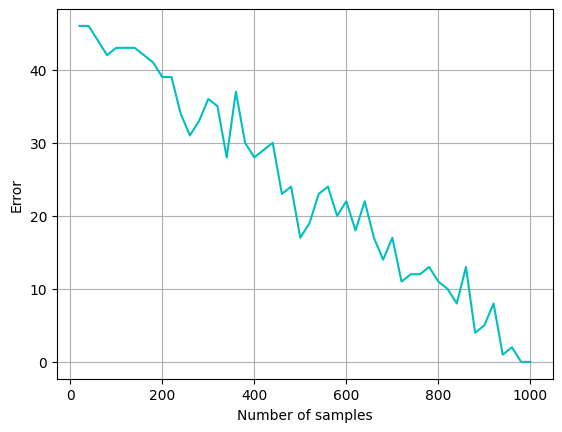

In [5]:
from matplotlib import pyplot as plt

plt.plot(samples, errors, color='c')
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.grid()
plt.show()

In [9]:
data = pandas.DataFrame(sio.loadmat('Data/DNFNoisy.mat').get('Data_Noisy'))

columns = []
for i in range(len(data.iloc[-1]) - 1):
    columns.append(f'f{i + 1}')
columns.append('y')

data = data.astype(bool)
data = pandas.DataFrame(data.values, columns=columns)

train, test = train_test_split(data, test_size=0.5)

In [10]:
import numpy

epsilons = numpy.arange(0.001, 1, 0.05).tolist()
errors = []

for e in epsilons:
    model = train_model(train, e)
    error = evaluate_model(train, model)
    errors.append(error)
    display(Markdown(f"""
    Epsilon = {e}
    Error = {error}
    $$ {latex_expression(model)} $$
    """))
    if error == 0:
        display(Markdown(f"""
        **Best model**
        {model}
        """))


    Epsilon = 0.001
    Error = 0
    $$ (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28} \wedge f_{44} \wedge f_{4} \wedge f_{33} \wedge f_{27} \wedge f_{12} \wedge f_{18} \wedge f_{47} \wedge f_{49} \wedge f_{46}) \vee (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28} \wedge f_{44} \wedge f_{4} \wedge f_{33} \wedge f_{12} \wedge f_{41} \wedge f_{36} \wedge f_{35} \wedge f_{50}) \vee (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28} \wedge f_{42} \wedge f_{44} \wedge f_{35} \wedge f_{49} \wedge f_{43} \wedge f_{47}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{19} \wedge f_{27} \wedge f_{45} \wedge f_{37} \wedge f_{33} \wedge f_{4} \wedge f_{14} \wedge f_{50} \wedge f_{49} \wedge f_{48}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{19} \wedge f_{27} \wedge f_{13} \wedge f_{46} \wedge f_{50} \wedge f_{45} \wedge f_{31}) \vee (f_{19} \wedge f_{26} \wedge f_{31} \wedge f_{25} \wedge f_{34} \wedge f_{9} \wedge f_{40} \wedge f_{44} \wedge f_{13} \wedge f_{10} \wedge f_{41}) \vee (f_{37} \wedge f_{49} \wedge f_{39} \wedge f_{18} \wedge f_{44} \wedge f_{14} \wedge f_{30} \wedge f_{41} \wedge f_{40} \wedge f_{6} \wedge f_{16} \wedge f_{43} \wedge f_{21}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{33} \wedge f_{16} \wedge f_{5} \wedge f_{13} \wedge f_{15} \wedge f_{42} \wedge f_{35} \wedge f_{11}) \vee (f_{19} \wedge f_{26} \wedge f_{7} \wedge f_{18} \wedge f_{48} \wedge f_{11} \wedge f_{35} \wedge f_{25} \wedge f_{31} \wedge f_{40} \wedge f_{47} \wedge f_{50} \wedge f_{45}) \vee (f_{37} \wedge f_{49} \wedge f_{39} \wedge f_{18} \wedge f_{44} \wedge f_{14} \wedge f_{30} \wedge f_{41} \wedge f_{12} \wedge f_{4} \wedge f_{35} \wedge f_{31} \wedge f_{23}) \vee (f_{37} \wedge f_{32} \wedge f_{26} \wedge f_{22} \wedge f_{44} \wedge f_{13} \wedge f_{6} \wedge f_{46} \wedge f_{35} \wedge f_{29} \wedge f_{18} \wedge f_{47}) \vee (f_{37} \wedge f_{49} \wedge f_{39} \wedge f_{8} \wedge f_{40} \wedge f_{17} \wedge f_{35} \wedge f_{13} \wedge f_{2} \wedge f_{11} \wedge f_{47} \wedge f_{42}) \vee (f_{32} \wedge f_{49} \wedge f_{30} \wedge f_{37} \wedge f_{17} \wedge f_{46} \wedge f_{47} \wedge f_{33} \wedge f_{34} \wedge f_{50} \wedge f_{40} \wedge f_{39}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{32} \wedge f_{28} \wedge f_{42} \wedge f_{45} \wedge f_{15} \wedge f_{41} \wedge f_{17} \wedge f_{43} \wedge f_{36}) \vee (f_{19} \wedge f_{31} \wedge f_{26} \wedge f_{29} \wedge f_{37} \wedge f_{49} \wedge f_{20} \wedge f_{25} \wedge f_{8} \wedge f_{47} \wedge f_{34} \wedge f_{32}) \vee (f_{46} \wedge f_{12} \wedge f_{11} \wedge f_{14} \wedge f_{38} \wedge f_{26} \wedge f_{8} \wedge f_{39} \wedge f_{40} \wedge f_{50} \wedge f_{35} \wedge f_{17}) \vee (f_{7} \wedge f_{26} \wedge f_{18} \wedge f_{48} \wedge f_{11} \wedge f_{19} \wedge f_{46} \wedge f_{30} \wedge f_{31} \wedge f_{50} \wedge f_{27} \wedge f_{16} \wedge f_{12}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{40} \wedge f_{36} \wedge f_{31} \wedge f_{26} \wedge f_{50} \wedge f_{18} \wedge f_{35} \wedge f_{41} \wedge f_{42}) \vee (f_{8} \wedge f_{41} \wedge f_{7} \wedge f_{15} \wedge f_{30} \wedge f_{18} \wedge f_{26} \wedge f_{33} \wedge f_{29} \wedge f_{39} \wedge f_{11}) \vee (f_{8} \wedge f_{41} \wedge f_{7} \wedge f_{15} \wedge f_{30} \wedge f_{43} \wedge f_{49} \wedge f_{39} \wedge f_{38} \wedge f_{31}) \vee (f_{19} \wedge f_{31} \wedge f_{25} \wedge f_{26} \wedge f_{29} \wedge f_{3} \wedge f_{46} \wedge f_{14} \wedge f_{36} \wedge f_{8} \wedge f_{45} \wedge f_{30}) \vee (f_{2} \wedge f_{4} \wedge f_{20} \wedge f_{22} \wedge f_{36} \wedge f_{25} \wedge f_{45} \wedge f_{13} \wedge f_{11} \wedge f_{34} \wedge f_{38}) \vee (f_{12} \wedge f_{46} \wedge f_{5} \wedge f_{38} \wedge f_{26} \wedge f_{49} \wedge f_{41} \wedge f_{1} \wedge f_{44} \wedge f_{31} \wedge f_{30}) \vee (f_{7} \wedge f_{13} \wedge f_{16} \wedge f_{40} \wedge f_{22} \wedge f_{37} \wedge f_{39} \wedge f_{47} \wedge f_{32} \wedge f_{25} \wedge f_{31} \wedge f_{48}) \vee (f_{7} \wedge f_{13} \wedge f_{16} \wedge f_{27} \wedge f_{18} \wedge f_{19} \wedge f_{33} \wedge f_{34} \wedge f_{25} \wedge f_{49} \wedge f_{35} \wedge f_{36}) \vee (f_{2} \wedge f_{18} \wedge f_{48} \wedge f_{46} \wedge f_{12} \wedge f_{38} \wedge f_{14} \wedge f_{16} \wedge f_{13} \wedge f_{31} \wedge f_{15}) \vee (f_{7} \wedge f_{2} \wedge f_{26} \wedge f_{32} \wedge f_{18} \wedge f_{48} \wedge f_{33} \wedge f_{38} \wedge f_{28} \wedge f_{21} \wedge f_{41} \wedge f_{49}) \vee (f_{4} \wedge f_{49} \wedge f_{32} \wedge f_{30} \wedge f_{37} \wedge f_{46} \wedge f_{18} \wedge f_{45} \wedge f_{44} \wedge f_{48} \wedge f_{50} \wedge f_{43} \wedge f_{47}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{16} \wedge f_{22} \wedge f_{40} \wedge f_{26} \wedge f_{46} \wedge f_{19} \wedge f_{44} \wedge f_{42} \wedge f_{41}) \vee (f_{2} \wedge f_{4} \wedge f_{32} \wedge f_{42} \wedge f_{11} \wedge f_{41} \wedge f_{20} \wedge f_{50} \wedge f_{5} \wedge f_{48} \wedge f_{27}) \vee (f_{12} \wedge f_{7} \wedge f_{9} \wedge f_{15} \wedge f_{46} \wedge f_{32} \wedge f_{36} \wedge f_{40} \wedge f_{22} \wedge f_{43} \wedge f_{41} \wedge f_{50}) \vee (f_{2} \wedge f_{7} \wedge f_{26} \wedge f_{32} \wedge f_{40} \wedge f_{36} \wedge f_{9} \wedge f_{27} \wedge f_{50} \wedge f_{41} \wedge f_{39}) \vee (f_{10} \wedge f_{43} \wedge f_{19} \wedge f_{31} \wedge f_{25} \wedge f_{23} \wedge f_{14} \wedge f_{44} \wedge f_{45} \wedge f_{47}) \vee (f_{4} \wedge f_{49} \wedge f_{20} \wedge f_{19} \wedge f_{35} \wedge f_{28} \wedge f_{40} \wedge f_{2} \wedge f_{11} \wedge f_{8} \wedge f_{39}) \vee (f_{12} \wedge f_{10} \wedge f_{16} \wedge f_{24} \wedge f_{30} \wedge f_{43} \wedge f_{17} \wedge f_{49} \wedge f_{15}) \vee (f_{2} \wedge f_{18} \wedge f_{11} \wedge f_{48} \wedge f_{44} \wedge f_{33} \wedge f_{32} \wedge f_{39} \wedge f_{15} \wedge f_{27} \wedge f_{34}) \vee (f_{7} \wedge f_{2} \wedge f_{26} \wedge f_{27} \wedge f_{15} \wedge f_{32} \wedge f_{18} \wedge f_{48} \wedge f_{9} \wedge f_{38} \wedge f_{40} \wedge f_{37} \wedge f_{44} \wedge f_{49}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{16} \wedge f_{45} \wedge f_{12} \wedge f_{2} \wedge f_{49} \wedge f_{20} \wedge f_{31} \wedge f_{29} \wedge f_{48}) \vee (f_{4} \wedge f_{49} \wedge f_{32} \wedge f_{23} \wedge f_{34} \wedge f_{1} \wedge f_{30} \wedge f_{20} \wedge f_{17} \wedge f_{46} \wedge f_{38} \wedge f_{42} \wedge f_{39}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{16} \wedge f_{22} \wedge f_{36} \wedge f_{45} \wedge f_{31} \wedge f_{42} \wedge f_{46} \wedge f_{37}) \vee (f_{7} \wedge f_{2} \wedge f_{26} \wedge f_{47} \wedge f_{14} \wedge f_{12} \wedge f_{38} \wedge f_{48} \wedge f_{33} \wedge f_{50} \wedge f_{28} \wedge f_{49}) \vee (f_{4} \wedge f_{49} \wedge f_{32} \wedge f_{9} \wedge f_{25} \wedge f_{14} \wedge f_{50} \wedge f_{42} \wedge f_{31} \wedge f_{3} \wedge f_{30}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{40} \wedge f_{36} \wedge f_{31} \wedge f_{45} \wedge f_{32} \wedge f_{49} \wedge f_{42} \wedge f_{43}) \vee (f_{7} \wedge f_{9} \wedge f_{48} \wedge f_{36} \wedge f_{18} \wedge f_{12} \wedge f_{14} \wedge f_{16} \wedge f_{43} \wedge f_{41} \wedge f_{37} \wedge f_{45}) \vee (f_{7} \wedge f_{9} \wedge f_{48} \wedge f_{36} \wedge f_{16} \wedge f_{40} \wedge f_{35} \wedge f_{47} \wedge f_{14} \wedge f_{46} \wedge f_{49}) \vee (f_{10} \wedge f_{43} \wedge f_{19} \wedge f_{31} \wedge f_{50} \wedge f_{45} \wedge f_{9} \wedge f_{12} \wedge f_{6} \wedge f_{36}) \vee (f_{4} \wedge f_{2} \wedge f_{6} \wedge f_{46} \wedge f_{48} \wedge f_{39} \wedge f_{33} \wedge f_{34} \wedge f_{44} \wedge f_{35} \wedge f_{50} \wedge f_{40}) \vee (f_{4} \wedge f_{2} \wedge f_{18} \wedge f_{40} \wedge f_{10} \wedge f_{45} \wedge f_{43} \wedge f_{24} \wedge f_{49}) \vee (f_{8} \wedge f_{29} \wedge f_{27} \wedge f_{48} \wedge f_{17} \wedge f_{1} \wedge f_{46} \wedge f_{44} \wedge f_{32} \wedge f_{22} \wedge f_{47} \wedge f_{49} \wedge f_{41}) \vee (f_{7} \wedge f_{47} \wedge f_{13} \wedge f_{26} \wedge f_{44} \wedge f_{37} \wedge f_{39} \wedge f_{22} \wedge f_{32} \wedge f_{40} \wedge f_{42} \wedge f_{36}) \vee (f_{30} \wedge f_{46} \wedge f_{17} \wedge f_{45} \wedge f_{28} \wedge f_{49} \wedge f_{15} \wedge f_{4} \wedge f_{31} \wedge f_{48}) \vee (f_{7} \wedge f_{47} \wedge f_{19} \wedge f_{29} \wedge f_{49} \wedge f_{21} \wedge f_{10} \wedge f_{27} \wedge f_{14} \wedge f_{31} \wedge f_{32}) \vee (f_{8} \wedge f_{38} \wedge f_{7} \wedge f_{18} \wedge f_{44} \wedge f_{16} \wedge f_{39} \wedge f_{40} \wedge f_{26} \wedge f_{42} \wedge f_{45} \wedge f_{47} \wedge f_{48}) \vee (f_{4} \wedge f_{21} \wedge f_{49} \wedge f_{43} \wedge f_{1} \wedge f_{26} \wedge f_{14} \wedge f_{24} \wedge f_{20} \wedge f_{35} \wedge f_{30} \wedge f_{27}) \vee (f_{46} \wedge f_{17} \wedge f_{24} \wedge f_{43} \wedge f_{41} \wedge f_{30} \wedge f_{50} \wedge f_{32} \wedge f_{33} \wedge f_{42} \wedge f_{47}) \vee (f_{8} \wedge f_{21} \wedge f_{47} \wedge f_{3} \wedge f_{38} \wedge f_{48} \wedge f_{23} \wedge f_{11} \wedge f_{40} \wedge f_{28}) \vee (f_{46} \wedge f_{22} \wedge f_{30} \wedge f_{37} \wedge f_{49} \wedge f_{48} \wedge f_{47} \wedge f_{41} \wedge f_{34} \wedge f_{35} \wedge f_{40}) \vee (f_{4} \wedge f_{29} \wedge f_{21} \wedge f_{28} \wedge f_{18} \wedge f_{1} \wedge f_{43} \wedge f_{24} \wedge f_{20} \wedge f_{44} \wedge f_{46} \wedge f_{49}) \vee (f_{8} \wedge f_{29} \wedge f_{25} \wedge f_{42} \wedge f_{19} \wedge f_{46} \wedge f_{4} \wedge f_{36} \wedge f_{32} \wedge f_{48} \wedge f_{38} \wedge f_{28}) \vee (f_{8} \wedge f_{29} \wedge f_{12} \wedge f_{19} \wedge f_{5} \wedge f_{18} \wedge f_{47} \wedge f_{50} \wedge f_{15} \wedge f_{31} \wedge f_{38} \wedge f_{37}) \vee (f_{22} \wedge f_{46} \wedge f_{39} \wedge f_{30} \wedge f_{48} \wedge f_{4} \wedge f_{49} \wedge f_{35} \wedge f_{25} \wedge f_{45} \wedge f_{43}) \vee (f_{8} \wedge f_{41} \wedge f_{13} \wedge f_{2} \wedge f_{4} \wedge f_{18} \wedge f_{40} \wedge f_{39} \wedge f_{26} \wedge f_{17} \wedge f_{35} \wedge f_{22} \wedge f_{36}) \vee (f_{8} \wedge f_{29} \wedge f_{25} \wedge f_{42} \wedge f_{26} \wedge f_{38} \wedge f_{35} \wedge f_{49} \wedge f_{37} \wedge f_{45} \wedge f_{50}) \vee (f_{21} \wedge f_{8} \wedge f_{2} \wedge f_{40} \wedge f_{18} \wedge f_{16} \wedge f_{46} \wedge f_{34} \wedge f_{22}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{16} \wedge f_{22} \wedge f_{36} \wedge f_{40} \wedge f_{45} \wedge f_{14} \wedge f_{23} \wedge f_{48}) \vee (f_{12} \wedge f_{26} \wedge f_{37} \wedge f_{44} \wedge f_{45} \wedge f_{6} \wedge f_{13} \wedge f_{39} \wedge f_{33} \wedge f_{38} \wedge f_{42}) \vee (f_{27} \wedge f_{12} \wedge f_{36} \wedge f_{22} \wedge f_{28} \wedge f_{26} \wedge f_{49} \wedge f_{31} \wedge f_{35} \wedge f_{37} \wedge f_{44} \wedge f_{39}) \vee (f_{7} \wedge f_{2} \wedge f_{26} \wedge f_{47} \wedge f_{14} \wedge f_{18} \wedge f_{48} \wedge f_{38} \wedge f_{12} \wedge f_{27} \wedge f_{36} \wedge f_{34} \wedge f_{24}) \vee (f_{41} \wedge f_{21} \wedge f_{8} \wedge f_{2} \wedge f_{13} \wedge f_{42} \wedge f_{37} \wedge f_{45} \wedge f_{31}) \vee (f_{46} \wedge f_{28} \wedge f_{22} \wedge f_{7} \wedge f_{12} \wedge f_{13} \wedge f_{27} \wedge f_{50} \wedge f_{32} \wedge f_{3} \wedge f_{38} \wedge f_{39} \wedge f_{36}) \vee (f_{46} \wedge f_{31} \wedge f_{19} \wedge f_{25} \wedge f_{44} \wedge f_{38} \wedge f_{4} \wedge f_{40} \wedge f_{39} \wedge f_{47} \wedge f_{45}) \vee (f_{15} \wedge f_{7} \wedge f_{43} \wedge f_{2} \wedge f_{46} \wedge f_{45} \wedge f_{27} \wedge f_{30} \wedge f_{47} \wedge f_{39}) \vee (f_{41} \wedge f_{4} \wedge f_{21} \wedge f_{18} \wedge f_{32} \wedge f_{26} \wedge f_{15} \wedge f_{33} \wedge f_{6} \wedge f_{28} \wedge f_{40} \wedge f_{50}) \vee (f_{29} \wedge f_{2} \wedge f_{27} \wedge f_{50} \wedge f_{18} \wedge f_{44} \wedge f_{9} \wedge f_{6} \wedge f_{43} \wedge f_{37} \wedge f_{45} \wedge f_{49}) \vee (f_{46} \wedge f_{15} \wedge f_{31} \wedge f_{49} \wedge f_{29} \wedge f_{39} \wedge f_{8} \wedge f_{48} \wedge f_{50} \wedge f_{36} \wedge f_{33} \wedge f_{41}) \vee (f_{4} \wedge f_{41} \wedge f_{2} \wedge f_{30} \wedge f_{39} \wedge f_{6} \wedge f_{46} \wedge f_{33} \wedge f_{36} \wedge f_{29} \wedge f_{35}) \vee (f_{8} \wedge f_{41} \wedge f_{21} \wedge f_{17} \wedge f_{27} \wedge f_{16} \wedge f_{42} \wedge f_{47} \wedge f_{45} \wedge f_{43} \wedge f_{34}) \vee (f_{2} \wedge f_{29} \wedge f_{8} \wedge f_{25} \wedge f_{15} \wedge f_{31} \wedge f_{50} \wedge f_{49} \wedge f_{44} \wedge f_{42}) \vee (f_{2} \wedge f_{4} \wedge f_{41} \wedge f_{30} \wedge f_{39} \wedge f_{49} \wedge f_{46} \wedge f_{47} \wedge f_{45} \wedge f_{31}) \vee (f_{10} \wedge f_{43} \wedge f_{7} \wedge f_{15} \wedge f_{38} \wedge f_{8} \wedge f_{31} \wedge f_{34} \wedge f_{35}) \vee (f_{40} \wedge f_{2} \wedge f_{39} \wedge f_{37} \wedge f_{44} \wedge f_{50} \wedge f_{24} \wedge f_{11} \wedge f_{31}) \vee (f_{48} \wedge f_{29} \wedge f_{27} \wedge f_{8} \wedge f_{21} \wedge f_{17} \wedge f_{39} \wedge f_{1} \wedge f_{43} \wedge f_{40} \wedge f_{41}) $$
    


        **Best model**
        False or (True and _f32_ and _f26_ and _f37_ and _f19_ and _f28_ and _f44_ and _f4_ and _f33_ and _f27_ and _f12_ and _f18_ and _f47_ and _f49_ and _f46_) or (True and _f32_ and _f26_ and _f37_ and _f19_ and _f28_ and _f44_ and _f4_ and _f33_ and _f12_ and _f41_ and _f36_ and _f35_ and _f50_) or (True and _f32_ and _f26_ and _f37_ and _f19_ and _f28_ and _f42_ and _f44_ and _f35_ and _f49_ and _f43_ and _f47_) or (True and _f32_ and _f26_ and _f12_ and _f19_ and _f27_ and _f45_ and _f37_ and _f33_ and _f4_ and _f14_ and _f50_ and _f49_ and _f48_) or (True and _f32_ and _f26_ and _f12_ and _f19_ and _f27_ and _f13_ and _f46_ and _f50_ and _f45_ and _f31_) or (True and _f19_ and _f26_ and _f31_ and _f25_ and _f34_ and _f9_ and _f40_ and _f44_ and _f13_ and _f10_ and _f41_) or (True and _f37_ and _f49_ and _f39_ and _f18_ and _f44_ and _f14_ and _f30_ and _f41_ and _f40_ and _f6_ and _f16_ and _f43_ and _f21_) or (True and _f32_ and _f26_ and _f12_ and _f33_ and _f16_ and _f5_ and _f13_ and _f15_ and _f42_ and _f35_ and _f11_) or (True and _f19_ and _f26_ and _f7_ and _f18_ and _f48_ and _f11_ and _f35_ and _f25_ and _f31_ and _f40_ and _f47_ and _f50_ and _f45_) or (True and _f37_ and _f49_ and _f39_ and _f18_ and _f44_ and _f14_ and _f30_ and _f41_ and _f12_ and _f4_ and _f35_ and _f31_ and _f23_) or (True and _f37_ and _f32_ and _f26_ and _f22_ and _f44_ and _f13_ and _f6_ and _f46_ and _f35_ and _f29_ and _f18_ and _f47_) or (True and _f37_ and _f49_ and _f39_ and _f8_ and _f40_ and _f17_ and _f35_ and _f13_ and _f2_ and _f11_ and _f47_ and _f42_) or (True and _f32_ and _f49_ and _f30_ and _f37_ and _f17_ and _f46_ and _f47_ and _f33_ and _f34_ and _f50_ and _f40_ and _f39_) or (True and _f7_ and _f13_ and _f47_ and _f32_ and _f28_ and _f42_ and _f45_ and _f15_ and _f41_ and _f17_ and _f43_ and _f36_) or (True and _f19_ and _f31_ and _f26_ and _f29_ and _f37_ and _f49_ and _f20_ and _f25_ and _f8_ and _f47_ and _f34_ and _f32_) or (True and _f46_ and _f12_ and _f11_ and _f14_ and _f38_ and _f26_ and _f8_ and _f39_ and _f40_ and _f50_ and _f35_ and _f17_) or (True and _f7_ and _f26_ and _f18_ and _f48_ and _f11_ and _f19_ and _f46_ and _f30_ and _f31_ and _f50_ and _f27_ and _f16_ and _f12_) or (True and _f7_ and _f13_ and _f47_ and _f40_ and _f36_ and _f31_ and _f26_ and _f50_ and _f18_ and _f35_ and _f41_ and _f42_) or (True and _f8_ and _f41_ and _f7_ and _f15_ and _f30_ and _f18_ and _f26_ and _f33_ and _f29_ and _f39_ and _f11_) or (True and _f8_ and _f41_ and _f7_ and _f15_ and _f30_ and _f43_ and _f49_ and _f39_ and _f38_ and _f31_) or (True and _f19_ and _f31_ and _f25_ and _f26_ and _f29_ and _f3_ and _f46_ and _f14_ and _f36_ and _f8_ and _f45_ and _f30_) or (True and _f2_ and _f4_ and _f20_ and _f22_ and _f36_ and _f25_ and _f45_ and _f13_ and _f11_ and _f34_ and _f38_) or (True and _f12_ and _f46_ and _f5_ and _f38_ and _f26_ and _f49_ and _f41_ and _f1_ and _f44_ and _f31_ and _f30_) or (True and _f7_ and _f13_ and _f16_ and _f40_ and _f22_ and _f37_ and _f39_ and _f47_ and _f32_ and _f25_ and _f31_ and _f48_) or (True and _f7_ and _f13_ and _f16_ and _f27_ and _f18_ and _f19_ and _f33_ and _f34_ and _f25_ and _f49_ and _f35_ and _f36_) or (True and _f2_ and _f18_ and _f48_ and _f46_ and _f12_ and _f38_ and _f14_ and _f16_ and _f13_ and _f31_ and _f15_) or (True and _f7_ and _f2_ and _f26_ and _f32_ and _f18_ and _f48_ and _f33_ and _f38_ and _f28_ and _f21_ and _f41_ and _f49_) or (True and _f4_ and _f49_ and _f32_ and _f30_ and _f37_ and _f46_ and _f18_ and _f45_ and _f44_ and _f48_ and _f50_ and _f43_ and _f47_) or (True and _f7_ and _f13_ and _f47_ and _f16_ and _f22_ and _f40_ and _f26_ and _f46_ and _f19_ and _f44_ and _f42_ and _f41_) or (True and _f2_ and _f4_ and _f32_ and _f42_ and _f11_ and _f41_ and _f20_ and _f50_ and _f5_ and _f48_ and _f27_) or (True and _f12_ and _f7_ and _f9_ and _f15_ and _f46_ and _f32_ and _f36_ and _f40_ and _f22_ and _f43_ and _f41_ and _f50_) or (True and _f2_ and _f7_ and _f26_ and _f32_ and _f40_ and _f36_ and _f9_ and _f27_ and _f50_ and _f41_ and _f39_) or (True and _f10_ and _f43_ and _f19_ and _f31_ and _f25_ and _f23_ and _f14_ and _f44_ and _f45_ and _f47_) or (True and _f4_ and _f49_ and _f20_ and _f19_ and _f35_ and _f28_ and _f40_ and _f2_ and _f11_ and _f8_ and _f39_) or (True and _f12_ and _f10_ and _f16_ and _f24_ and _f30_ and _f43_ and _f17_ and _f49_ and _f15_) or (True and _f2_ and _f18_ and _f11_ and _f48_ and _f44_ and _f33_ and _f32_ and _f39_ and _f15_ and _f27_ and _f34_) or (True and _f7_ and _f2_ and _f26_ and _f27_ and _f15_ and _f32_ and _f18_ and _f48_ and _f9_ and _f38_ and _f40_ and _f37_ and _f44_ and _f49_) or (True and _f7_ and _f13_ and _f47_ and _f16_ and _f45_ and _f12_ and _f2_ and _f49_ and _f20_ and _f31_ and _f29_ and _f48_) or (True and _f4_ and _f49_ and _f32_ and _f23_ and _f34_ and _f1_ and _f30_ and _f20_ and _f17_ and _f46_ and _f38_ and _f42_ and _f39_) or (True and _f7_ and _f13_ and _f47_ and _f16_ and _f22_ and _f36_ and _f45_ and _f31_ and _f42_ and _f46_ and _f37_) or (True and _f7_ and _f2_ and _f26_ and _f47_ and _f14_ and _f12_ and _f38_ and _f48_ and _f33_ and _f50_ and _f28_ and _f49_) or (True and _f4_ and _f49_ and _f32_ and _f9_ and _f25_ and _f14_ and _f50_ and _f42_ and _f31_ and _f3_ and _f30_) or (True and _f7_ and _f13_ and _f47_ and _f40_ and _f36_ and _f31_ and _f45_ and _f32_ and _f49_ and _f42_ and _f43_) or (True and _f7_ and _f9_ and _f48_ and _f36_ and _f18_ and _f12_ and _f14_ and _f16_ and _f43_ and _f41_ and _f37_ and _f45_) or (True and _f7_ and _f9_ and _f48_ and _f36_ and _f16_ and _f40_ and _f35_ and _f47_ and _f14_ and _f46_ and _f49_) or (True and _f10_ and _f43_ and _f19_ and _f31_ and _f50_ and _f45_ and _f9_ and _f12_ and _f6_ and _f36_) or (True and _f4_ and _f2_ and _f6_ and _f46_ and _f48_ and _f39_ and _f33_ and _f34_ and _f44_ and _f35_ and _f50_ and _f40_) or (True and _f4_ and _f2_ and _f18_ and _f40_ and _f10_ and _f45_ and _f43_ and _f24_ and _f49_) or (True and _f8_ and _f29_ and _f27_ and _f48_ and _f17_ and _f1_ and _f46_ and _f44_ and _f32_ and _f22_ and _f47_ and _f49_ and _f41_) or (True and _f7_ and _f47_ and _f13_ and _f26_ and _f44_ and _f37_ and _f39_ and _f22_ and _f32_ and _f40_ and _f42_ and _f36_) or (True and _f30_ and _f46_ and _f17_ and _f45_ and _f28_ and _f49_ and _f15_ and _f4_ and _f31_ and _f48_) or (True and _f7_ and _f47_ and _f19_ and _f29_ and _f49_ and _f21_ and _f10_ and _f27_ and _f14_ and _f31_ and _f32_) or (True and _f8_ and _f38_ and _f7_ and _f18_ and _f44_ and _f16_ and _f39_ and _f40_ and _f26_ and _f42_ and _f45_ and _f47_ and _f48_) or (True and _f4_ and _f21_ and _f49_ and _f43_ and _f1_ and _f26_ and _f14_ and _f24_ and _f20_ and _f35_ and _f30_ and _f27_) or (True and _f46_ and _f17_ and _f24_ and _f43_ and _f41_ and _f30_ and _f50_ and _f32_ and _f33_ and _f42_ and _f47_) or (True and _f8_ and _f21_ and _f47_ and _f3_ and _f38_ and _f48_ and _f23_ and _f11_ and _f40_ and _f28_) or (True and _f46_ and _f22_ and _f30_ and _f37_ and _f49_ and _f48_ and _f47_ and _f41_ and _f34_ and _f35_ and _f40_) or (True and _f4_ and _f29_ and _f21_ and _f28_ and _f18_ and _f1_ and _f43_ and _f24_ and _f20_ and _f44_ and _f46_ and _f49_) or (True and _f8_ and _f29_ and _f25_ and _f42_ and _f19_ and _f46_ and _f4_ and _f36_ and _f32_ and _f48_ and _f38_ and _f28_) or (True and _f8_ and _f29_ and _f12_ and _f19_ and _f5_ and _f18_ and _f47_ and _f50_ and _f15_ and _f31_ and _f38_ and _f37_) or (True and _f22_ and _f46_ and _f39_ and _f30_ and _f48_ and _f4_ and _f49_ and _f35_ and _f25_ and _f45_ and _f43_) or (True and _f8_ and _f41_ and _f13_ and _f2_ and _f4_ and _f18_ and _f40_ and _f39_ and _f26_ and _f17_ and _f35_ and _f22_ and _f36_) or (True and _f8_ and _f29_ and _f25_ and _f42_ and _f26_ and _f38_ and _f35_ and _f49_ and _f37_ and _f45_ and _f50_) or (True and _f21_ and _f8_ and _f2_ and _f40_ and _f18_ and _f16_ and _f46_ and _f34_ and _f22_) or (True and _f7_ and _f13_ and _f47_ and _f16_ and _f22_ and _f36_ and _f40_ and _f45_ and _f14_ and _f23_ and _f48_) or (True and _f12_ and _f26_ and _f37_ and _f44_ and _f45_ and _f6_ and _f13_ and _f39_ and _f33_ and _f38_ and _f42_) or (True and _f27_ and _f12_ and _f36_ and _f22_ and _f28_ and _f26_ and _f49_ and _f31_ and _f35_ and _f37_ and _f44_ and _f39_) or (True and _f7_ and _f2_ and _f26_ and _f47_ and _f14_ and _f18_ and _f48_ and _f38_ and _f12_ and _f27_ and _f36_ and _f34_ and _f24_) or (True and _f41_ and _f21_ and _f8_ and _f2_ and _f13_ and _f42_ and _f37_ and _f45_ and _f31_) or (True and _f46_ and _f28_ and _f22_ and _f7_ and _f12_ and _f13_ and _f27_ and _f50_ and _f32_ and _f3_ and _f38_ and _f39_ and _f36_) or (True and _f46_ and _f31_ and _f19_ and _f25_ and _f44_ and _f38_ and _f4_ and _f40_ and _f39_ and _f47_ and _f45_) or (True and _f15_ and _f7_ and _f43_ and _f2_ and _f46_ and _f45_ and _f27_ and _f30_ and _f47_ and _f39_) or (True and _f41_ and _f4_ and _f21_ and _f18_ and _f32_ and _f26_ and _f15_ and _f33_ and _f6_ and _f28_ and _f40_ and _f50_) or (True and _f29_ and _f2_ and _f27_ and _f50_ and _f18_ and _f44_ and _f9_ and _f6_ and _f43_ and _f37_ and _f45_ and _f49_) or (True and _f46_ and _f15_ and _f31_ and _f49_ and _f29_ and _f39_ and _f8_ and _f48_ and _f50_ and _f36_ and _f33_ and _f41_) or (True and _f4_ and _f41_ and _f2_ and _f30_ and _f39_ and _f6_ and _f46_ and _f33_ and _f36_ and _f29_ and _f35_) or (True and _f8_ and _f41_ and _f21_ and _f17_ and _f27_ and _f16_ and _f42_ and _f47_ and _f45_ and _f43_ and _f34_) or (True and _f2_ and _f29_ and _f8_ and _f25_ and _f15_ and _f31_ and _f50_ and _f49_ and _f44_ and _f42_) or (True and _f2_ and _f4_ and _f41_ and _f30_ and _f39_ and _f49_ and _f46_ and _f47_ and _f45_ and _f31_) or (True and _f10_ and _f43_ and _f7_ and _f15_ and _f38_ and _f8_ and _f31_ and _f34_ and _f35_) or (True and _f40_ and _f2_ and _f39_ and _f37_ and _f44_ and _f50_ and _f24_ and _f11_ and _f31_) or (True and _f48_ and _f29_ and _f27_ and _f8_ and _f21_ and _f17_ and _f39_ and _f1_ and _f43_ and _f40_ and _f41_)
        


    Epsilon = 0.051000000000000004
    Error = 95
    $$ (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28} \wedge f_{44} \wedge f_{4} \wedge f_{33}) \vee (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28} \wedge f_{42} \wedge f_{44}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{19} \wedge f_{27} \wedge f_{45} \wedge f_{37} \wedge f_{33}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{19} \wedge f_{27} \wedge f_{13} \wedge f_{46}) \vee (f_{19} \wedge f_{31} \wedge f_{26} \wedge f_{25} \wedge f_{34} \wedge f_{9} \wedge f_{40}) \vee (f_{37} \wedge f_{49} \wedge f_{39} \wedge f_{18} \wedge f_{44} \wedge f_{14} \wedge f_{30} \wedge f_{41}) \vee (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{22} \wedge f_{44} \wedge f_{13} \wedge f_{6}) \vee (f_{32} \wedge f_{26} \wedge f_{12} \wedge f_{33} \wedge f_{16} \wedge f_{5} \wedge f_{13}) \vee (f_{7} \wedge f_{18} \wedge f_{48} \wedge f_{26} \wedge f_{11} \wedge f_{19} \wedge f_{35}) \vee (f_{30} \wedge f_{46} \wedge f_{17} \wedge f_{45} \wedge f_{41} \wedge f_{24} \wedge f_{43}) \vee (f_{8} \wedge f_{21} \wedge f_{47} \wedge f_{11} \wedge f_{34}) \vee (f_{49} \wedge f_{37} \wedge f_{26} \wedge f_{30} \wedge f_{46} \wedge f_{35} \wedge f_{33}) \vee (f_{2} \wedge f_{4} \wedge f_{20} \wedge f_{22} \wedge f_{36} \wedge f_{25}) \vee (f_{49} \wedge f_{37} \wedge f_{30} \wedge f_{46} \wedge f_{38} \wedge f_{5} \wedge f_{1}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{16} \wedge f_{22} \wedge f_{40} \wedge f_{24}) \vee (f_{49} \wedge f_{37} \wedge f_{26} \wedge f_{44} \wedge f_{45} \wedge f_{1} \wedge f_{42}) \vee (f_{46} \wedge f_{12} \wedge f_{48} \wedge f_{18} \wedge f_{5} \wedge f_{19} \wedge f_{15}) \vee (f_{7} \wedge f_{13} \wedge f_{27} \wedge f_{16} \wedge f_{18} \wedge f_{19} \wedge f_{33} \wedge f_{34}) \vee (f_{2} \wedge f_{4} \wedge f_{32} \wedge f_{42} \wedge f_{11} \wedge f_{41}) \vee (f_{46} \wedge f_{17} \wedge f_{24} \wedge f_{12} \wedge f_{40} \wedge f_{48}) \vee (f_{8} \wedge f_{31} \wedge f_{49} \wedge f_{39} \wedge f_{29} \wedge f_{46}) \vee (f_{7} \wedge f_{2} \wedge f_{32} \wedge f_{26} \wedge f_{15} \wedge f_{27} \wedge f_{18} \wedge f_{48}) \vee (f_{7} \wedge f_{13} \wedge f_{27} \wedge f_{16} \wedge f_{9} \wedge f_{14}) \vee (f_{4} \wedge f_{28} \wedge f_{29} \wedge f_{18} \wedge f_{21} \wedge f_{33}) \vee (f_{8} \wedge f_{19} \wedge f_{15} \wedge f_{40} \wedge f_{39} \wedge f_{37}) \vee (f_{43} \wedge f_{15} \wedge f_{7} \wedge f_{32} \wedge f_{41} \wedge f_{23}) \vee (f_{12} \wedge f_{43} \wedge f_{48} \wedge f_{33} \wedge f_{13} \wedge f_{44} \wedge f_{32}) \vee (f_{8} \wedge f_{19} \wedge f_{25} \wedge f_{42} \wedge f_{29} \wedge f_{47} \wedge f_{26} \wedge f_{31}) \vee (f_{4} \wedge f_{49} \wedge f_{28} \wedge f_{29} \wedge f_{24}) \vee (f_{8} \wedge f_{21} \wedge f_{25} \wedge f_{3} \wedge f_{19}) \vee (f_{12} \wedge f_{7} \wedge f_{32} \wedge f_{47} \wedge f_{2} \wedge f_{26} \wedge f_{14} \wedge f_{38}) \vee (f_{12} \wedge f_{7} \wedge f_{46} \wedge f_{22} \wedge f_{28} \wedge f_{13} \wedge f_{27} \wedge f_{50}) \vee (f_{12} \wedge f_{43} \wedge f_{48} \wedge f_{4} \wedge f_{46} \wedge f_{35}) \vee (f_{31} \wedge f_{19} \wedge f_{26} \wedge f_{22} \wedge f_{27} \wedge f_{12}) \vee (f_{2} \wedge f_{8} \wedge f_{18} \wedge f_{40} \wedge f_{39} \wedge f_{26} \wedge f_{13}) \vee (f_{31} \wedge f_{19} \wedge f_{15} \wedge f_{45} \wedge f_{50} \wedge f_{9}) \vee (f_{43} \wedge f_{15} \wedge f_{7} \wedge f_{2} \wedge f_{46}) \vee (f_{33} \wedge f_{43} \wedge f_{13} \wedge f_{8} \wedge f_{40} \wedge f_{16}) \vee (f_{42} \wedge f_{30} \wedge f_{45} \wedge f_{5} \wedge f_{37} \wedge f_{23}) \vee (f_{32} \wedge f_{12} \wedge f_{4} \wedge f_{36} \wedge f_{37} \wedge f_{45}) \vee (f_{18} \wedge f_{14} \wedge f_{50} \wedge f_{46} \wedge f_{40} \wedge f_{1} \wedge f_{17}) $$
    


    Epsilon = 0.101
    Error = 103
    $$ (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19} \wedge f_{28}) \vee (f_{19} \wedge f_{40} \wedge f_{35} \wedge f_{26} \wedge f_{31}) \vee (f_{49} \wedge f_{37} \wedge f_{30} \wedge f_{46} \wedge f_{17}) \vee (f_{8} \wedge f_{41} \wedge f_{19} \wedge f_{14} \wedge f_{37}) \vee (f_{32} \wedge f_{26} \wedge f_{13} \wedge f_{16} \wedge f_{20}) \vee (f_{7} \wedge f_{13} \wedge f_{47} \wedge f_{32} \wedge f_{40}) \vee (f_{30} \wedge f_{41} \wedge f_{18} \wedge f_{37} \wedge f_{49}) \vee (f_{4} \wedge f_{2} \wedge f_{20} \wedge f_{27}) \vee (f_{12} \wedge f_{46} \wedge f_{11} \wedge f_{14} \wedge f_{38}) \vee (f_{30} \wedge f_{45} \wedge f_{18} \wedge f_{48}) \vee (f_{21} \wedge f_{33} \wedge f_{30} \wedge f_{38}) \vee (f_{12} \wedge f_{10} \wedge f_{16}) \vee (f_{19} \wedge f_{31} \wedge f_{25} \wedge f_{21}) \vee (f_{2} \wedge f_{7} \wedge f_{19} \wedge f_{30}) \vee (f_{46} \wedge f_{25} \wedge f_{29} \wedge f_{4} \wedge f_{48}) $$
    


    Epsilon = 0.15100000000000002
    Error = 102
    $$ (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19}) \vee (f_{4} \wedge f_{32} \wedge f_{49} \wedge f_{25}) \vee (f_{30} \wedge f_{41} \wedge f_{18} \wedge f_{37}) \vee (f_{19} \wedge f_{40} \wedge f_{35} \wedge f_{48}) \vee (f_{32} \wedge f_{11} \wedge f_{8}) \vee (f_{15} \wedge f_{19} \wedge f_{18} \wedge f_{12}) \vee (f_{4} \wedge f_{34} \wedge f_{6}) \vee (f_{46} \wedge f_{5} \wedge f_{12} \wedge f_{11}) \vee (f_{30} \wedge f_{42} \wedge f_{45} \wedge f_{10}) \vee (f_{19} \wedge f_{28} \wedge f_{44} \wedge f_{41}) \vee (f_{7} \wedge f_{26} \wedge f_{2} \wedge f_{14}) $$
    


    Epsilon = 0.201
    Error = 104
    $$ (f_{32} \wedge f_{26} \wedge f_{37} \wedge f_{19}) \vee (f_{4} \wedge f_{32} \wedge f_{49} \wedge f_{25}) \vee (f_{30} \wedge f_{41} \wedge f_{18}) \vee (f_{11} \wedge f_{32} \wedge f_{8}) \vee (f_{19} \wedge f_{31} \wedge f_{26}) \vee (f_{4} \wedge f_{2} \wedge f_{20}) \vee (f_{12} \wedge f_{48} \wedge f_{46}) \vee (f_{12} \wedge f_{16} \wedge f_{7}) $$
    


    Epsilon = 0.251
    Error = 114
    $$ (f_{32} \wedge f_{26} \wedge f_{37}) \vee (f_{4} \wedge f_{49} \wedge f_{32}) \vee (f_{19} \wedge f_{40} \wedge f_{35}) \vee (f_{41} \wedge f_{30} \wedge f_{18}) \vee (f_{12} \wedge f_{45} \wedge f_{42}) \vee (f_{27} \wedge f_{19} \wedge f_{44}) $$
    


    Epsilon = 0.30100000000000005
    Error = 106
    $$ (f_{32} \wedge f_{26} \wedge f_{37}) \vee (f_{4} \wedge f_{49} \wedge f_{32}) \vee (f_{19} \wedge f_{40} \wedge f_{35}) \vee (f_{41} \wedge f_{30}) \vee (f_{10} \wedge f_{43}) $$
    


    Epsilon = 0.35100000000000003
    Error = 108
    $$ (f_{32} \wedge f_{26} \wedge f_{37}) \vee (f_{4} \wedge f_{49}) \vee (f_{19} \wedge f_{31}) $$
    


    Epsilon = 0.401
    Error = 125
    $$ (f_{32} \wedge f_{26}) \vee (f_{4} \wedge f_{2}) \vee (f_{7} \wedge f_{18}) $$
    


    Epsilon = 0.451
    Error = 125
    $$ (f_{32} \wedge f_{26}) \vee (f_{4} \wedge f_{2}) \vee (f_{7} \wedge f_{18}) $$
    


    Epsilon = 0.501
    Error = 127
    $$ (f_{32} \wedge f_{26}) \vee (f_{4} \wedge f_{2}) $$
    


    Epsilon = 0.551
    Error = 127
    $$ (f_{32} \wedge f_{26}) \vee (f_{4} \wedge f_{2}) $$
    


    Epsilon = 0.6010000000000001
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.651
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.7010000000000001
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.751
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.801
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.8510000000000001
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.901
    Error = 136
    $$ (f_{32}) $$
    


    Epsilon = 0.9510000000000001
    Error = 136
    $$ (f_{32}) $$
    

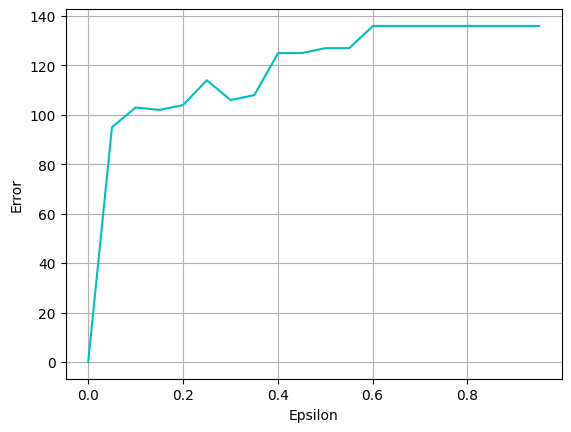

In [11]:
plt.plot(epsilons, errors, color='c')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.grid()
plt.show()